In [27]:
options(repos = c(CRAN = "https://cran.rstudio.com/"))


# Install the required packages

In [28]:
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("e1071")) install.packages("e1071")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("dplyr")) install.packages("dplyr")
if (!require("effsize")) install.packages("effsize")


In [29]:
library(e1071)
library(effsize)
library(ggplot2)
library(tidyverse)
library(dplyr)


In [30]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
library(car)

In [32]:
install.packages("cowplot")
library(cowplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Read the run table file

In [33]:
dataset <- read.csv("./run_table.csv")
print(head(dataset))


             X__run_id X__done       model method length               topic
1  run_32_repetition_9    DONE    qwen2:7b  local   1000         World War I
2 run_34_repetition_27    DONE    qwen2:7b remote    500       Elvis Presley
3 run_10_repetition_17    DONE    gemma:2b remote    500     John F. Kennedy
4 run_21_repetition_14    DONE   phi3:3.8b remote    100           Tom Brady
5  run_4_repetition_11    DONE llama3.1:8b remote    500        Adolf Hitler
6 run_41_repetition_10    DONE  mistral:7b remote   1000 William Shakespeare
  execution_time X.cpu_usage X.gpu_usage X.memory_usage
1      49.812157       3.151      95.507         73.341
2      15.413524       2.888       0.196         51.100
3       9.873243       5.033       0.448         55.267
4       9.877062      10.767       0.459         52.367
5      15.385836       4.588       0.225         53.200
6      14.300526       6.814       0.091         52.629
  codecarbon__energy_consumed energy_consumed.J.
1                0.0

# Filtering the dataset into different blocks and treatments
2 Treatments:
- Local
- Remote

3 Blocks (blocking factor: requested LLM content length):
- Short (100 words)
- Medium (500 words)
- Long (1000 words)



In [34]:
local_data_short <- dataset %>%
  filter(method == "local" & length == "100" )
local_data_medium <- dataset %>%
  filter(method == "local" & length == "500")
local_data_long <- dataset %>%
  filter(method == "local" & length == "1000")

remote_data_short <- dataset %>%
  filter(method == "remote" & length == "100" )
remote_data_medium <- dataset %>%
  filter(method == "remote" & length == "500")
remote_data_long <- dataset %>%
  filter(method == "remote" & length == "1000")


# Exploration: measures of central tendency and variability

In [35]:
analyse_descriptive_stats <- function(name, dataset) {
  summary_stats <- summary(dataset[c("energy_consumed.J.", "X.memory_usage", "execution_time", "X.cpu_usage", "X.gpu_usage")])
  print(name)
  print(summary_stats)
}
analyse_descriptive_stats("local_data_short", local_data_short)
analyse_descriptive_stats("local_data_medium", local_data_medium)
analyse_descriptive_stats("local_data_long", local_data_long)
analyse_descriptive_stats("remote_data_short",  remote_data_short)
analyse_descriptive_stats("remote_data_medium",  remote_data_medium)
analyse_descriptive_stats("remote_data_long", remote_data_long)


[1] "local_data_short"
 energy_consumed.J. X.memory_usage  execution_time    X.cpu_usage    
 Min.   :  7.56     Min.   :53.50   Min.   : 6.561   Min.   : 2.467  
 1st Qu.: 34.60     1st Qu.:64.61   1st Qu.:12.151   1st Qu.: 3.562  
 Median : 56.00     Median :71.33   Median :15.493   Median : 4.513  
 Mean   : 67.22     Mean   :70.22   Mean   :15.770   Mean   : 6.394  
 3rd Qu.: 74.70     3rd Qu.:74.22   3rd Qu.:18.762   3rd Qu.: 6.550  
 Max.   :282.00     Max.   :86.20   Max.   :27.625   Max.   :37.200  
  X.gpu_usage    
 Min.   : 52.31  
 1st Qu.: 69.26  
 Median : 77.91  
 Mean   : 77.79  
 3rd Qu.: 85.93  
 Max.   :100.00  
[1] "local_data_medium"
 energy_consumed.J. X.memory_usage  execution_time   X.cpu_usage    
 Min.   : 34.3      Min.   :53.74   Min.   :12.12   Min.   : 2.344  
 1st Qu.: 88.0      1st Qu.:64.68   1st Qu.:20.96   1st Qu.: 3.066  
 Median :402.9      Median :72.44   Median :38.76   Median : 3.450  
 Mean   :339.2      Mean   :70.76   Mean   :35.20   Mean   : 

# Standard deviation and variance

In [36]:
analyse_descriptive_stats <- function(name, dataset) {
  sd_energy <- sd(dataset$energy_consumed.J.)
  sd_mem <- sd(dataset$X.memory_usage)
  sd_cpu <- sd(dataset$X.cpu_usage)
  sd_exe <- sd(dataset$execution_time)
  sd_gpu <- sd(dataset$X.gpu_usage)
  cat(name, "\n")
  cat("Standard deviation for energy usage :", sd_energy, "\n")
  cat("Standard deviation for memory usage :", sd_mem, "\n")
  cat("Standard deviation for cpu usage :", sd_cpu, "\n")
  cat("Standard deviation for execution time :", sd_exe, "\n")
  cat("Standard deviation for gpu usage :", sd_gpu, "\n")
}
analyse_descriptive_stats("local_data_short", local_data_short)
analyse_descriptive_stats("local_data_medium", local_data_medium)
analyse_descriptive_stats("local_data_long", local_data_long)
analyse_descriptive_stats("remote_data_short",  remote_data_short)
analyse_descriptive_stats("remote_data_medium",  remote_data_medium)
analyse_descriptive_stats("remote_data_long", remote_data_long)


local_data_short 
Standard deviation for energy usage : 51.2395 
Standard deviation for memory usage : 6.937124 
Standard deviation for cpu usage : 5.341899 
Standard deviation for execution time : 4.284241 
Standard deviation for gpu usage : 11.37602 
local_data_medium 
Standard deviation for energy usage : 187.3931 
Standard deviation for memory usage : 7.416935 
Standard deviation for cpu usage : 5.03961 
Standard deviation for execution time : 12.68566 
Standard deviation for gpu usage : 4.732734 
local_data_long 
Standard deviation for energy usage : 248.3069 
Standard deviation for memory usage : 7.279532 
Standard deviation for cpu usage : 3.537414 
Standard deviation for execution time : 18.55567 
Standard deviation for gpu usage : 4.217102 
remote_data_short 
Standard deviation for energy usage : 7.170393 
Standard deviation for memory usage : 6.815823 
Standard deviation for cpu usage : 7.817814 
Standard deviation for execution time : 1.18726 
Standard deviation for gpu usag

In [37]:
analyse_descriptive_stats <- function(name, dataset) {
  var_energy <- var(dataset$energy_consumed.J.)
  var_mem <- var(dataset$X.memory_usage)
  var_cpu <- var(dataset$X.cpu_usage)
  var_exe <- var(dataset$execution_time)
  var_gpu <- var(dataset$X.gpu_usage)
  cat(name, "\n")
  cat("Variance for energy usage :", var_energy, "\n")
  cat("Variance for memory usage :", var_mem, "\n")
  cat("Variance for cpu usage :", var_cpu, "\n")
  cat("Variance for execution time :", var_exe, "\n")
  cat("Variance for gpu usage :", var_gpu, "\n")
}
analyse_descriptive_stats("local_data_short", local_data_short)
analyse_descriptive_stats("local_data_medium", local_data_medium)
analyse_descriptive_stats("local_data_long", local_data_long)
analyse_descriptive_stats("remote_data_short",  remote_data_short)
analyse_descriptive_stats("remote_data_medium",  remote_data_medium)
analyse_descriptive_stats("remote_data_long", remote_data_long)


local_data_short 
Variance for energy usage : 2625.486 
Variance for memory usage : 48.12369 
Variance for cpu usage : 28.53589 
Variance for execution time : 18.35472 
Variance for gpu usage : 129.4139 
local_data_medium 
Variance for energy usage : 35116.18 
Variance for memory usage : 55.01093 
Variance for cpu usage : 25.39767 
Variance for execution time : 160.926 
Variance for gpu usage : 22.39877 
local_data_long 
Variance for energy usage : 61656.31 
Variance for memory usage : 52.99159 
Variance for cpu usage : 12.5133 
Variance for execution time : 344.3129 
Variance for gpu usage : 17.78395 
remote_data_short 
Variance for energy usage : 51.41454 
Variance for memory usage : 46.45545 
Variance for cpu usage : 61.11821 
Variance for execution time : 1.409586 
Variance for gpu usage : 0.215813 
remote_data_medium 
Variance for energy usage : 773.3939 
Variance for memory usage : 41.07948 
Variance for cpu usage : 57.85332 
Variance for execution time : 21.40471 
Variance for g

#Normality Testing - Visualize data for normality checking

Histograms and Density plot functions

In [38]:
# Data Distribution
# Create a density plot for energy_usage for length = 100
density_plot <- function(dataset, title, x, y){
ggplot(dataset, aes(x = Values, fill = Distribution)) +
geom_density(alpha = 0.5) +
scale_fill_manual(values = c("local" = "pink", "remote" = "lightblue")) +
labs(
title = title,
x = x,
y = y
) +
theme_minimal()
}

violin_boxplot <- function(dataset, title, x, y) {
ggplot(dataset, aes(x = Distribution, y = Values, fill = Distribution)) +
geom_violin(alpha = 0.5) +
geom_boxplot(width = 0.03, outlier.shape = NA) +
scale_fill_manual(values = c("local" = "pink", "remote" = "lightblue")) +
labs(
title = title,
x = x,
y = y
) +
theme_minimal()
}


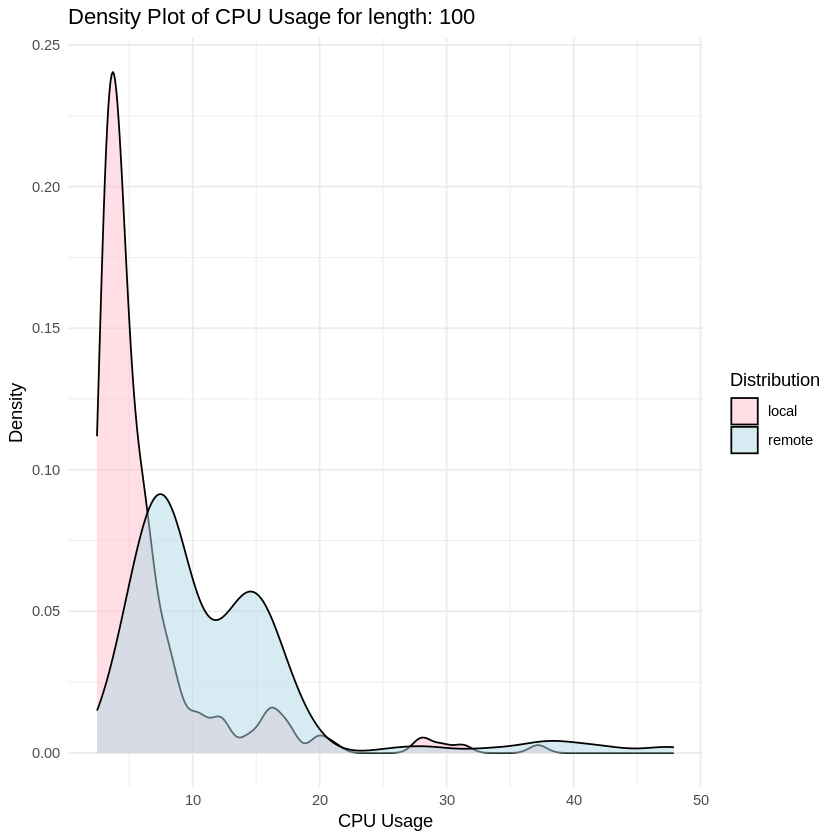

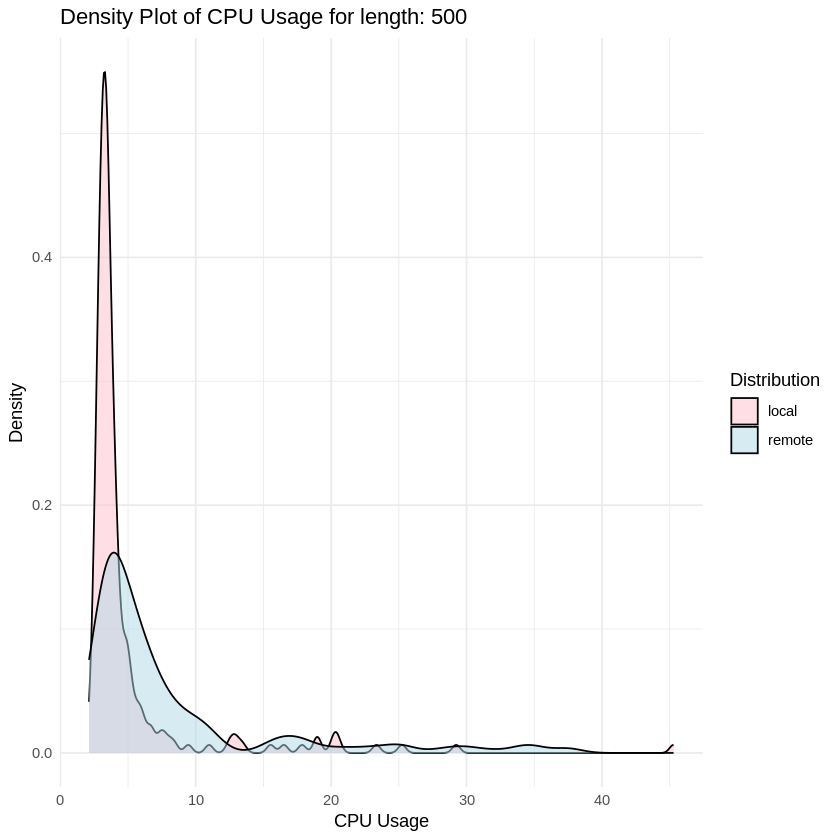

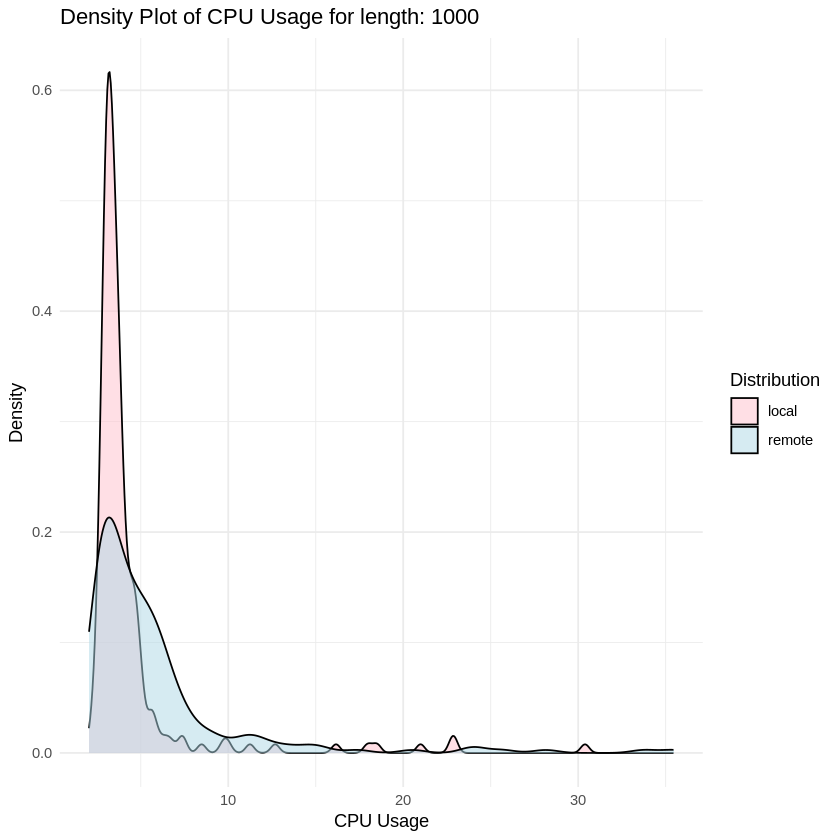

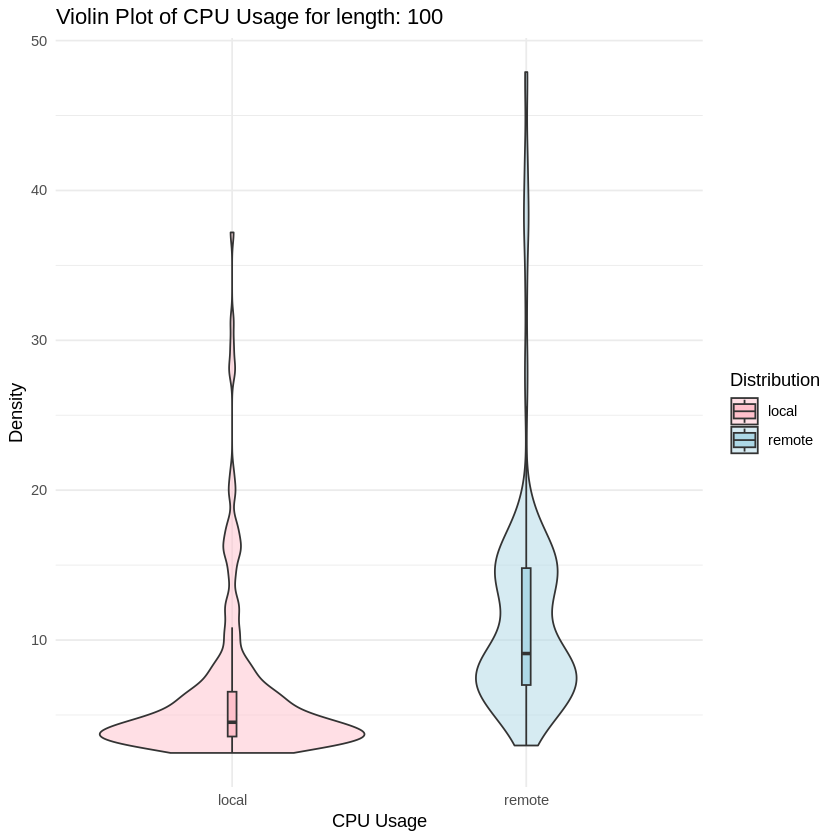

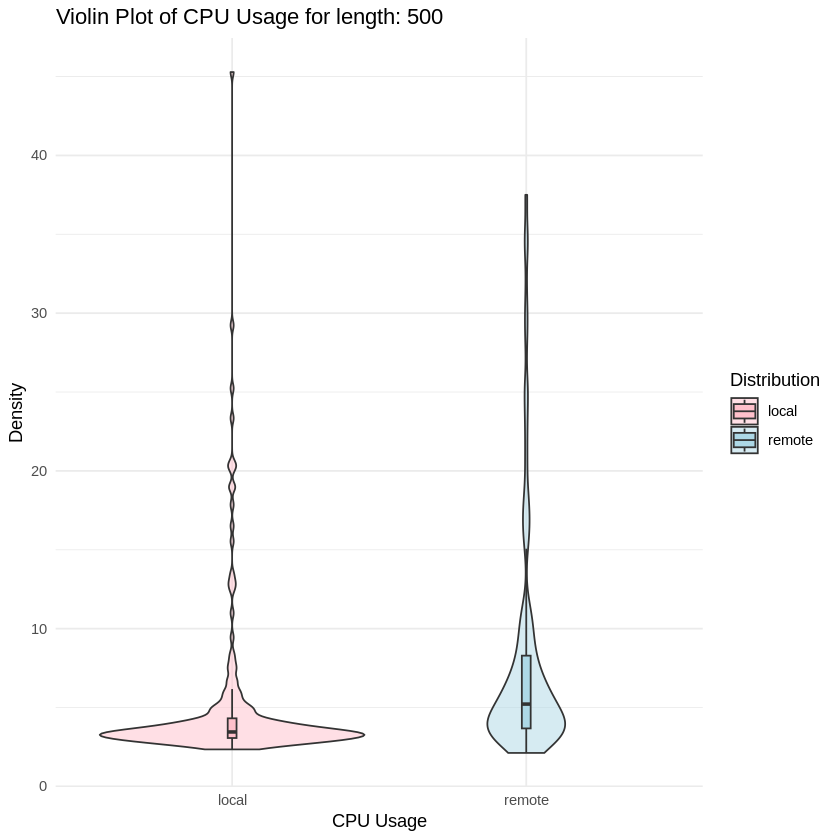

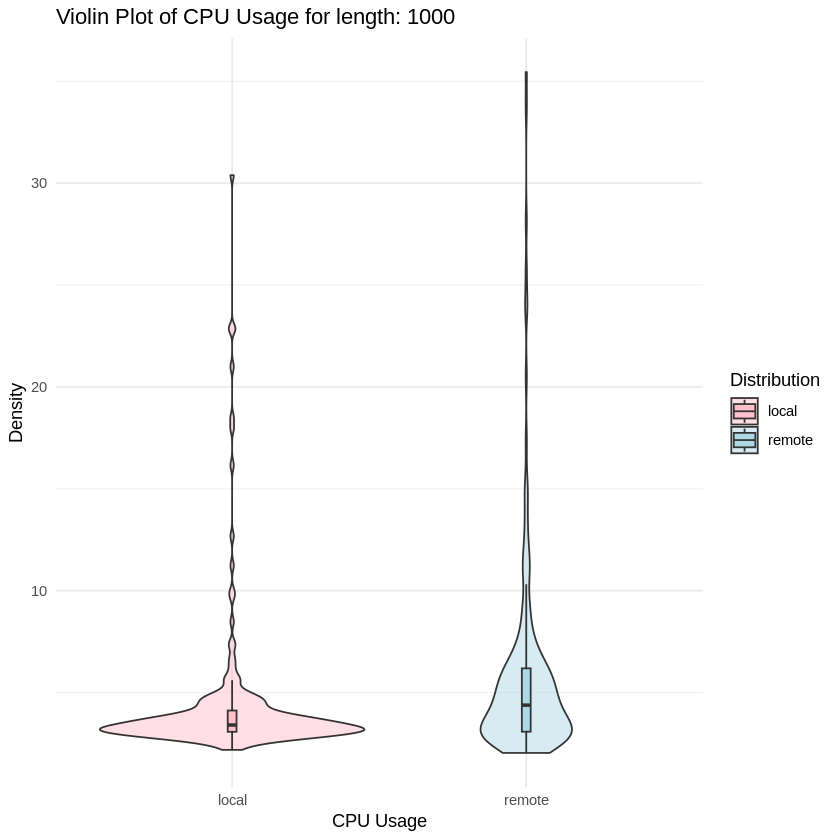

In [39]:
#Density and violin plot for CPU usage
Short_Block <- data.frame(
Distribution = c(rep("local", length(local_data_short$X.cpu_usage)), rep("remote", length(remote_data_short$X.cpu_usage))),
Values = c(local_data_short$X.cpu_usage, remote_data_short$X.cpu_usage)
)
Medium_Block <- data.frame(
Distribution = c(rep("local", length(local_data_medium$X.cpu_usage)), rep("remote", length(remote_data_medium$X.cpu_usage))),
Values = c(local_data_medium$X.cpu_usage, remote_data_medium$X.cpu_usage)
)
Long_Block <- data.frame(
Distribution = c(rep("local", length(local_data_long$X.cpu_usage)), rep("remote", length(remote_data_long$X.cpu_usage))),
Values = c(local_data_long$X.cpu_usage, remote_data_long$X.cpu_usage)
)
density_plot_Short_cpu <- density_plot(dataset=Short_Block, title="Density Plot of CPU Usage for length: 100", x="CPU Usage", y="Density")
density_plot_medium_cpu <- density_plot(dataset=Medium_Block, title="Density Plot of CPU Usage for length: 500", x="CPU Usage", y="Density")
density_plot_Long_cpu <- density_plot(dataset=Long_Block, title="Density Plot of CPU Usage for length: 1000", x="CPU Usage", y="Density")
violin_plot_Short_cpu <- violin_boxplot(dataset=Short_Block, "Violin Plot of CPU Usage for length: 100", x="CPU Usage", y="Density")
violin_plot_medium_cpu <- violin_boxplot(dataset=Medium_Block, "Violin Plot of CPU Usage for length: 500", x="CPU Usage", y="Density")
violin_plot_Long_cpu <- violin_boxplot(dataset=Long_Block, "Violin Plot of CPU Usage for length: 1000", x="CPU Usage", y="Density")

# Arrange the plots in a 4x4 grid
grid <- plot_grid(density_plot_Short_cpu, density_plot_medium_cpu, density_plot_Long_cpu, violin_plot_Short_cpu, violin_plot_medium_cpu, violin_plot_Long_cpu, nrow = 3, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./grid_of_normality_H2_cpu.png", plot = grid, width = 10, height = 8, units = "in")

density_plot_Short_cpu
density_plot_medium_cpu
density_plot_Long_cpu
violin_plot_Short_cpu
violin_plot_medium_cpu
violin_plot_Long_cpu


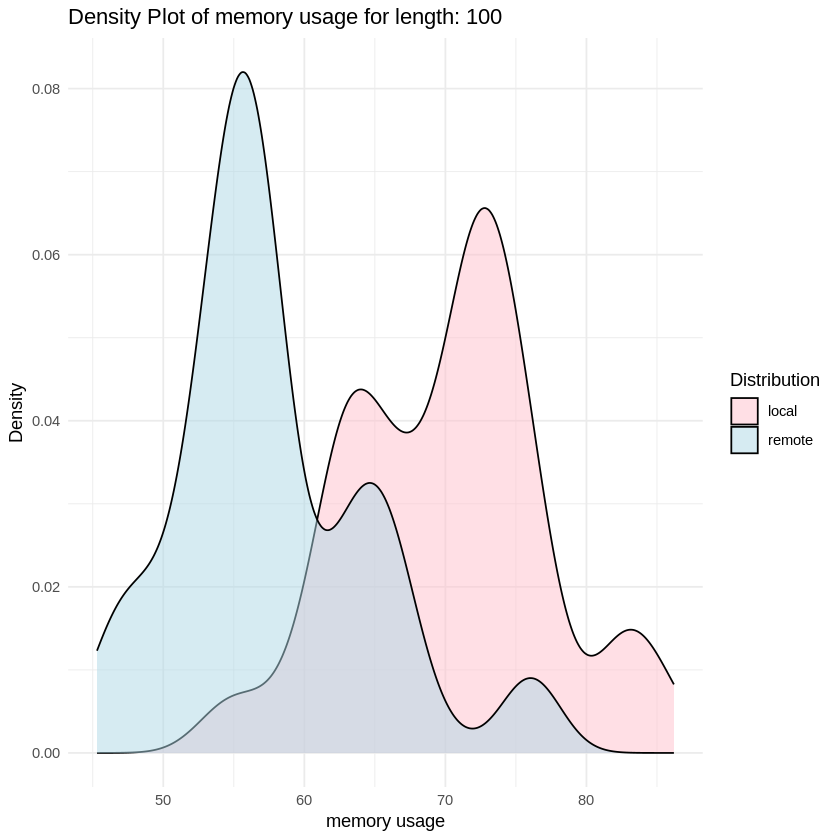

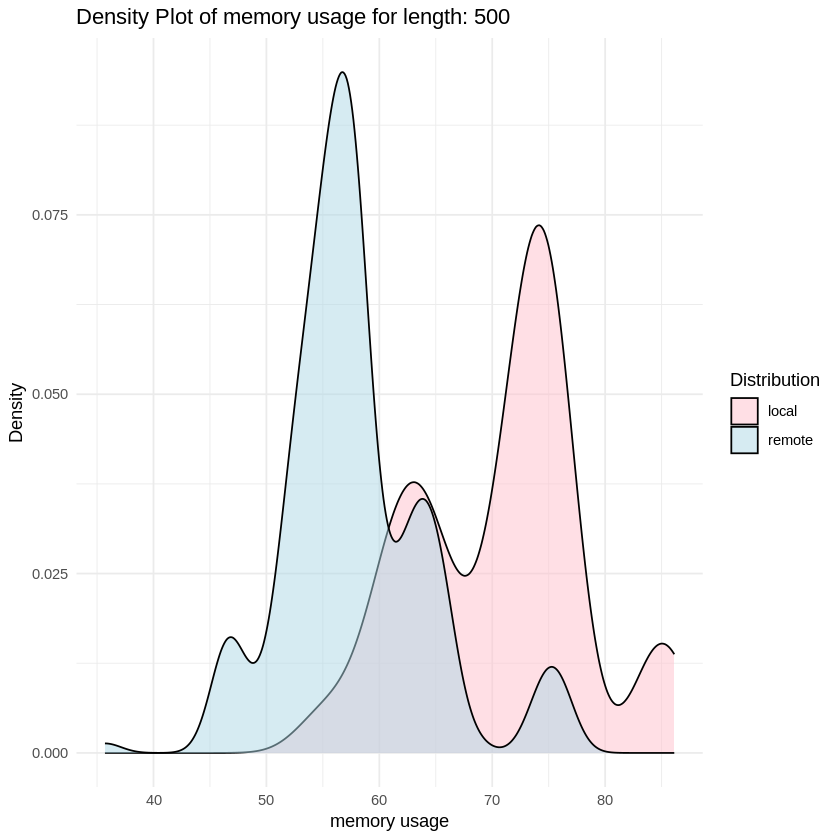

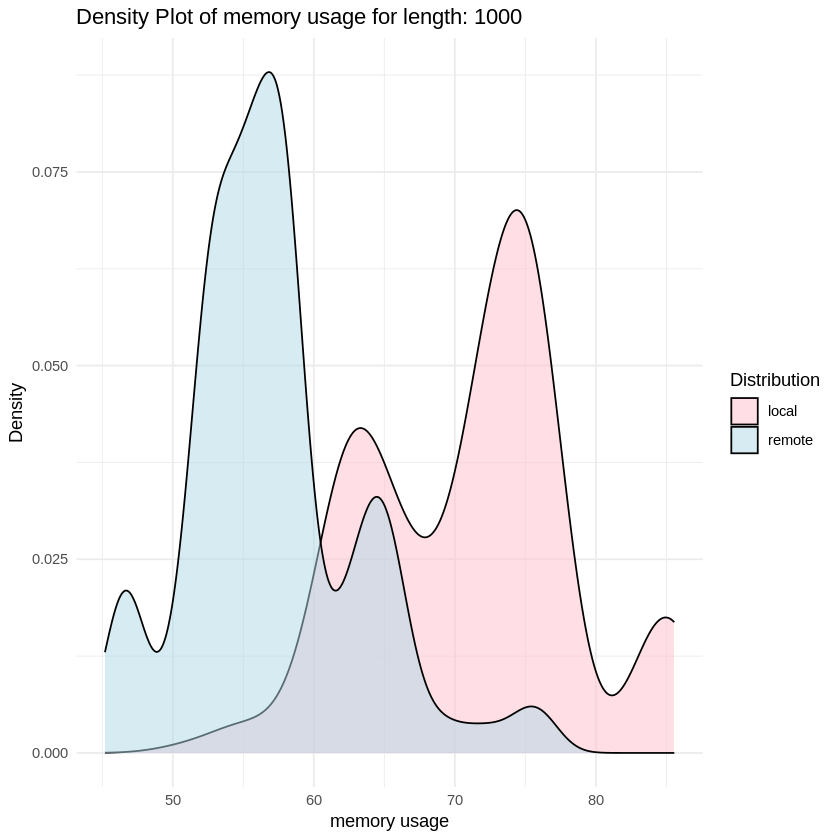

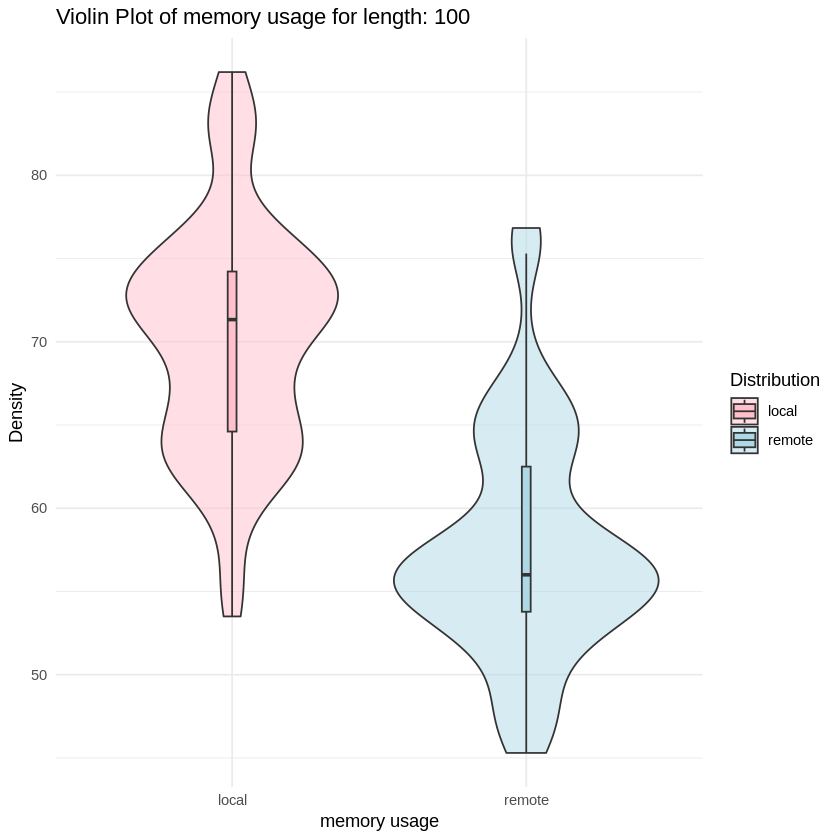

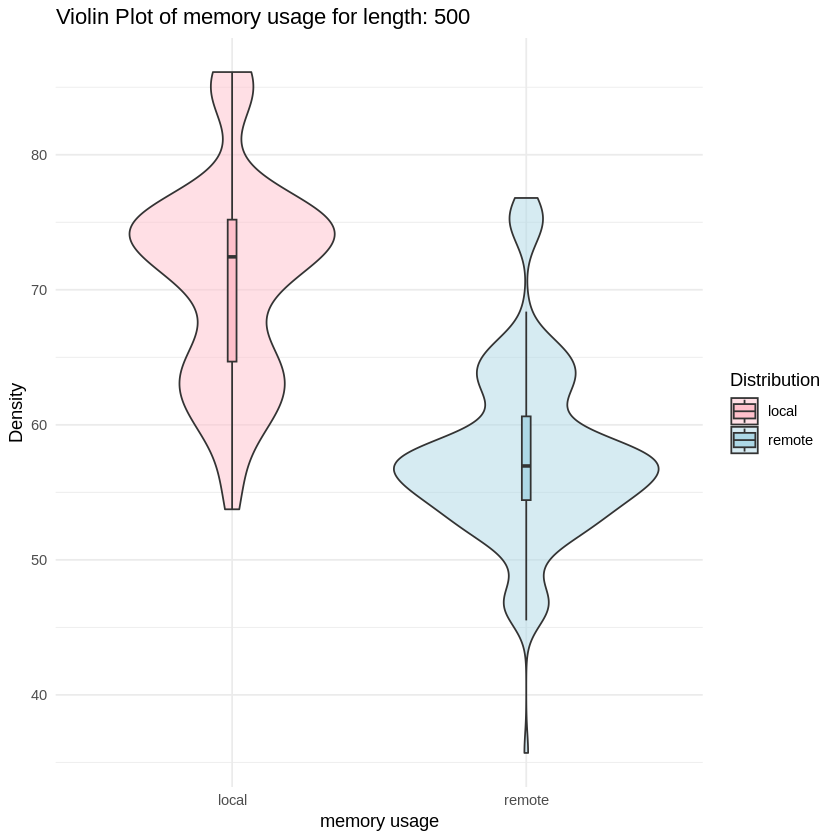

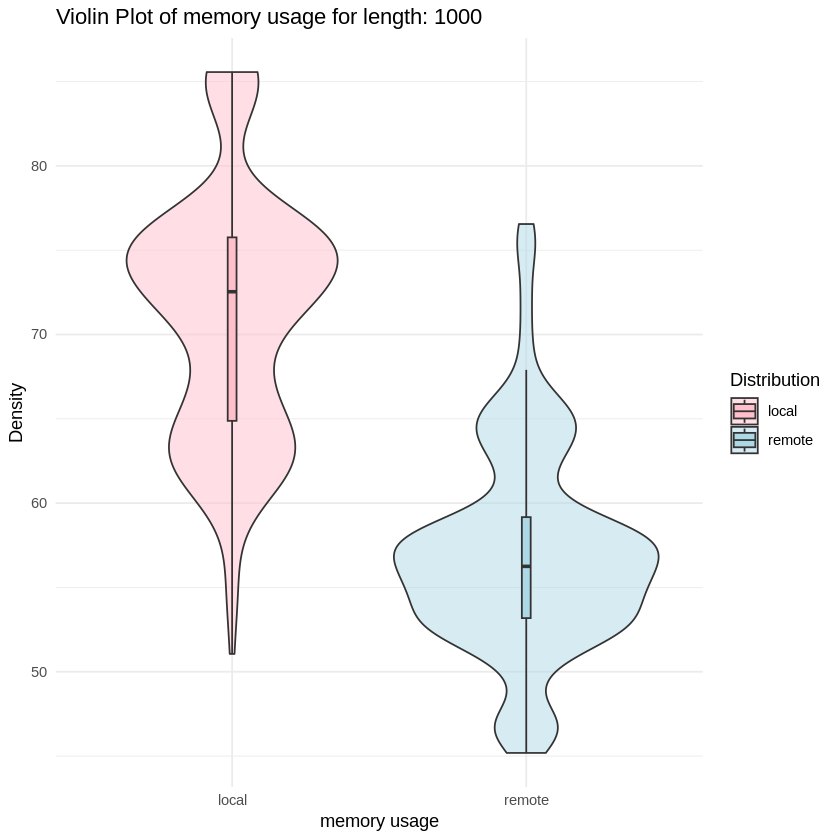

In [40]:
Short_Block <- data.frame(
Distribution = c(rep("local", length(local_data_short$X.memory_usage)), rep("remote", length(remote_data_short$X.memory_usage))),
Values = c(local_data_short$X.memory_usage, remote_data_short$X.memory_usage)
)
Medium_Block <- data.frame(
Distribution = c(rep("local", length(local_data_medium$X.memory_usage)), rep("remote", length(remote_data_medium$X.memory_usage))),
Values = c(local_data_medium$X.memory_usage, remote_data_medium$X.memory_usage)
)
Long_Block <- data.frame(
Distribution = c(rep("local", length(local_data_long$X.memory_usage)), rep("remote", length(remote_data_long$X.memory_usage))),
Values = c(local_data_long$X.memory_usage, remote_data_long$X.memory_usage)
)
density_plot_Short_memory <- density_plot(dataset=Short_Block, title="Density Plot of memory usage for length: 100", x="memory usage", y="Density")
density_plot_medium_memory <- density_plot(dataset=Medium_Block, title="Density Plot of memory usage for length: 500", x="memory usage", y="Density")
density_plot_Long_memory <- density_plot(dataset=Long_Block, title="Density Plot of memory usage for length: 1000", x="memory usage", y="Density")
violin_plot_Short_memory <- violin_boxplot(dataset=Short_Block, "Violin Plot of memory usage for length: 100", x="memory usage", y="Density")
violin_plot_medium_memory <- violin_boxplot(dataset=Medium_Block, "Violin Plot of memory usage for length: 500", x="memory usage", y="Density")
violin_plot_Long_memory <- violin_boxplot(dataset=Long_Block, "Violin Plot of memory usage for length: 1000", x="memory usage", y="Density")

# Arrange the plots in a 4x4 grid
grid <- plot_grid(density_plot_Short_memory, density_plot_medium_memory, density_plot_Long_memory, violin_plot_Short_memory, violin_plot_medium_memory, violin_plot_Long_memory, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./grid_of_normality_H2_memory.png", plot = grid, width = 10, height = 8, units = "in")

density_plot_Short_memory
density_plot_medium_memory
density_plot_Long_memory
violin_plot_Short_memory
violin_plot_medium_memory
violin_plot_Long_memory


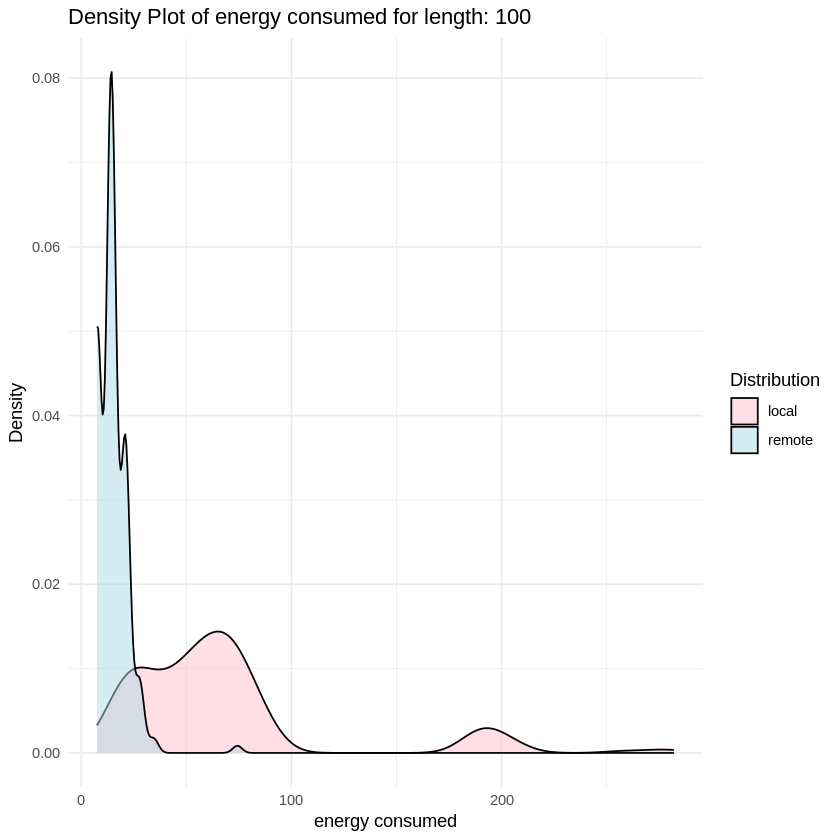

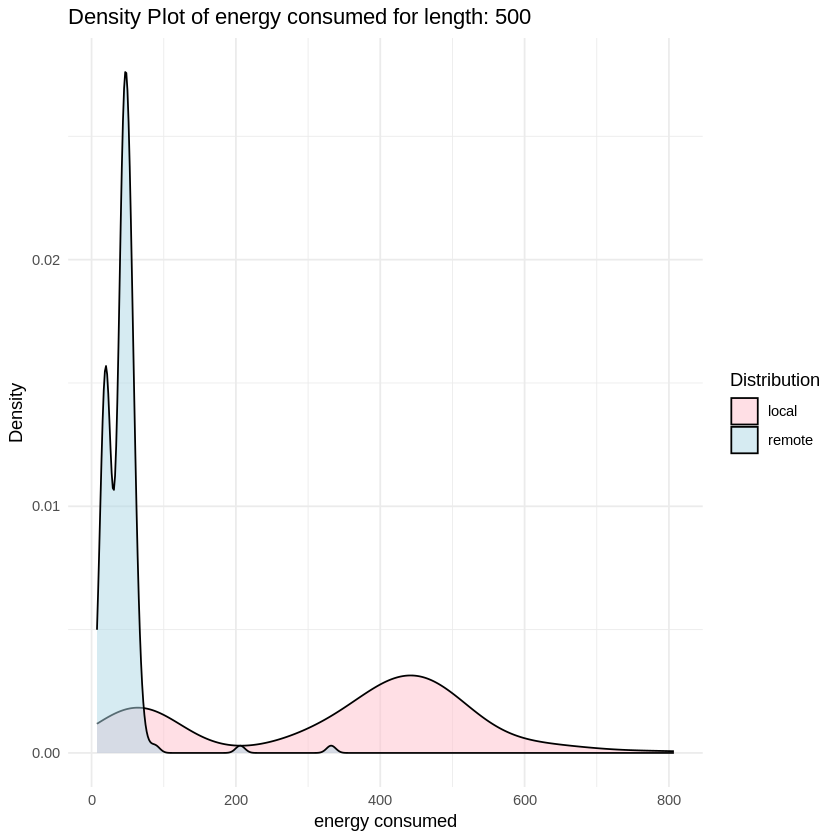

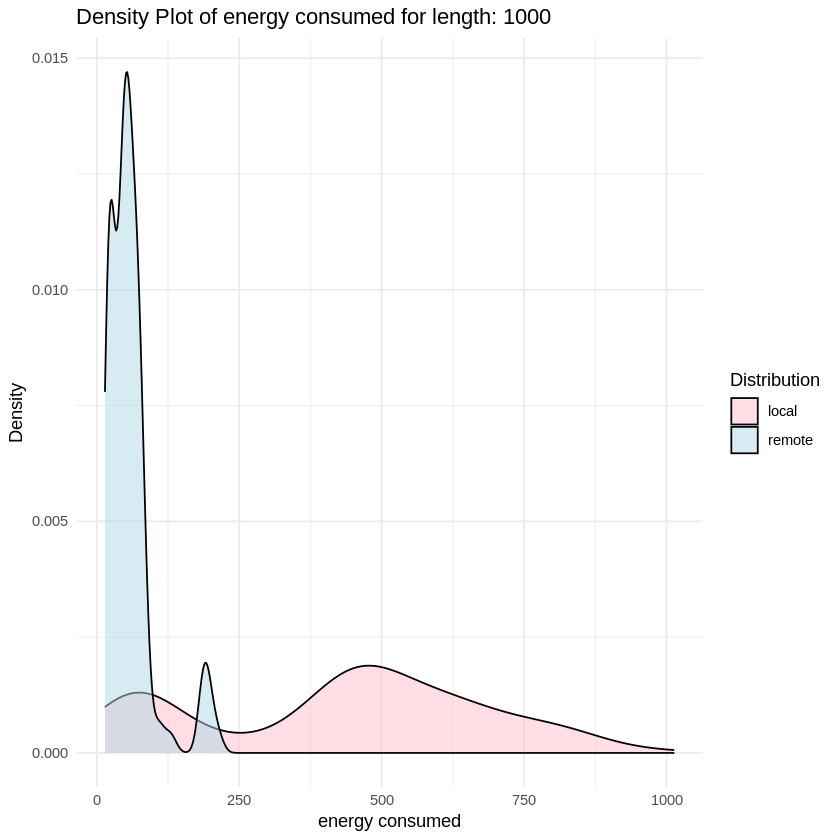

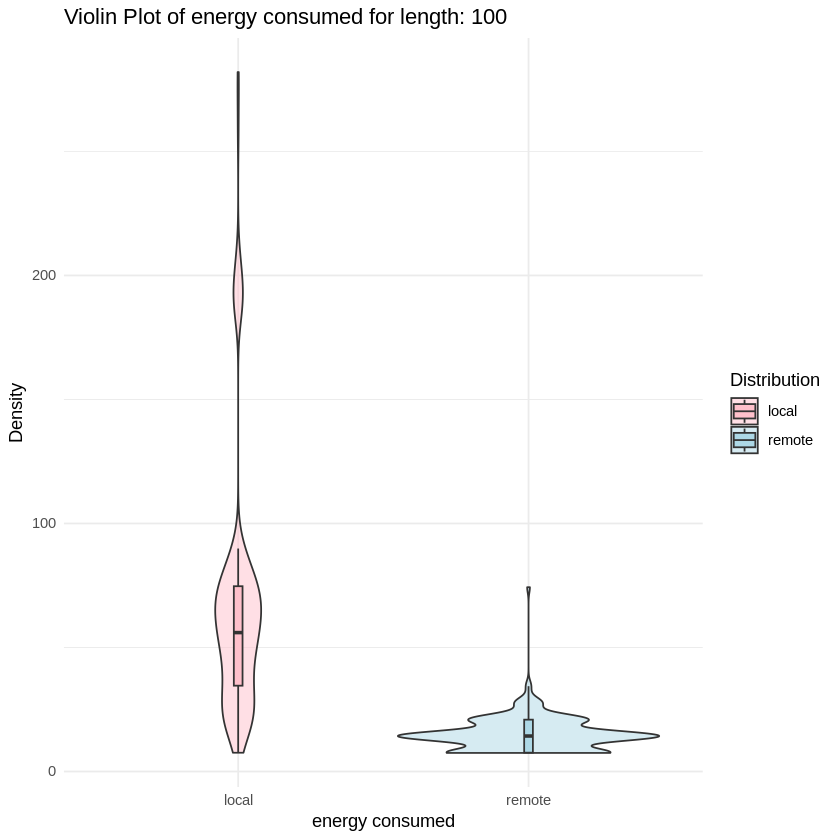

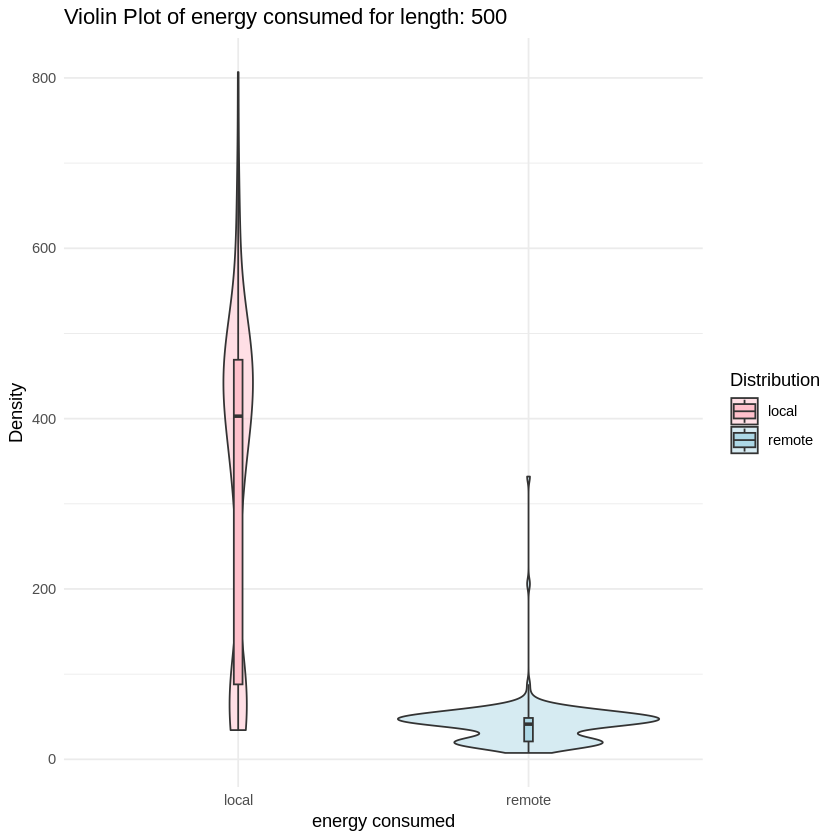

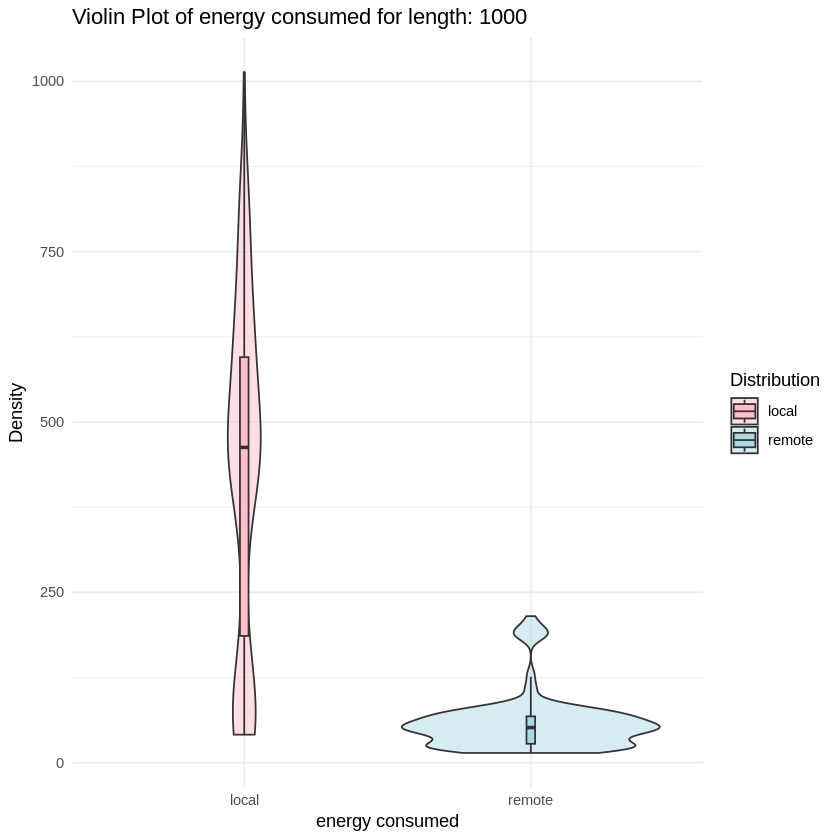

In [41]:
#Density and violin plot for energy usage
Short_Block <- data.frame(
Distribution = c(rep("local", length(local_data_short$energy_consumed.J.)), rep("remote", length(remote_data_short$energy_consumed.J.))),
Values = c(local_data_short$energy_consumed.J., remote_data_short$energy_consumed.J.)
)
Medium_Block <- data.frame(
Distribution = c(rep("local", length(local_data_medium$energy_consumed.J.)), rep("remote", length(remote_data_medium$energy_consumed.J.))),
Values = c(local_data_medium$energy_consumed.J., remote_data_medium$energy_consumed.J.)
)
Long_Block <- data.frame(
Distribution = c(rep("local", length(local_data_long$energy_consumed.J.)), rep("remote", length(remote_data_long$energy_consumed.J.))),
Values = c(local_data_long$energy_consumed.J., remote_data_long$energy_consumed.J.)
)
density_plot_Short_energy <- density_plot(dataset=Short_Block, title="Density Plot of energy consumed for length: 100", x="energy consumed", y="Density")
density_plot_medium_energy <- density_plot(dataset=Medium_Block, title="Density Plot of energy consumed for length: 500", x="energy consumed", y="Density")
density_plot_Long_energy <- density_plot(dataset=Long_Block, title="Density Plot of energy consumed for length: 1000", x="energy consumed", y="Density")
violin_plot_Short_energy <- violin_boxplot(dataset=Short_Block, "Violin Plot of energy consumed for length: 100", x="energy consumed", y="Density")
violin_plot_medium_energy <- violin_boxplot(dataset=Medium_Block, "Violin Plot of energy consumed for length: 500", x="energy consumed", y="Density")
violin_plot_Long_energy <- violin_boxplot(dataset=Long_Block, "Violin Plot of energy consumed for length: 1000", x="energy consumed", y="Density")

# Arrange the plots in a 4x4 grid
grid <- plot_grid(density_plot_Short_energy, density_plot_medium_energy, density_plot_Long_energy, violin_plot_Short_energy, violin_plot_medium_energy, violin_plot_Long_energy, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./grid_of_normality_H2_energy.png", plot = grid, width = 10, height = 8, units = "in")

density_plot_Short_energy
density_plot_medium_energy
density_plot_Long_energy
violin_plot_Short_energy
violin_plot_medium_energy
violin_plot_Long_energy

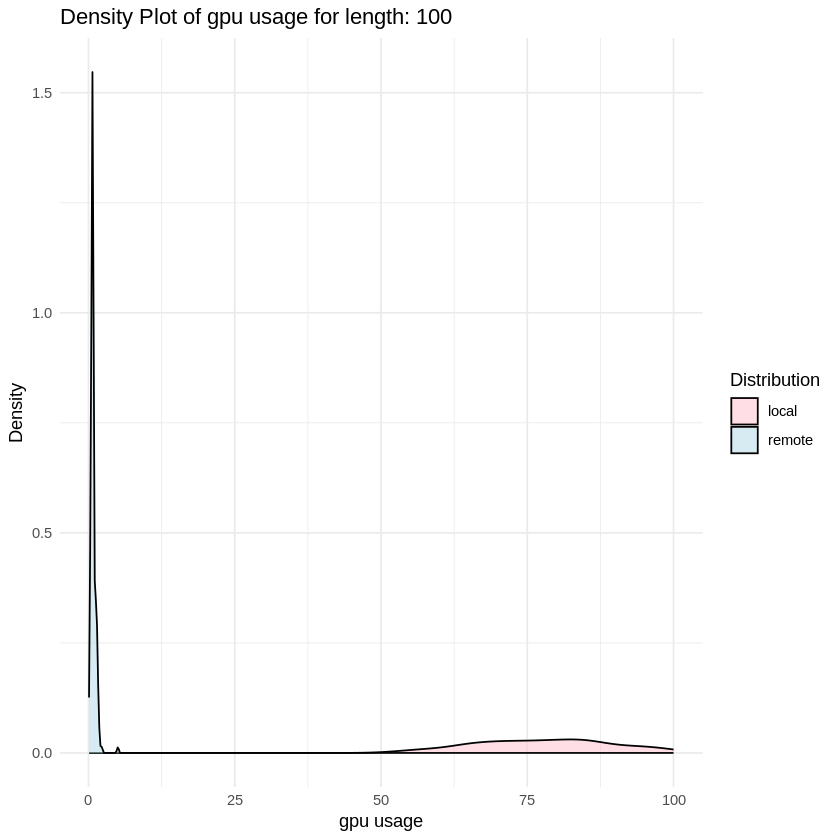

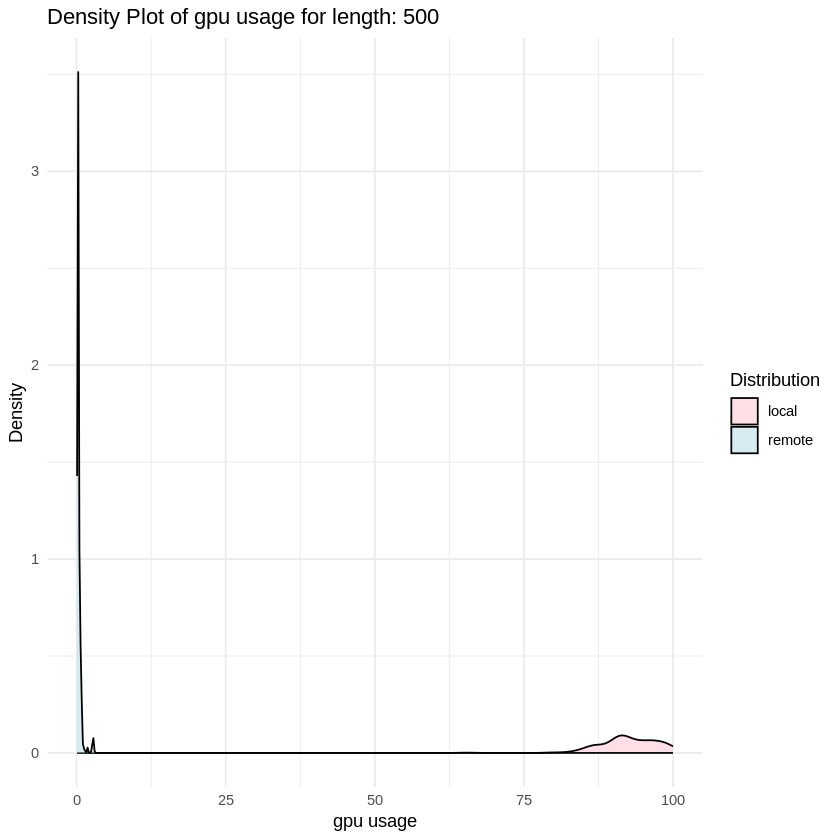

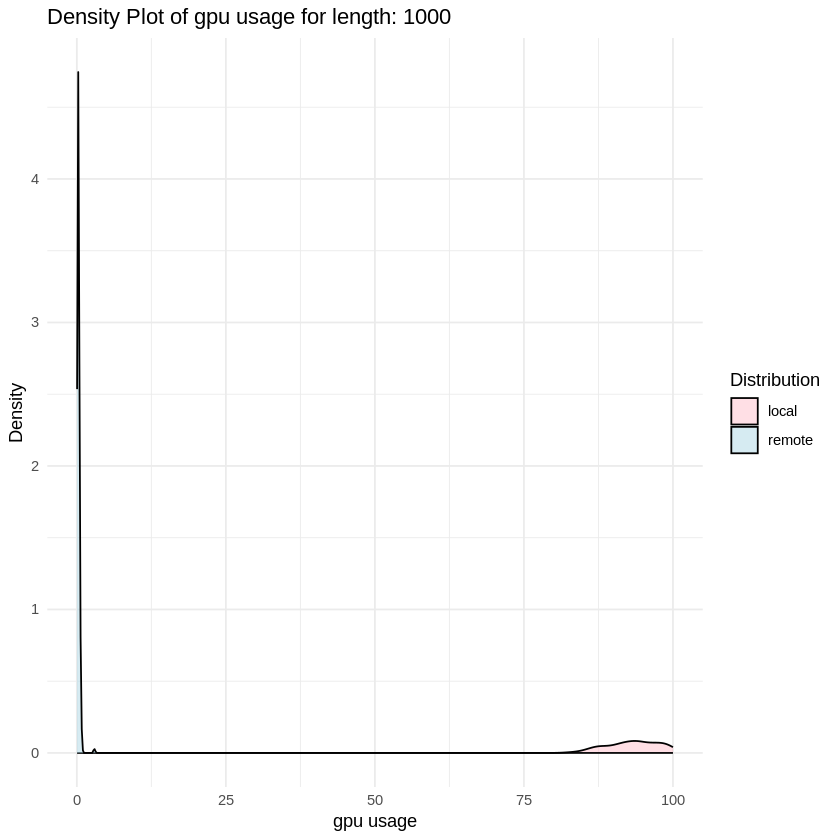

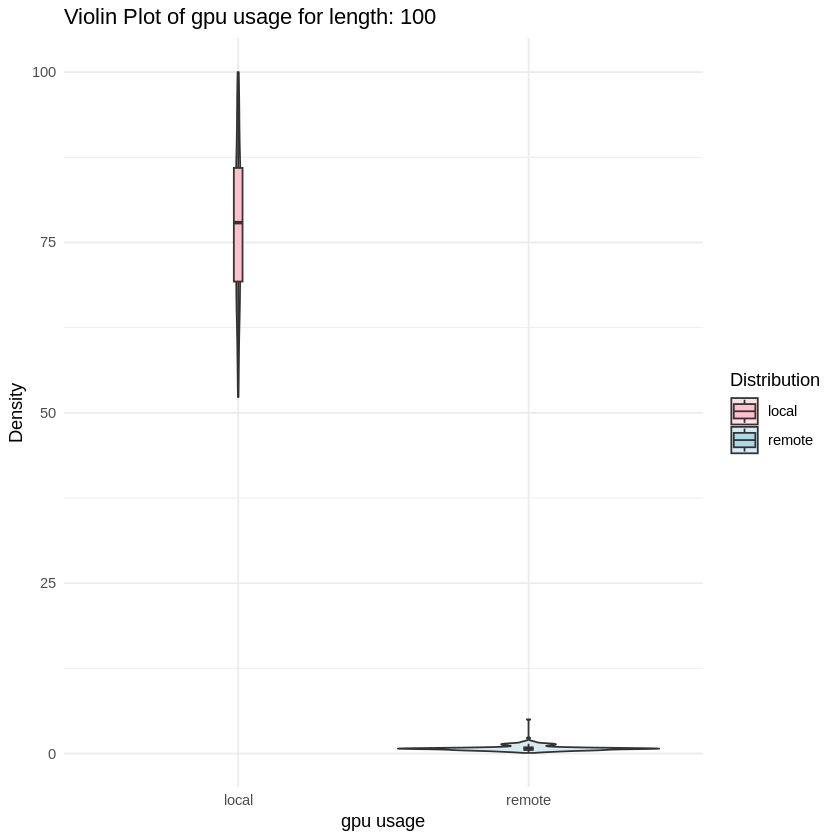

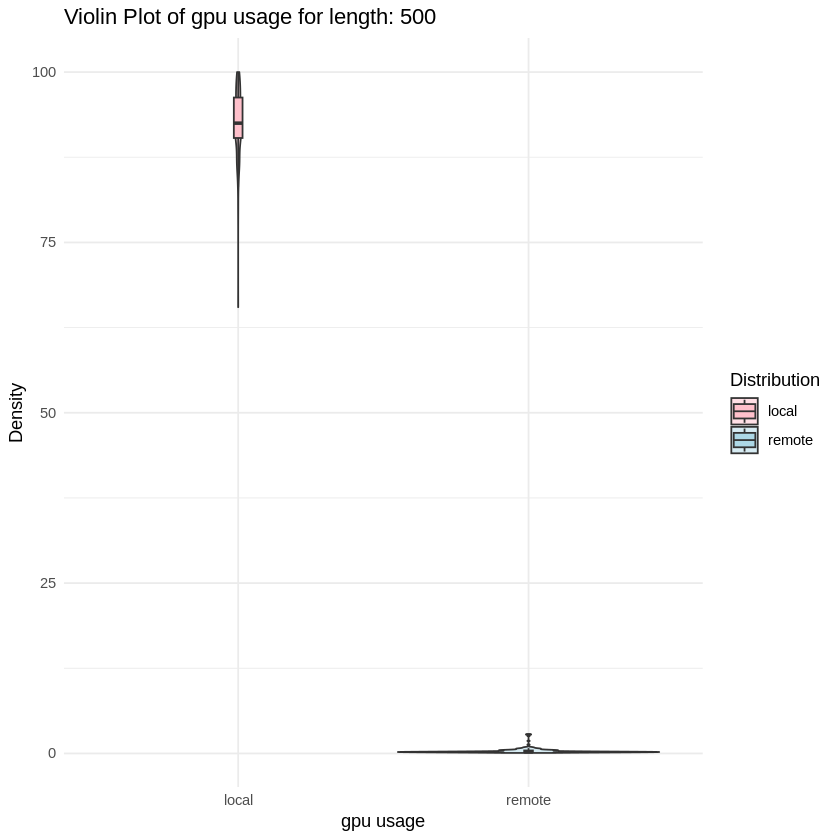

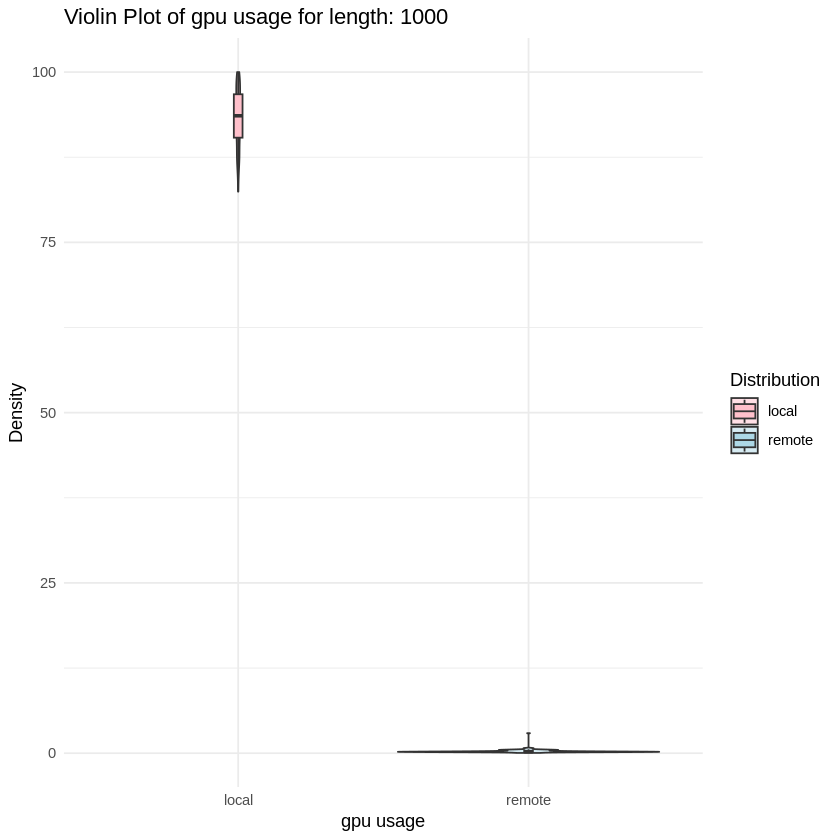

In [42]:
#Density and violin plot for GPU usage
Short_Block <- data.frame(
Distribution = c(rep("local", length(local_data_short$X.gpu_usage)), rep("remote", length(remote_data_short$X.gpu_usage))),
Values = c(local_data_short$X.gpu_usage, remote_data_short$X.gpu_usage)
)
Medium_Block <- data.frame(
Distribution = c(rep("local", length(local_data_medium$X.gpu_usage)), rep("remote", length(remote_data_medium$X.gpu_usage))),
Values = c(local_data_medium$X.gpu_usage, remote_data_medium$X.gpu_usage)
)
Long_Block <- data.frame(
Distribution = c(rep("local", length(local_data_long$X.gpu_usage)), rep("remote", length(remote_data_long$X.gpu_usage))),
Values = c(local_data_long$X.gpu_usage, remote_data_long$X.gpu_usage)
)
density_plot_Short_gpu <- density_plot(dataset=Short_Block, title="Density Plot of gpu usage for length: 100", x="gpu usage", y="Density")
density_plot_medium_gpu <- density_plot(dataset=Medium_Block, title="Density Plot of gpu usage for length: 500", x="gpu usage", y="Density")
density_plot_Long_gpu <- density_plot(dataset=Long_Block, title="Density Plot of gpu usage for length: 1000", x="gpu usage", y="Density")
violin_plot_Short_gpu <- violin_boxplot(dataset=Short_Block, "Violin Plot of gpu usage for length: 100", x="gpu usage", y="Density")
violin_plot_medium_gpu <- violin_boxplot(dataset=Medium_Block, "Violin Plot of gpu usage for length: 500", x="gpu usage", y="Density")
violin_plot_Long_gpu <- violin_boxplot(dataset=Long_Block, "Violin Plot of gpu usage for length: 1000", x="gpu usage", y="Density")

# Arrange the plots in a 4x4 grid
grid <- plot_grid(density_plot_Short_gpu, density_plot_medium_gpu, density_plot_Long_gpu, violin_plot_Short_gpu, violin_plot_medium_gpu, violin_plot_Long_gpu, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./grid_of_normality_H2_gpu.png", plot = grid, width = 10, height = 8, units = "in")

density_plot_Short_gpu
density_plot_medium_gpu
density_plot_Long_gpu
violin_plot_Short_gpu
violin_plot_medium_gpu
violin_plot_Long_gpu

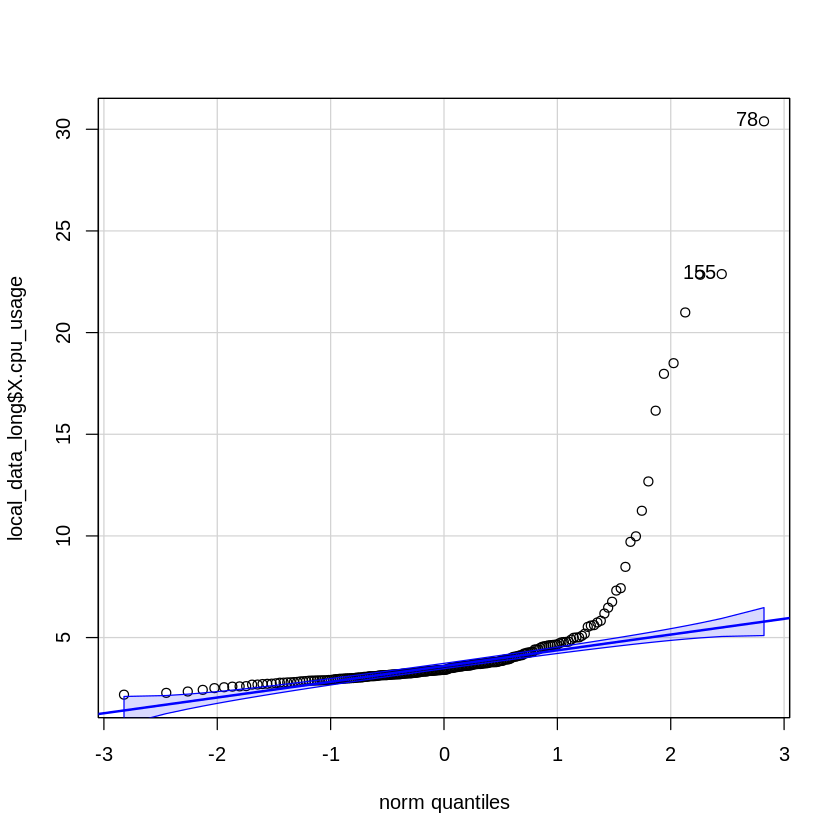

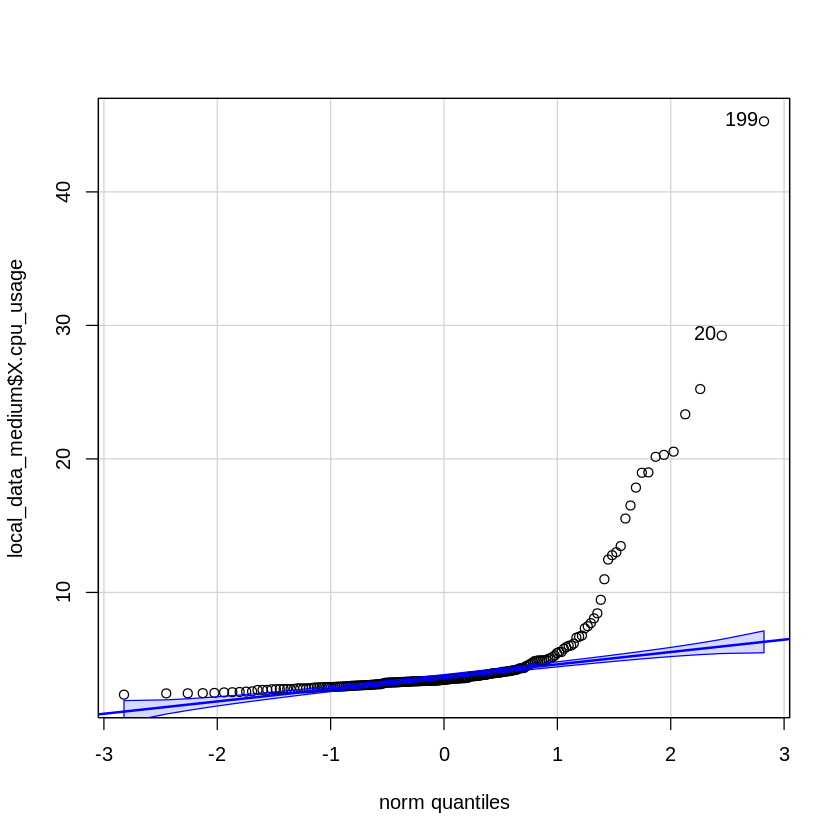

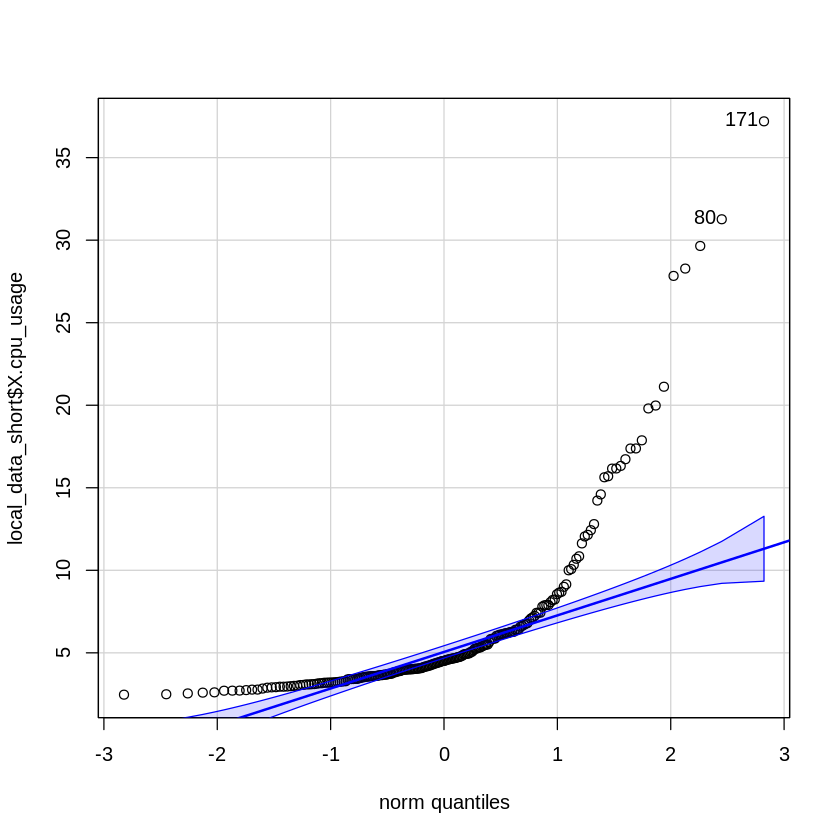

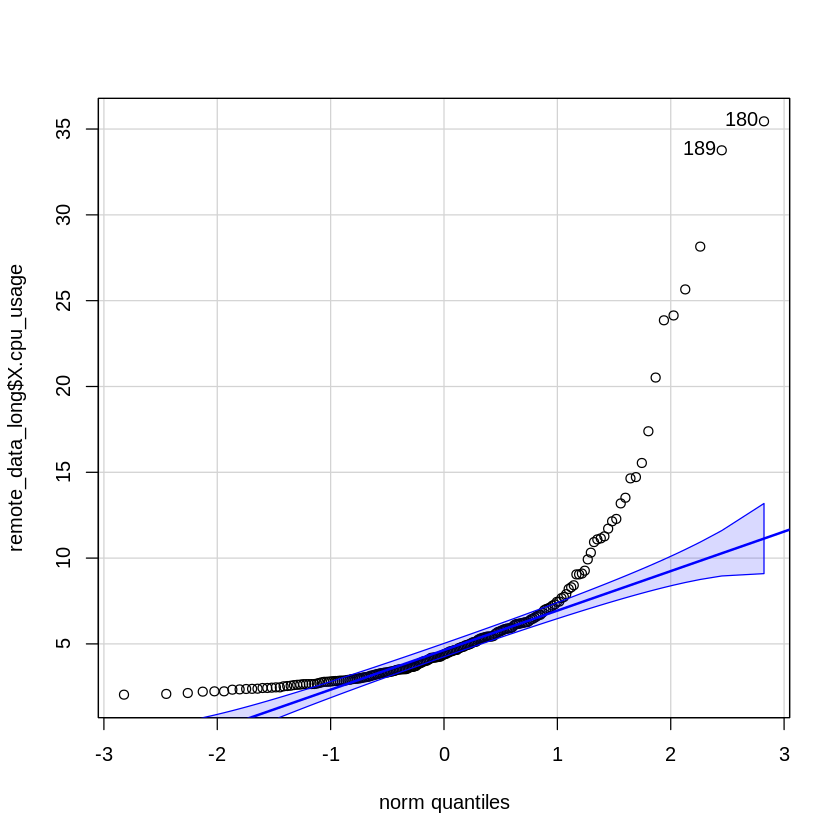

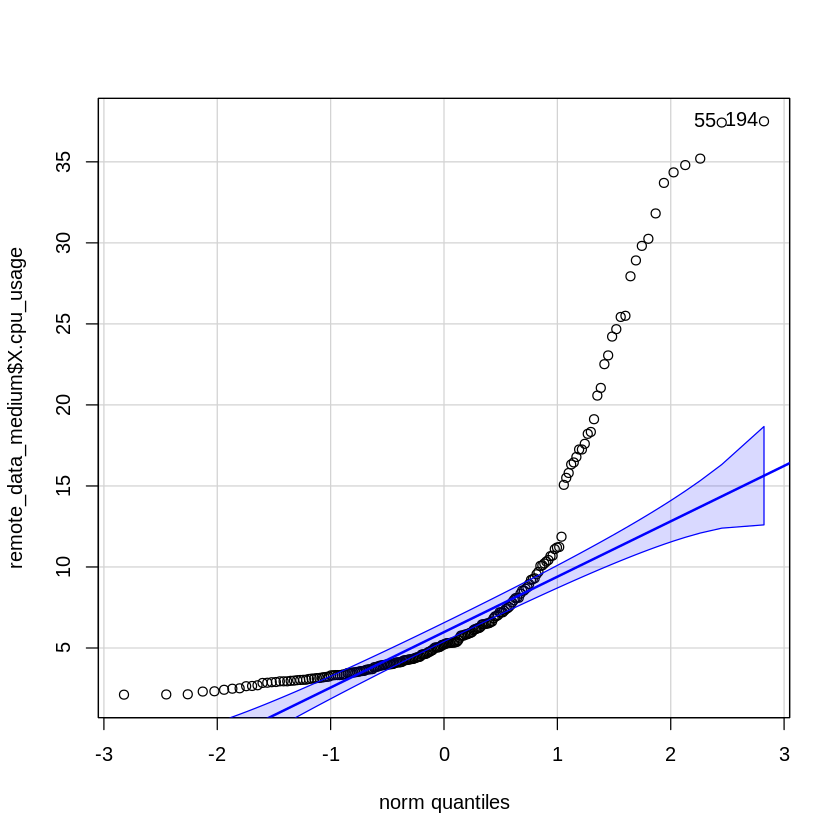

Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”


[1]  78 155

[1] 199  20

[1] 171  80

[1] 180 189

[1] 194  55

[1]  14 123

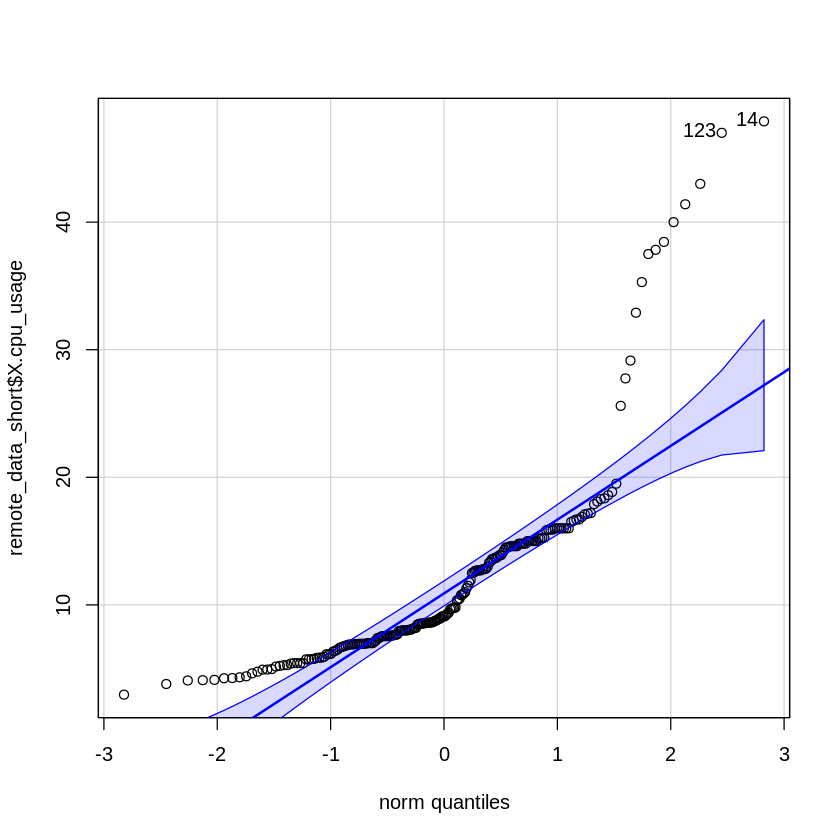

In [43]:
#QQ Plots for CPU
#make this example reproducible
set.seed(11)


qqcpu_Local_Long <- qqPlot(local_data_long$X.cpu_usage)
qqcpu_Local_Medium <- qqPlot(local_data_medium$X.cpu_usage)
qqcpu_Local_Short <- qqPlot(local_data_short$X.cpu_usage)
qqcpu_Remote_Long <- qqPlot(remote_data_long$X.cpu_usage)
qqcpu_Remote_Medium <- qqPlot(remote_data_medium$X.cpu_usage)
qqcpu_Remote_Short <- qqPlot(remote_data_short$X.cpu_usage)

# Arrange the plots in a 4x4 grid
grid <- plot_grid(qqcpu_Local_Long, qqcpu_Local_Medium, qqcpu_Local_Short, qqcpu_Remote_Long, qqcpu_Remote_Medium, qqcpu_Remote_Short, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./q-q_plot_cpu_H2.png", plot = grid, width = 10, height = 8, units = "in")

qqcpu_Local_Long
qqcpu_Local_Medium
qqcpu_Local_Short
qqcpu_Remote_Long
qqcpu_Remote_Medium
qqcpu_Remote_Short


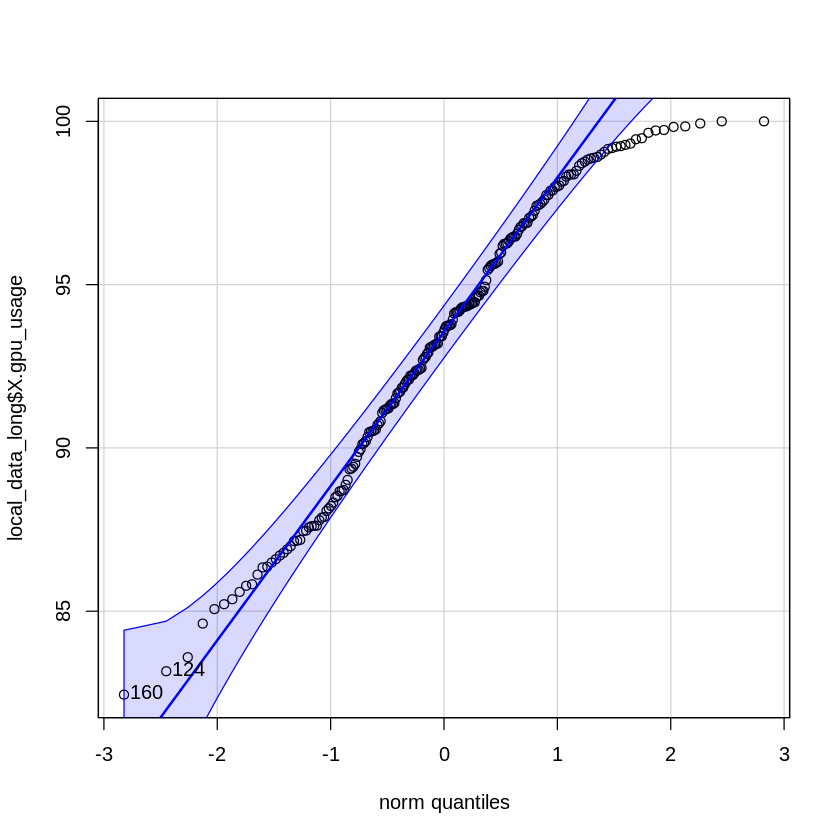

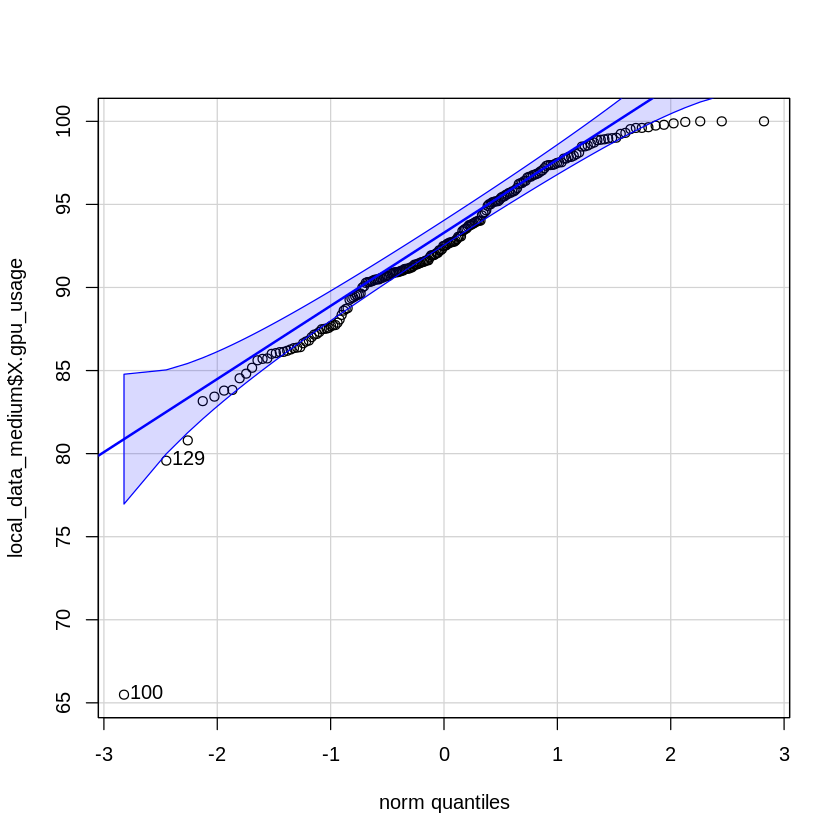

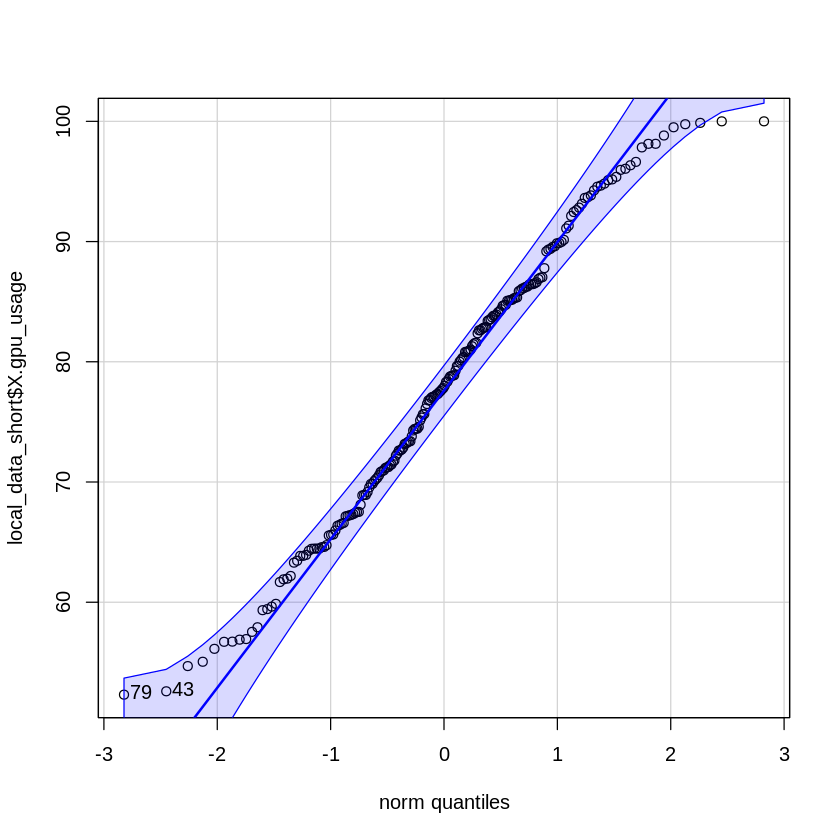

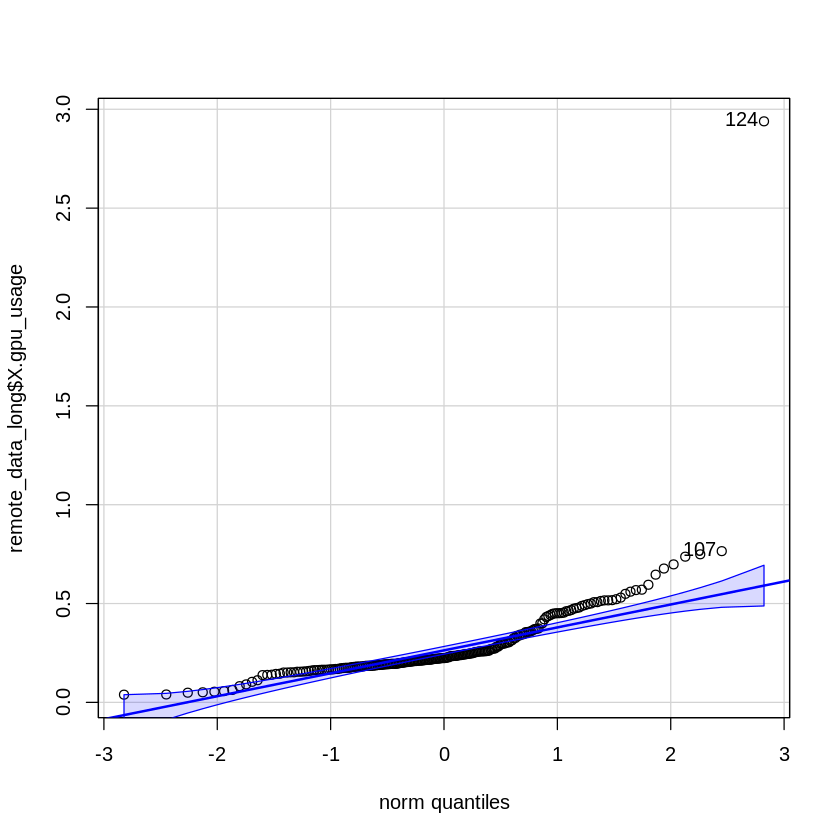

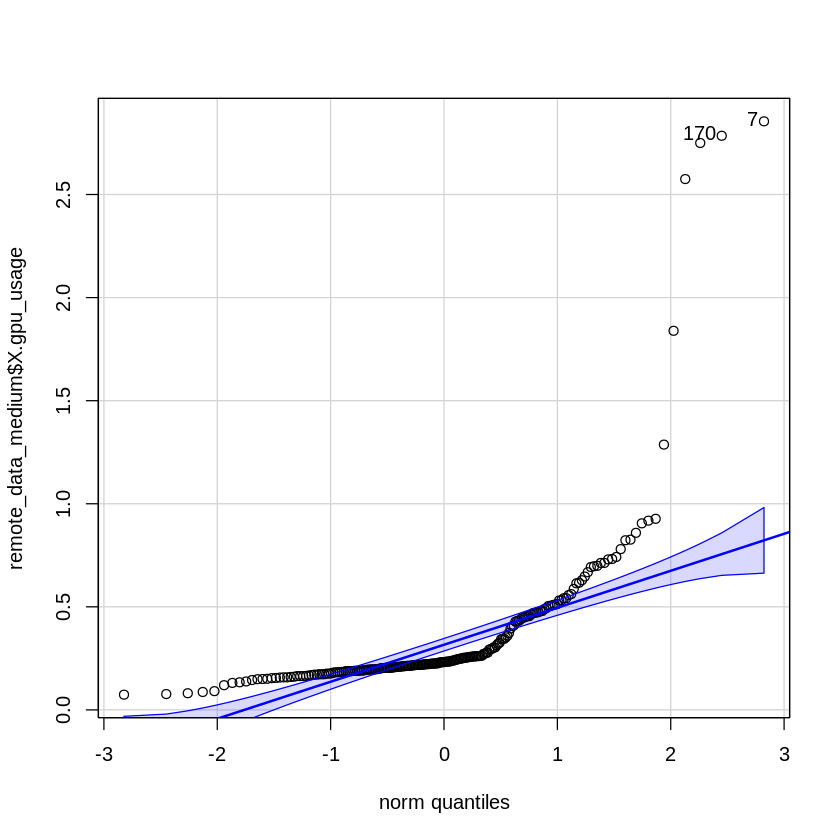

Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”


[1] 160 124

[1] 100 129

[1] 79 43

[1] 124 107

[1]   7 170

[1] 205  30

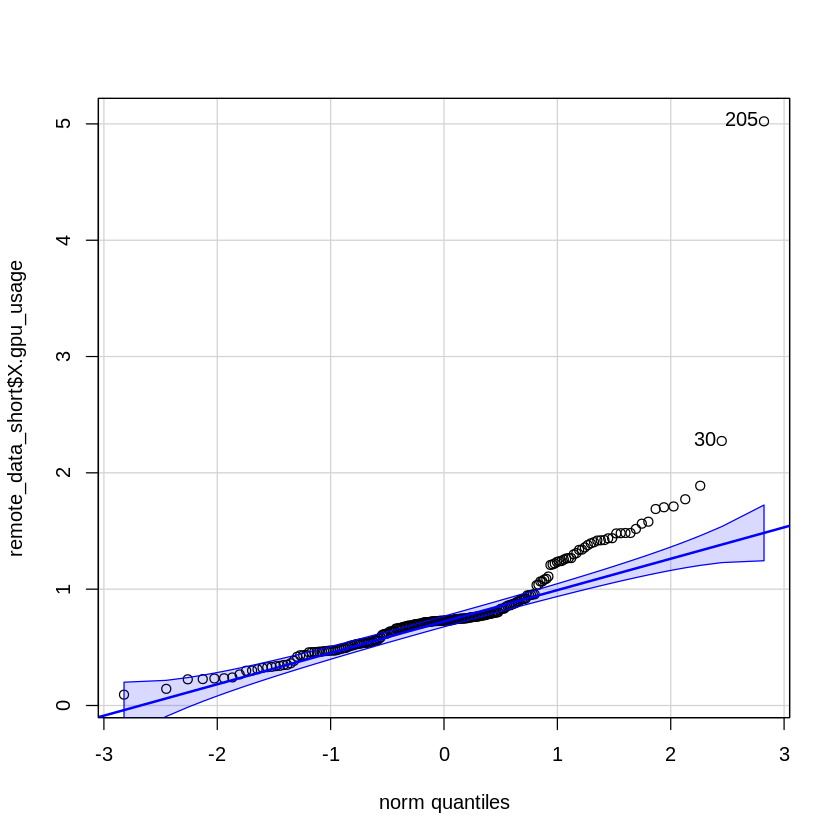

In [44]:
#QQ plots for GPU
#make this example reproducible
set.seed(11)


qqgpu_Local_Long <- qqPlot(local_data_long$X.gpu_usage)
qqgpu_Local_Medium <- qqPlot(local_data_medium$X.gpu_usage)
qqgpu_Local_Short <- qqPlot(local_data_short$X.gpu_usage)
qqgpu_Remote_Long <- qqPlot(remote_data_long$X.gpu_usage)
qqgpu_Remote_Medium <- qqPlot(remote_data_medium$X.gpu_usage)
qqgpu_Remote_Short <- qqPlot(remote_data_short$X.gpu_usage)

# Arrange the plots in a 4x4 grid
grid <- plot_grid(qqgpu_Local_Long, qqgpu_Local_Medium, qqgpu_Local_Short, qqgpu_Remote_Long, qqgpu_Remote_Medium, qqgpu_Remote_Short, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./q-q_plot_gpu_H2.png", plot = grid, width = 10, height = 8, units = "in")

qqgpu_Local_Long
qqgpu_Local_Medium
qqgpu_Local_Short
qqgpu_Remote_Long
qqgpu_Remote_Medium
qqgpu_Remote_Short


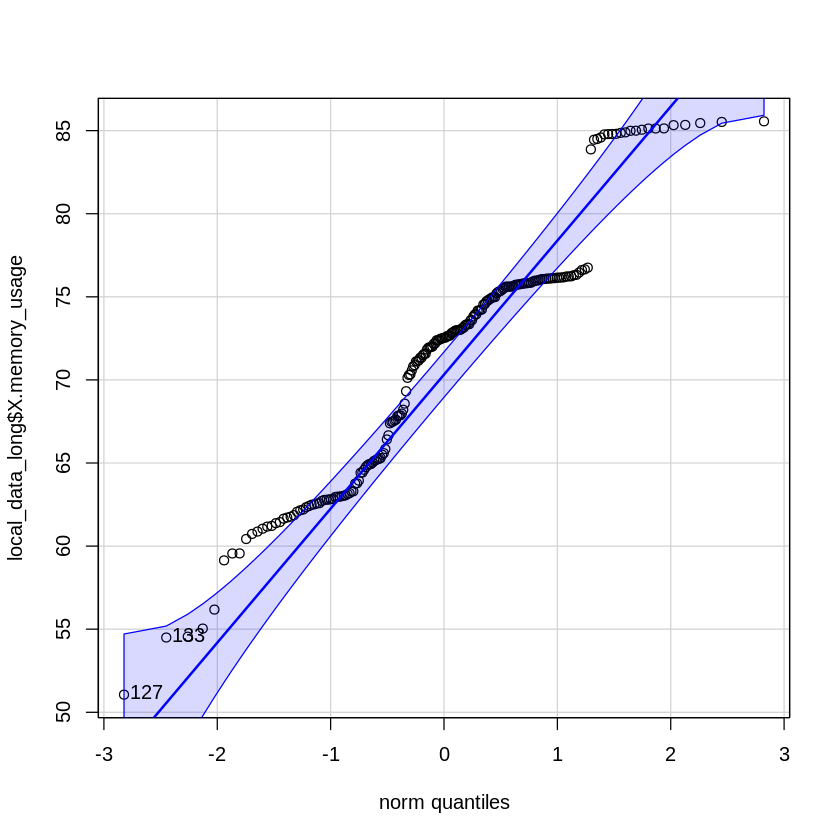

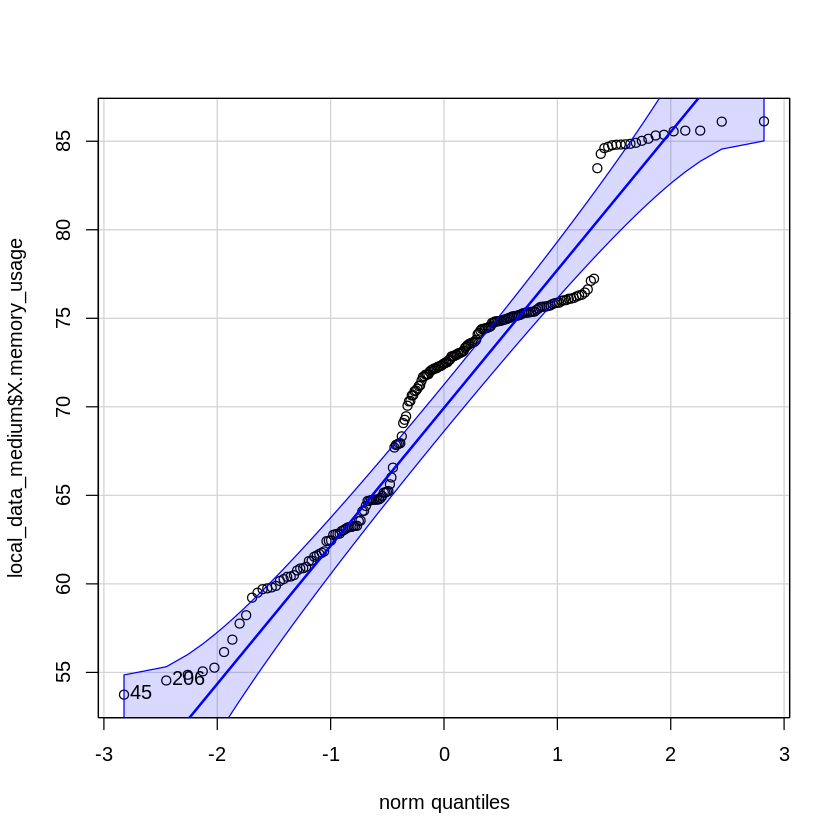

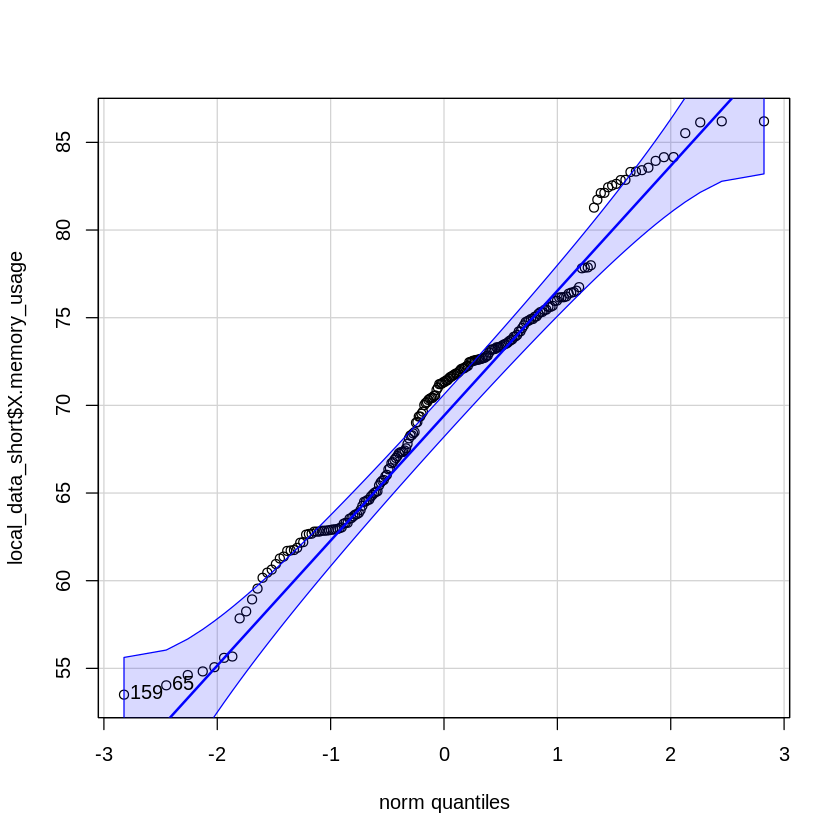

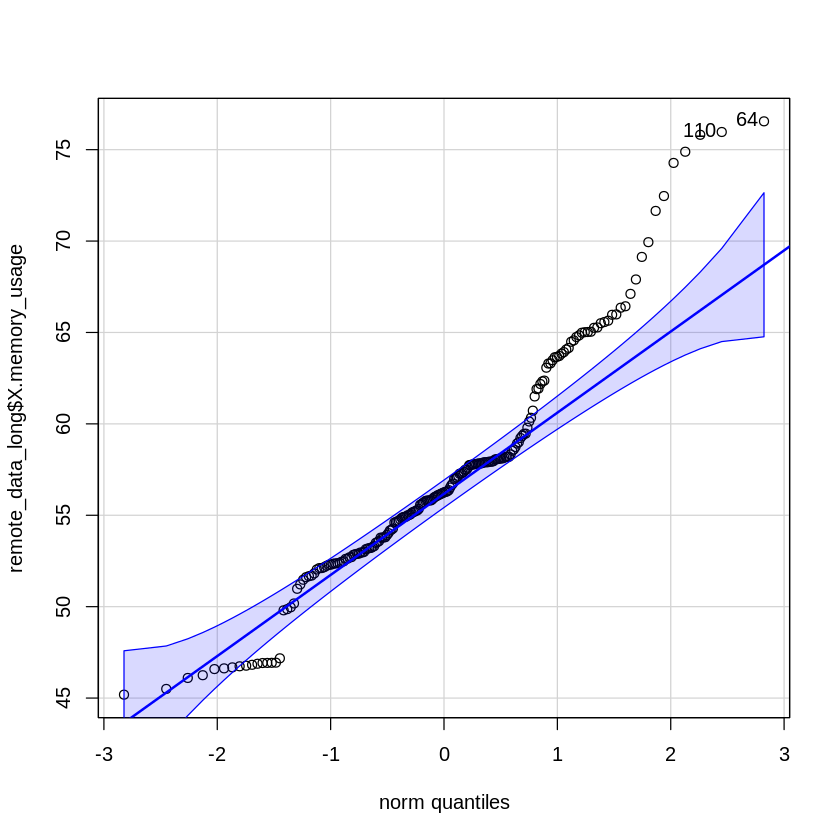

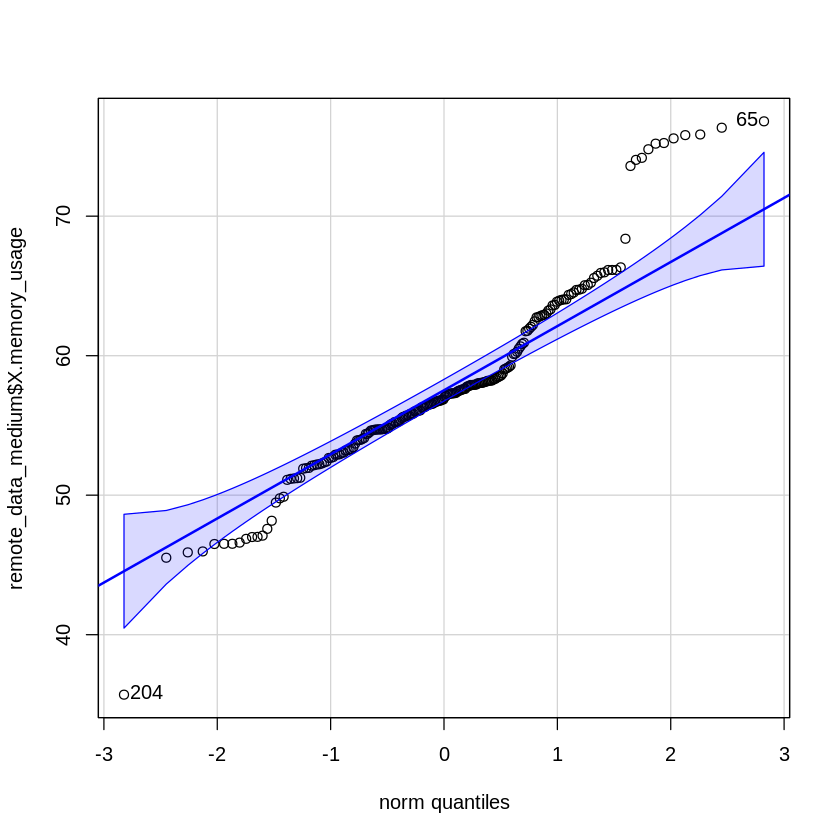

Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”


[1] 127 133

[1]  45 206

[1] 159  65

[1]  64 110

[1] 204  65

[1] 93 88

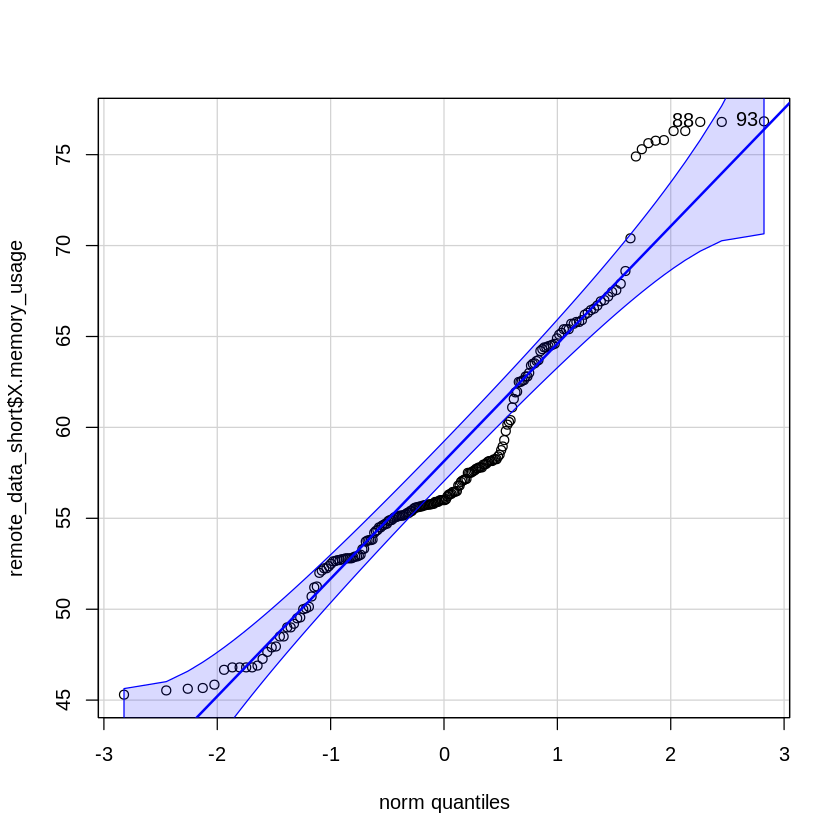

In [45]:
#QQ plots for memory usage
#make this example reproducible
set.seed(11)


qqmem_Local_Long <- qqPlot(local_data_long$X.memory_usage)
qqmem_Local_Medium <- qqPlot(local_data_medium$X.memory_usage)
qqmem_Local_Short <- qqPlot(local_data_short$X.memory_usage)
qqmem_Remote_Long <- qqPlot(remote_data_long$X.memory_usage)
qqmem_Remote_Medium <- qqPlot(remote_data_medium$X.memory_usage)
qqmem_Remote_Short <- qqPlot(remote_data_short$X.memory_usage)

# Arrange the plots in a 4x4 grid
grid <- plot_grid(qqmem_Local_Long, qqmem_Local_Medium, qqmem_Local_Short, qqmem_Remote_Long, qqmem_Remote_Short, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./q-q_plot_mem_H2.png", plot = grid, width = 10, height = 8, units = "in")

qqmem_Local_Long
qqmem_Local_Medium
qqmem_Local_Short
qqmem_Remote_Long
qqmem_Remote_Medium
qqmem_Remote_Short


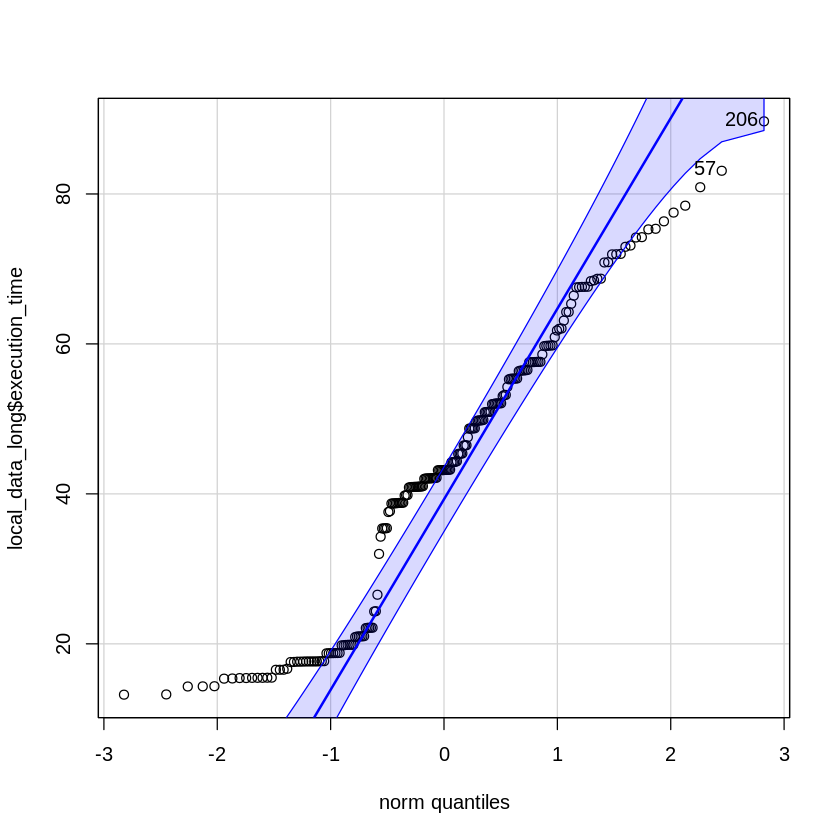

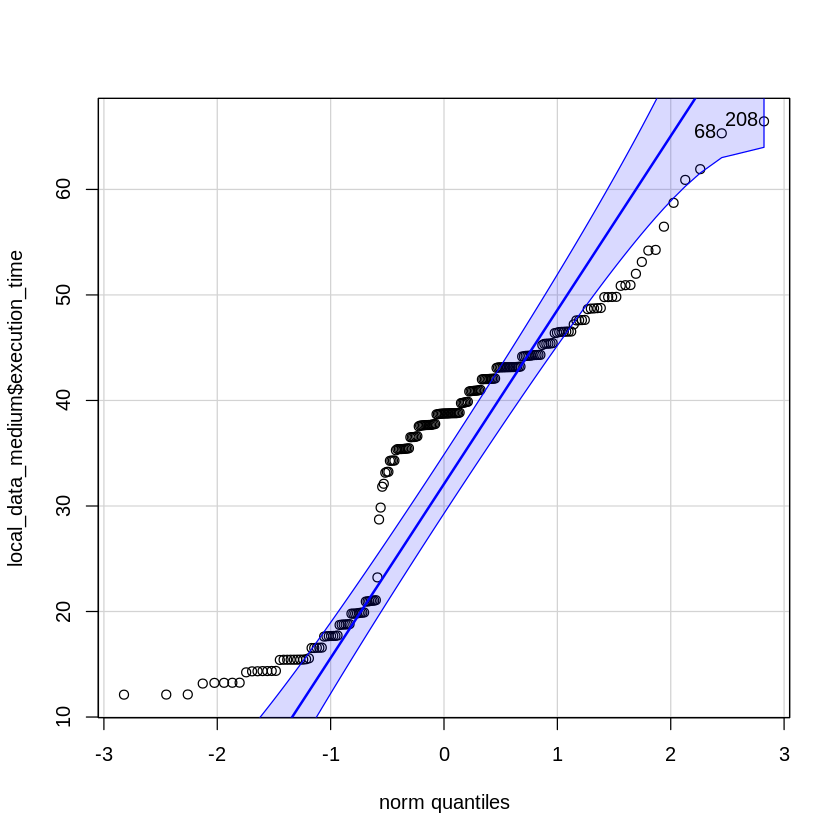

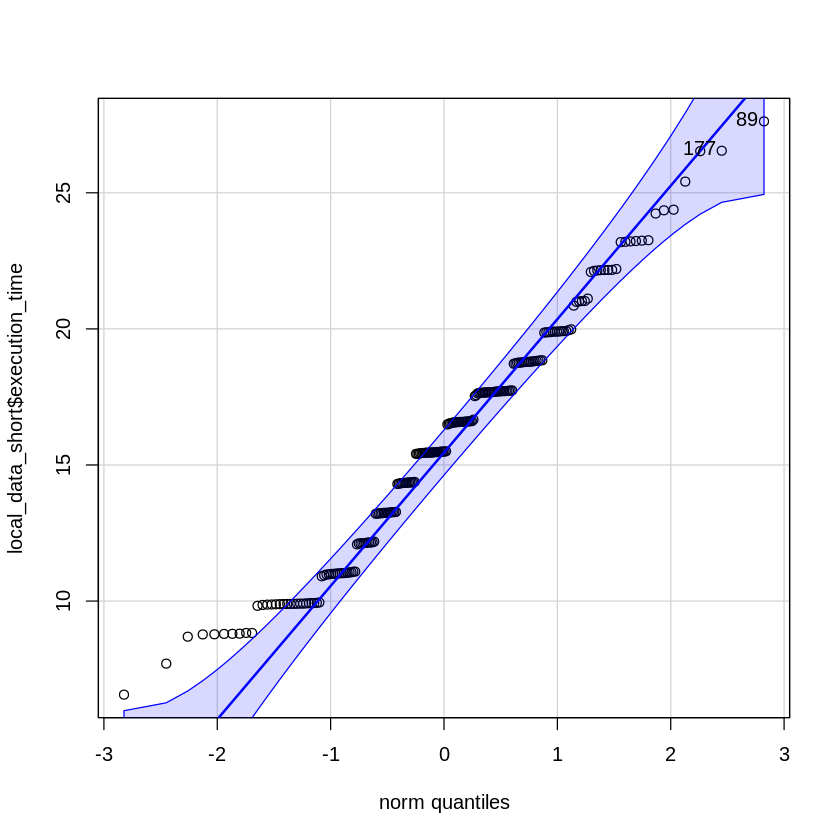

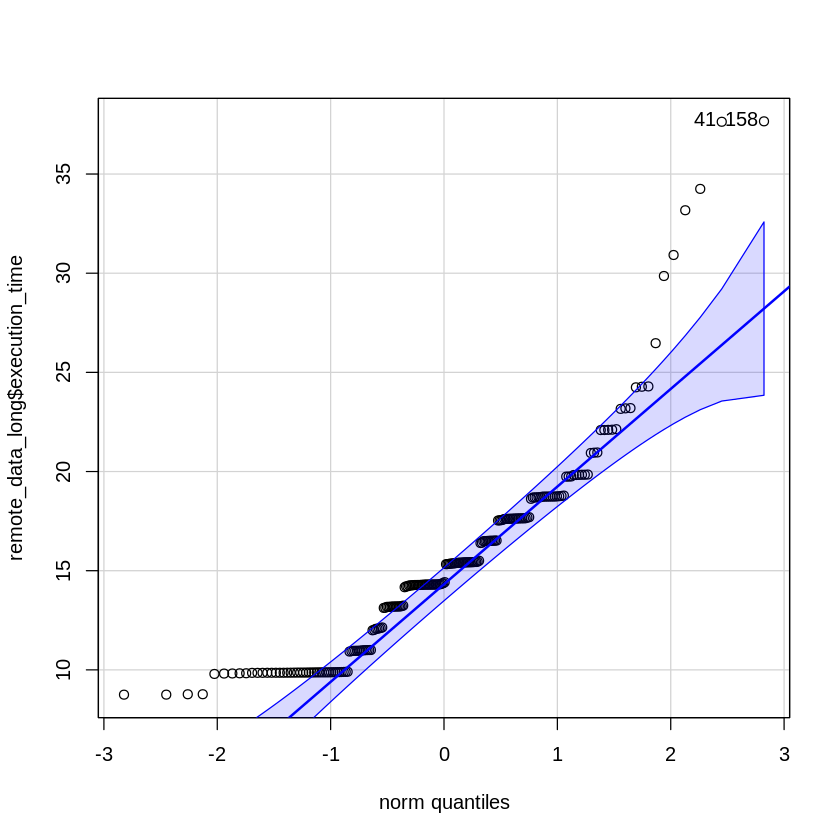

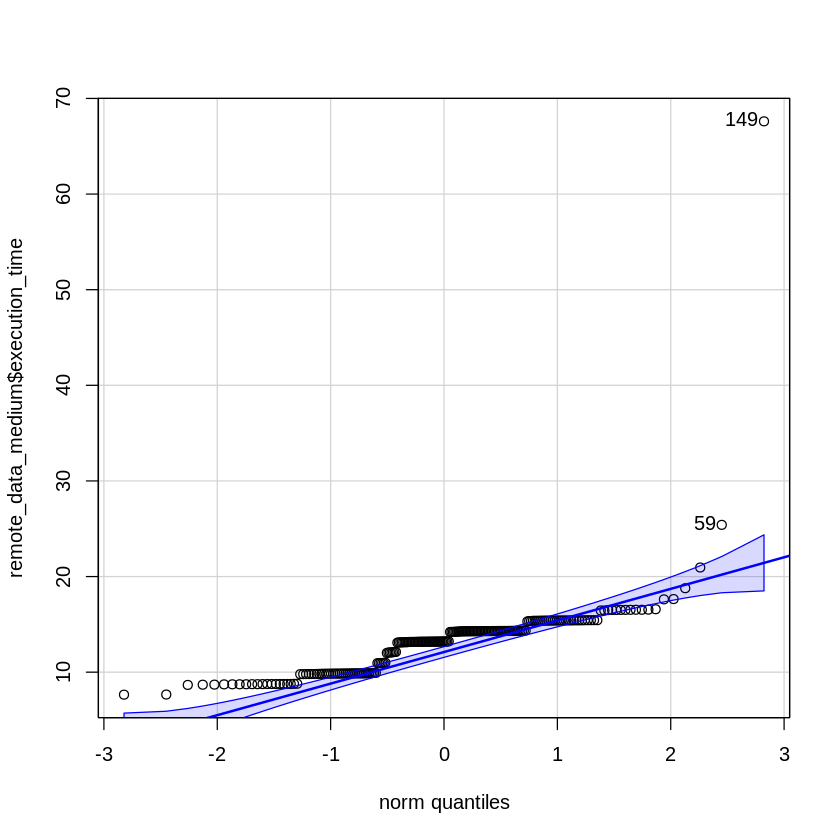

Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class integer into a grob.”


[1] 206  57

[1] 208  68

[1]  89 177

[1] 158  41

[1] 149  59

[1] 174 101

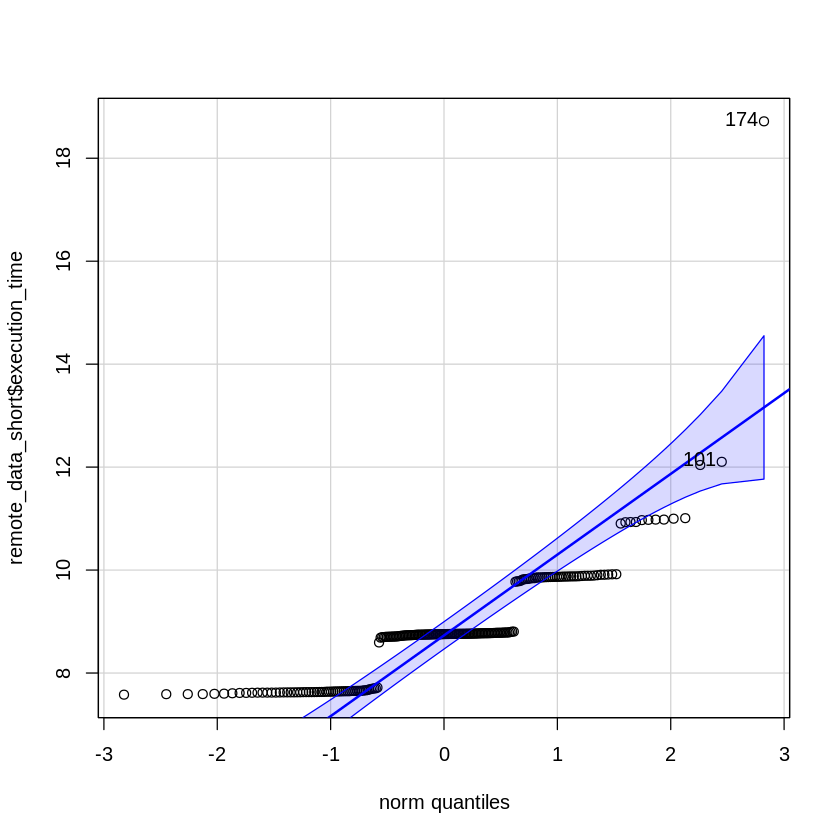

In [46]:
#QQ plots for execution time
#make this example reproducible
set.seed(11)


qqexe_Local_Long <- qqPlot(local_data_long$execution_time)
qqexe_Local_Medium <- qqPlot(local_data_medium$execution_time)
qqexe_Local_Short <- qqPlot(local_data_short$execution_time)
qqexe_Remote_Long <- qqPlot(remote_data_long$execution_time)
qqexe_Remote_Medium <- qqPlot(remote_data_medium$execution_time)
qqexe_Remote_Short <- qqPlot(remote_data_short$execution_time)

# Arrange the plots in a 4x4 grid
grid <- plot_grid(qqexe_Local_Long, qqexe_Local_Medium, qqexe_Local_Short, qqexe_Remote_Long, qqexe_Remote_Short, nrow = 2, labels = "AUTO")

# Save the grid of plots as a PNG image
ggsave(filename = "./q-q_plot_exe_H2.png", plot = grid, width = 10, height = 8, units = "in")

qqexe_Local_Long
qqexe_Local_Medium
qqexe_Local_Short
qqexe_Remote_Long
qqexe_Remote_Medium
qqexe_Remote_Short


In [47]:
#Find skewed data


find_skewness <- function(data, name, factor){
  # Create a boxplot
# Calculate skewness
skew <- skewness(data)

# Determine skewness type
if (skew > 0) {
  skew_type <- "Positively Skewed"
} else if (skew < 0) {
  skew_type <- "Negatively Skewed"
} else {
  skew_type <- "Symmetric (No skew)"
}

# Print summary statistics and skewness type
cat("Summary Statistics:\n", name, factor)
summary(data)
cat("\nSkewness:", skew_type)

# Interpretation
if (skew > 0) {
  cat("\n\nThe data is positively skewed, which means it has a long tail on the right side.")
} else if (skew < 0) {
  cat("\n\nThe data is negatively skewed, which means it has a long tail on the left side.")
} else {
  cat("\n\nThe data is symmetric, showing no skewness.")
}
}
find_skewness(local_data_long$X.cpu_usage, "LocalLong", "cpu")
find_skewness(local_data_medium$X.cpu_usage, "LocalMedium", "cpu")
find_skewness(local_data_short$X.cpu_usage, "LocalShort", "cpu")
find_skewness(remote_data_long$X.cpu_usage, "RemoteLong", "cpu")
find_skewness(remote_data_medium$X.cpu_usage, "RemoteMedium", "cpu")
find_skewness(remote_data_short$X.cpu_usage, "RemoteShort", "cpu")

find_skewness(local_data_long$X.gpu_usage, "LocalLong", "gpu")
find_skewness(local_data_medium$X.gpu_usage, "LocalMedium", "gpu")
find_skewness(local_data_short$X.gpu_usage, "LocalShort", "gpu")
find_skewness(remote_data_long$X.gpu_usage, "RemoteLong", "gpu")
find_skewness(remote_data_medium$X.gpu_usage, "RemoteMedium", "gpu")
find_skewness(remote_data_short$X.gpu_usage, "RemoteShort", "gpu")

find_skewness(local_data_long$X.memory_usage, "LocalLong", "mem")
find_skewness(local_data_medium$X.memory_usage, "LocalMedium", "mem")
find_skewness(local_data_short$X.memory_usage, "LocalShort", "mem")
find_skewness(remote_data_long$X.memory_usage, "RemoteLong", "mem")
find_skewness(remote_data_medium$X.memory_usage, "RemoteMedium", "mem")
find_skewness(remote_data_short$X.memory_usage, "RemoteShort", "mem")

find_skewness(local_data_long$execution_time, "LocalLong", "exe")
find_skewness(local_data_medium$execution_time, "LocalMedium", "exe")
find_skewness(local_data_short$execution_time, "LocalShort", "exe")
find_skewness(remote_data_long$execution_time, "RemoteLong", "exe")
find_skewness(remote_data_medium$execution_time, "RemoteMedium", "exe")
find_skewness(remote_data_short$execution_time, "RemoteShort", "exe")





Summary Statistics:
 LocalLong cpu
Skewness: Positively Skewed

The data is positively skewed, which means it has a long tail on the right side.Summary Statistics:
 LocalMedium cpu
Skewness: Positively Skewed

The data is positively skewed, which means it has a long tail on the right side.Summary Statistics:
 LocalShort cpu
Skewness: Positively Skewed

The data is positively skewed, which means it has a long tail on the right side.Summary Statistics:
 RemoteLong cpu
Skewness: Positively Skewed

The data is positively skewed, which means it has a long tail on the right side.Summary Statistics:
 RemoteMedium cpu
Skewness: Positively Skewed

The data is positively skewed, which means it has a long tail on the right side.Summary Statistics:
 RemoteShort cpu
Skewness: Positively Skewed

The data is positively skewed, which means it has a long tail on the right side.Summary Statistics:
 LocalLong gpu
Skewness: Negatively Skewed

The data is negatively skewed, which means it has a long tail o

In [48]:
#Shapiro-Wilks test

# A low p-value (typically less than 0.05) indicates that the data significantly deviates from a normal distribution, providing evidence to reject the null hypothesis. In other words, it suggests non-normality.
#It is calculated during the Shapiro-Wilk test and is used to assess the degree of normality in the data. The value of W ranges between 0 and 1, where 1 indicates perfect normality.
#The Shorter the W statistic, the stronger the evidence against the null hypothesis (the assumption that the data follows a normal distribution). Shorter W values suggest departures from normality.

shapiro_Loc_B <- shapiro.test(local_data_long$energy_consumed.J.)
shapiro_Loc_M <- shapiro.test(local_data_medium$energy_consumed.J.)
shapiro_Loc_S <- shapiro.test(local_data_short$energy_consumed.J.)
shapiro_Rem_B <- shapiro.test(remote_data_long$energy_consumed.J.)
shapiro_Rem_M <- shapiro.test(remote_data_medium$energy_consumed.J.)
shapiro_Rem_S <- shapiro.test(remote_data_short$energy_consumed.J.)

shapiro_Loc_B_cpu <- shapiro.test(local_data_long$X.cpu_usage)
shapiro_Loc_M_cpu <- shapiro.test(local_data_medium$X.cpu_usage)
shapiro_Loc_S_cpu <- shapiro.test(local_data_short$X.cpu_usage)
shapiro_Rem_B_cpu <- shapiro.test(remote_data_long$X.cpu_usage)
shapiro_Rem_M_cpu <- shapiro.test(remote_data_medium$X.cpu_usage)
shapiro_Rem_S_cpu <- shapiro.test(remote_data_short$X.cpu_usage)

shapiro_Loc_B_gpu <- shapiro.test(local_data_long$X.gpu_usage)
shapiro_Loc_M_gpu <- shapiro.test(local_data_medium$X.gpu_usage)
shapiro_Loc_S_gpu <- shapiro.test(local_data_short$X.gpu_usage)
shapiro_Rem_B_gpu <- shapiro.test(remote_data_long$X.gpu_usage)
shapiro_Rem_M_gpu <- shapiro.test(remote_data_medium$X.gpu_usage)
shapiro_Rem_S_gpu <- shapiro.test(remote_data_short$X.gpu_usage)

shapiro_Loc_B_mem <- shapiro.test(local_data_long$X.memory_usage)
shapiro_Loc_M_mem <- shapiro.test(local_data_medium$X.memory_usage)
shapiro_Loc_S_mem <- shapiro.test(local_data_short$X.memory_usage)
shapiro_Rem_B_mem <- shapiro.test(remote_data_long$X.memory_usage)
shapiro_Rem_M_mem <- shapiro.test(remote_data_medium$X.memory_usage)
shapiro_Rem_S_mem <- shapiro.test(remote_data_short$X.memory_usage)

shapiro_Loc_B_exe <- shapiro.test(local_data_long$execution_time)
shapiro_Loc_M_exe <- shapiro.test(local_data_medium$execution_time)
shapiro_Loc_S_exe <- shapiro.test(local_data_short$execution_time)
shapiro_Rem_B_exe <- shapiro.test(remote_data_long$execution_time)
shapiro_Rem_M_exe <- shapiro.test(remote_data_medium$execution_time)
shapiro_Rem_S_exe <- shapiro.test(remote_data_short$execution_time)

cat("shapiro_Local_Long",  "P_Value: ", shapiro_Loc_B$p.value, "W_Value: ", shapiro_Loc_B$statistic, "\n")
cat("shapiro_Local_Medium",  "P_Value: ", shapiro_Loc_M$p.value, "W_Value: ", shapiro_Loc_M$statistic, "\n")
cat("shapiro_Local_Short",  "P_Value: ", shapiro_Loc_S$p.value,"W_Value: ", shapiro_Loc_S$statistic, "\n")
cat("shapiro_Remote_Long",  "P_Value: ", shapiro_Rem_B$p.value,"W_Value: ", shapiro_Rem_B$statistic, "\n")
cat("shapiro_Remote_Medium",  "P_Value: ", shapiro_Rem_M$p.value,"W_Value: ", shapiro_Rem_M$statistic, "\n")
cat("shapiro_Remote_Short",  "P_Value: ", shapiro_Rem_S$p.value,"W_Value: ", shapiro_Rem_S$statistic, "\n")


cat("shapiro_Local_Long_cpu",  "P_Value: ", shapiro_Loc_B_cpu$p.value, "W_Value: ", shapiro_Loc_B_cpu$statistic, "\n")
cat("shapiro_Local_Medium_cpu",  "P_Value: ", shapiro_Loc_M_cpu$p.value, "W_Value: ", shapiro_Loc_M_cpu$statistic, "\n")
cat("shapiro_Local_Short_cpu",  "P_Value: ", shapiro_Loc_S_cpu$p.value,"W_Value: ", shapiro_Loc_S_cpu$statistic, "\n")
cat("shapiro_Remote_Long_cpu",  "P_Value: ", shapiro_Rem_B_cpu$p.value,"W_Value: ", shapiro_Rem_B_cpu$statistic, "\n")
cat("shapiro_Remote_Medium_cpu",  "P_Value: ", shapiro_Rem_M_cpu$p.value,"W_Value: ", shapiro_Rem_M_cpu$statistic, "\n")
cat("shapiro_Remote_Short_cpu ",  "P_Value: ", shapiro_Rem_S_cpu$p.value,"W_Value: ", shapiro_Rem_S_cpu$statistic, "\n")

cat("shapiro_Local_Long_gpu",  "P_Value: ", shapiro_Loc_B_gpu$p.value, "W_Value: ", shapiro_Loc_B_gpu$statistic, "\n")
cat("shapiro_Local_Medium_gpu",  "P_Value: ", shapiro_Loc_M_gpu$p.value, "W_Value: ", shapiro_Loc_M_gpu$statistic, "\n")
cat("shapiro_Local_Short_gpu",  "P_Value: ", shapiro_Loc_S_gpu$p.value,"W_Value: ", shapiro_Loc_S_gpu$statistic, "\n")
cat("shapiro_Remote_Long_gpu",  "P_Value: ", shapiro_Rem_B_gpu$p.value,"W_Value: ", shapiro_Rem_B_gpu$statistic, "\n")
cat("shapiro_Remote_Medium_gpu",  "P_Value: ", shapiro_Rem_M_gpu$p.value,"W_Value: ", shapiro_Rem_M_gpu$statistic, "\n")
cat("shapiro_Remote_Short_gpu ",  "P_Value: ", shapiro_Rem_S_gpu$p.value,"W_Value: ", shapiro_Rem_S_gpu$statistic, "\n")

cat("shapiro_Local_Long_mem",  "P_Value: ", shapiro_Loc_B_mem$p.value, "W_Value: ", shapiro_Loc_B_mem$statistic, "\n")
cat("shapiro_Local_Medium_mem",  "P_Value: ", shapiro_Loc_M_mem$p.value, "W_Value: ", shapiro_Loc_M_mem$statistic, "\n")
cat("shapiro_Local_Short_mem",  "P_Value: ", shapiro_Loc_S_mem$p.value,"W_Value: ", shapiro_Loc_S_mem$statistic, "\n")
cat("shapiro_Remote_Long_mem",  "P_Value: ", shapiro_Rem_B_mem$p.value,"W_Value: ", shapiro_Rem_B_mem$statistic, "\n")
cat("shapiro_Remote_Medium_mem",  "P_Value: ", shapiro_Rem_M_mem$p.value,"W_Value: ", shapiro_Rem_M_mem$statistic, "\n")
cat("shapiro_Remote_Short_mem ",  "P_Value: ", shapiro_Rem_S_mem$p.value,"W_Value: ", shapiro_Rem_S_mem$statistic, "\n")

cat("shapiro_Local_Long_exe",  "P_Value: ", shapiro_Loc_B_exe$p.value, "W_Value: ", shapiro_Loc_B_exe$statistic, "\n")
cat("shapiro_Local_Medium_exe",  "P_Value: ", shapiro_Loc_M_exe$p.value, "W_Value: ", shapiro_Loc_M_exe$statistic, "\n")
cat("shapiro_Local_Short_exe",  "P_Value: ", shapiro_Loc_S_exe$p.value,"W_Value: ", shapiro_Loc_S_exe$statistic, "\n")
cat("shapiro_Remote_Long_exe",  "P_Value: ", shapiro_Rem_B_exe$p.value,"W_Value: ", shapiro_Rem_B_exe$statistic, "\n")
cat("shapiro_Remote_Medium_exe",  "P_Value: ", shapiro_Rem_M_exe$p.value,"W_Value: ", shapiro_Rem_M_exe$statistic, "\n")
cat("shapiro_Remote_Short_exe",  "P_Value: ", shapiro_Rem_S_exe$p.value,"W_Value: ", shapiro_Rem_S_exe$statistic, "\n")



shapiro_Local_Long P_Value:  7.857444e-09 W_Value:  0.9254728 
shapiro_Local_Medium P_Value:  2.377152e-12 W_Value:  0.8713526 
shapiro_Local_Short P_Value:  8.146716e-18 W_Value:  0.7420252 
shapiro_Remote_Long P_Value:  1.459419e-17 W_Value:  0.7494984 
shapiro_Remote_Medium P_Value:  2.821722e-23 W_Value:  0.5364082 
shapiro_Remote_Short P_Value:  4.943907e-18 W_Value:  0.7354935 
shapiro_Local_Long_cpu P_Value:  1.656346e-25 W_Value:  0.4234804 
shapiro_Local_Medium_cpu P_Value:  6.741872e-25 W_Value:  0.4562486 
shapiro_Local_Short_cpu P_Value:  4.860633e-21 W_Value:  0.6316578 
shapiro_Remote_Long_cpu P_Value:  1.417235e-21 W_Value:  0.6103645 
shapiro_Remote_Medium_cpu P_Value:  6.061687e-20 W_Value:  0.6724968 
shapiro_Remote_Short_cpu  P_Value:  6.011886e-18 W_Value:  0.7380656 
shapiro_Local_Long_gpu P_Value:  0.0001608073 W_Value:  0.9694418 
shapiro_Local_Medium_gpu P_Value:  8.248489e-08 W_Value:  0.9378408 
shapiro_Local_Short_gpu P_Value:  0.02701856 W_Value:  0.9851901 

Find skewed data and apply transformations accordingly to check if normality is enhanced

In [49]:
# see if data is skewed positively, negatively or not at all
check_skew <- function(skew){
  if (skew > 0) {
  return("Positively Skewed")
} else if (skew < 0) {
  return("Negatively Skewed")
} else {
  return("Symmetric")
}
}

# transform the data pairs to normality to see if the same transformation can be applied to the data to make it fit a normal distribution
transform_pairs_towards_normality <- function(local,remote, name){

# calculate skewness of datasets
local_skew <- skewness(local)
remote_skew <- skewness(remote)

results_skew_local <- check_skew(local_skew)
results_skew_remote <- check_skew(remote_skew)


# check how much the data is skewed in what direction and apply transformation according to the skew:

if(results_skew_local == results_skew_remote){
  if(results_skew_local == "Positively Skewed"){
  # sqrt(Short skew)/log(larger skew) for positive skew transformation
  local_sqrt = sqrt(local)
  remote_sqrt = sqrt(remote)
  local_log = log(local)
  remote_log = log(remote)

  # test normality differences
  shapiro_Local <- shapiro.test(local)
  shapiro_Remote <- shapiro.test(remote)
  shapiro_Local_sqrt <- shapiro.test(local_sqrt)
  shapiro_Remote_sqrt <- shapiro.test(remote_sqrt)
  shapiro_Local_log <- shapiro.test(local_log)
  shapiro_Remote_log <- shapiro.test(remote_log)

  cat(name, " Local before transformation: ", shapiro_Local$p.value, "sqrt: ",shapiro_Local_sqrt$p.value, "log: ",shapiro_Local_log$p.value,  "\n")
  cat(name, " Remote before transformation: ", shapiro_Remote$p.value, "sqrt: ",shapiro_Remote_sqrt$p.value, "log: ",shapiro_Remote_log$p.value,  "\n")
  }
  else{
  # power^2(Short skew)/power^3(larger skew) for negative skew transformation
  local_power = local^2
  remote_power = remote^2
  local_power3 = local^3
  remote_power3 = remote^3

  # test normality differences
  shapiro_Local <- shapiro.test(local)
  shapiro_Remote <- shapiro.test(remote)
  shapiro_Local_power <- shapiro.test(local_power)
  shapiro_Remote_power <- shapiro.test(remote_power)
  shapiro_Local_power3 <- shapiro.test(local_power3)
  shapiro_Remote_power3 <- shapiro.test(remote_power3)

  cat(name, " Local before transformation: ", shapiro_Local$p.value, "power 2: ",shapiro_Local_power$p.value, "power 3: ",shapiro_Local_power3$p.value, "\n")
  cat(name, " Remote before transformation: ", shapiro_Remote$p.value, "power 2: ",shapiro_Remote_power$p.value, "power 3: ",shapiro_Remote_power3$p.value, "\n")
  }
} else{
  print("local and remote datasets are not skewed similarly which is why no transformation is applied")
}
}

transform_pairs_towards_normality(local_data_long$energy_consumed.J.,remote_data_long$energy_consumed.J., "Long Dataset energy usage")
transform_pairs_towards_normality(local_data_medium$energy_consumed.J.,remote_data_medium$energy_consumed.J., "Medium Dataset energy usage")
transform_pairs_towards_normality(local_data_short$energy_consumed.J.,remote_data_short$energy_consumed.J., "Short Dataset energy usage")

transform_pairs_towards_normality(local_data_long$X.cpu_usage,remote_data_long$X.cpu_usage, "Long Dataset cpu usage")
transform_pairs_towards_normality(local_data_medium$X.cpu_usage,remote_data_medium$X.cpu_usage, "Medium Dataset cpu usage")
transform_pairs_towards_normality(local_data_short$X.cpu_usage,remote_data_short$X.cpu_usage, "Short Dataset cpu usage")

transform_pairs_towards_normality(local_data_long$X.gpu_usage,remote_data_long$X.gpu_usage, "Long Dataset gpu usage")
transform_pairs_towards_normality(local_data_medium$X.gpu_usage,remote_data_medium$X.gpu_usage, "Medium Dataset gpu usage")
transform_pairs_towards_normality(local_data_short$X.gpu_usage,remote_data_short$X.gpu_usage, "Short Dataset gpu usage")

transform_pairs_towards_normality(local_data_long$X.memory_usage,remote_data_long$X.memory_usage, "Long Dataset memory usage")
transform_pairs_towards_normality(local_data_medium$X.memory_usage,remote_data_medium$X.memory_usage, "Medium Dataset memory usage")
transform_pairs_towards_normality(local_data_short$X.memory_usage,remote_data_short$X.memory_usage, "Short Dataset memory usage")

transform_pairs_towards_normality(local_data_long$execution_time,remote_data_long$execution_time, "Long Dataset execution time")
transform_pairs_towards_normality(local_data_medium$execution_time,remote_data_medium$execution_time, "Medium Dataset execution time")
transform_pairs_towards_normality(local_data_short$execution_time,remote_data_short$execution_time, "Short Dataset execution time")


[1] "local and remote datasets are not skewed similarly which is why no transformation is applied"
[1] "local and remote datasets are not skewed similarly which is why no transformation is applied"
Short Dataset energy usage  Local before transformation:  8.146716e-18 sqrt:  1.075057e-11 log:  4.141542e-06 
Short Dataset energy usage  Remote before transformation:  4.943907e-18 sqrt:  4.995805e-14 log:  4.813029e-13 
Long Dataset cpu usage  Local before transformation:  1.656346e-25 sqrt:  1.016111e-22 log:  9.121841e-19 
Long Dataset cpu usage  Remote before transformation:  1.417235e-21 sqrt:  2.900059e-16 log:  2.235175e-09 
Medium Dataset cpu usage  Local before transformation:  6.741872e-25 sqrt:  4.794132e-22 log:  2.080199e-18 
Medium Dataset cpu usage  Remote before transformation:  6.061687e-20 sqrt:  9.556058e-16 log:  5.490469e-10 
Short Dataset cpu usage  Local before transformation:  4.860633e-21 sqrt:  8.576459e-17 log:  1.53168e-11 
Short Dataset cpu usage  Remote before

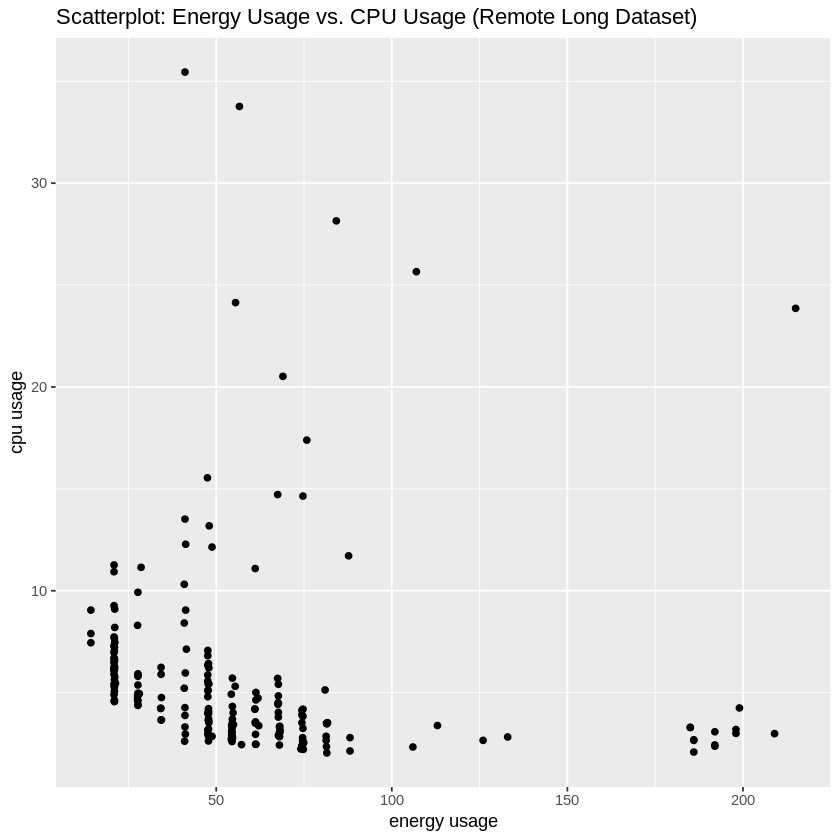

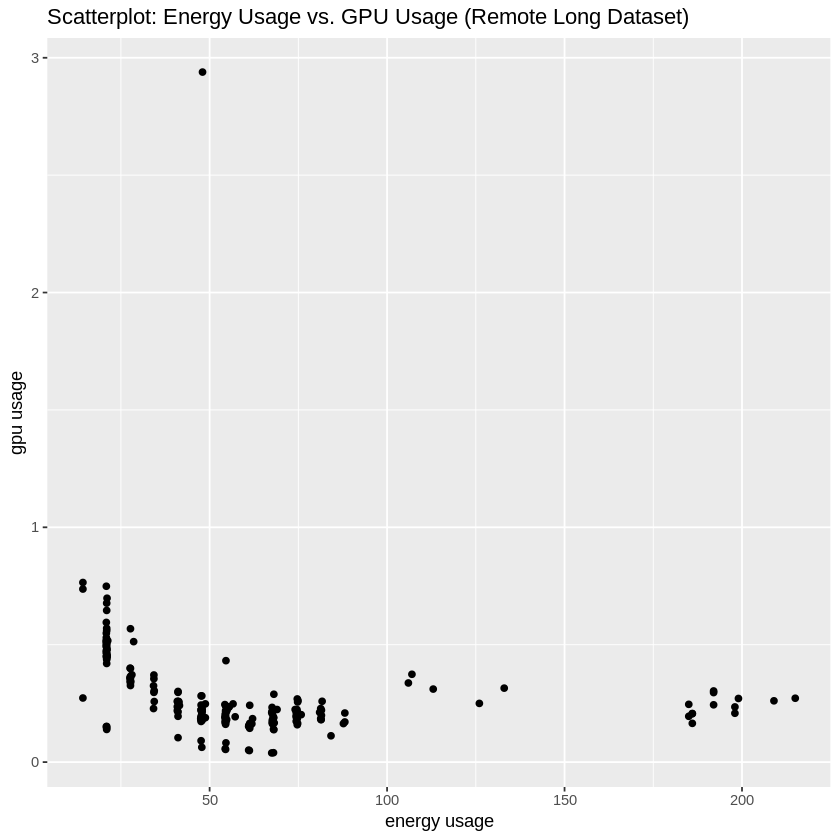

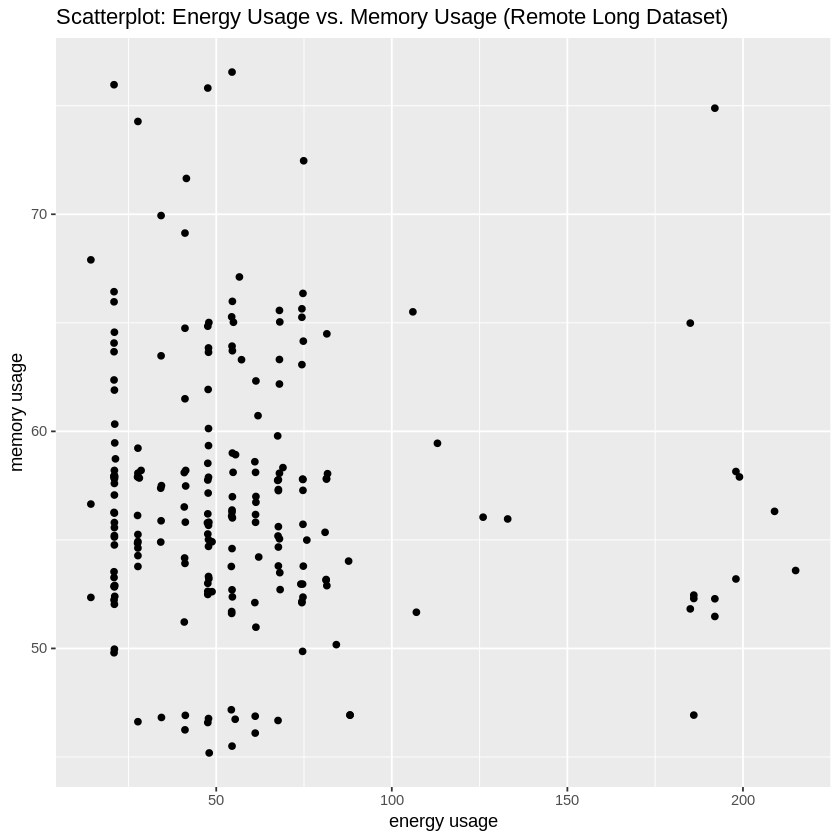

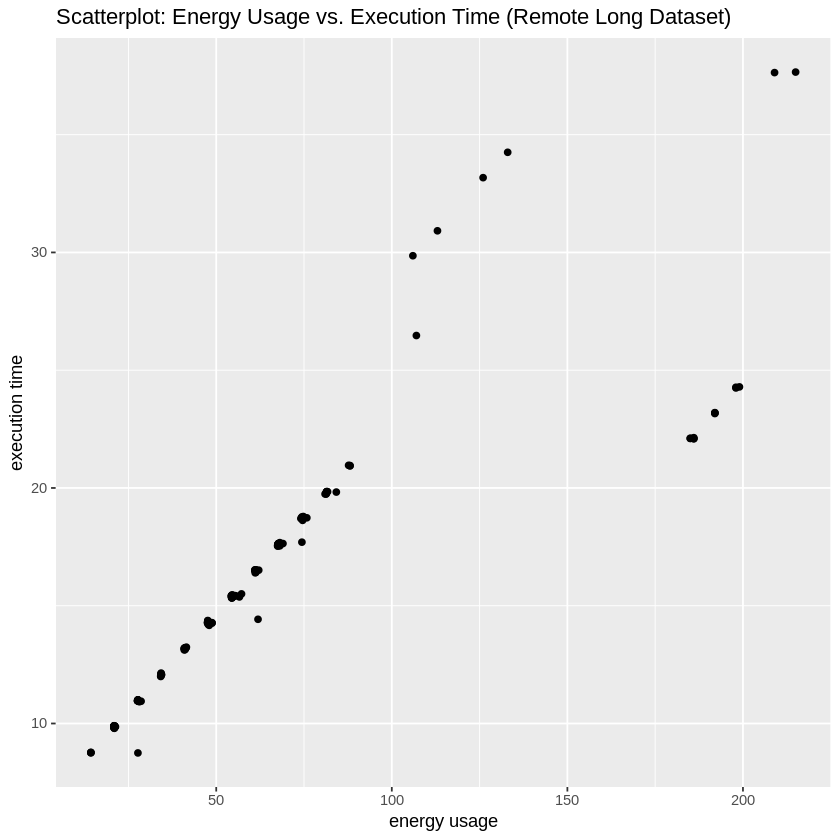

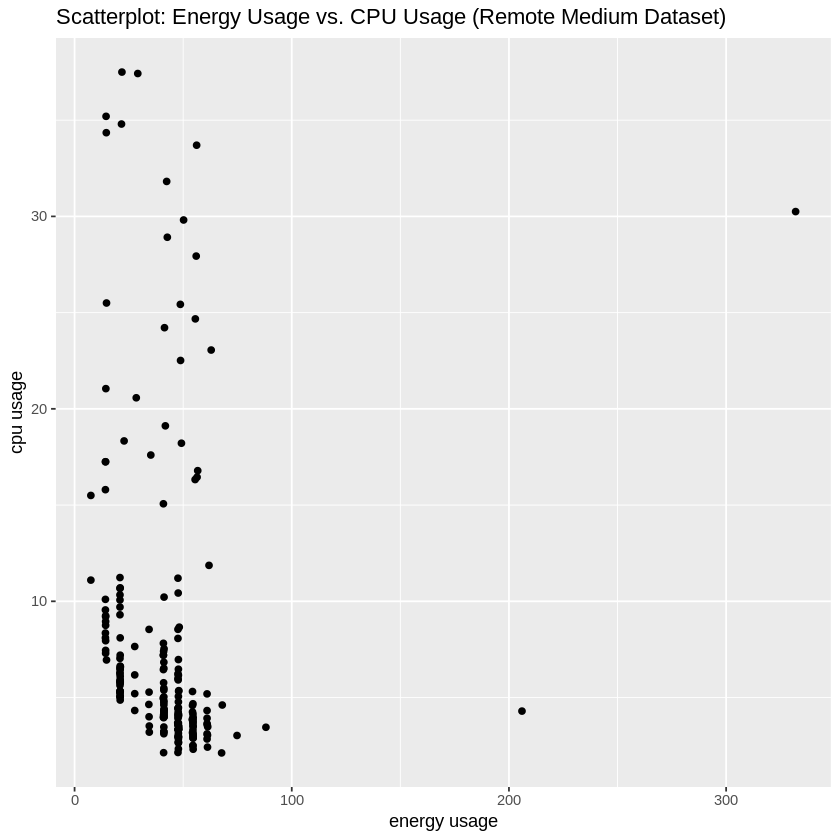

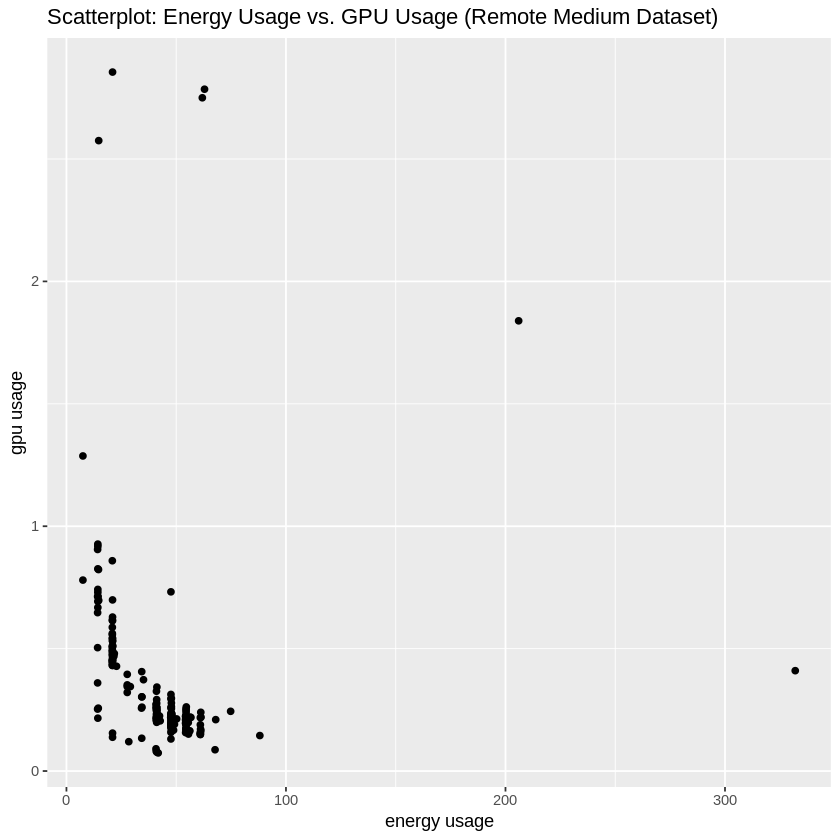

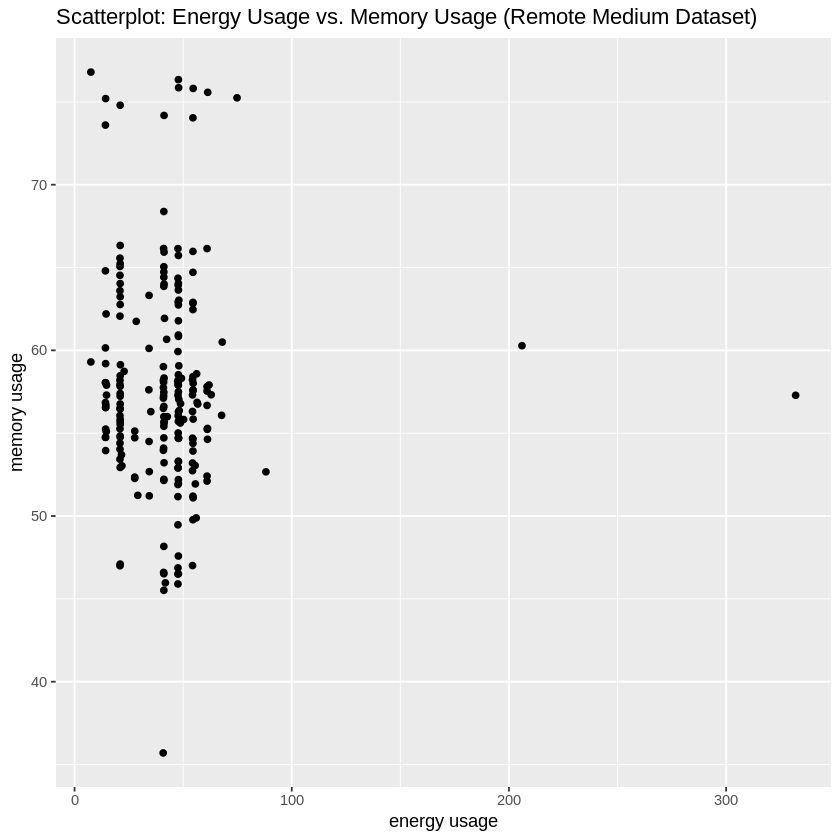

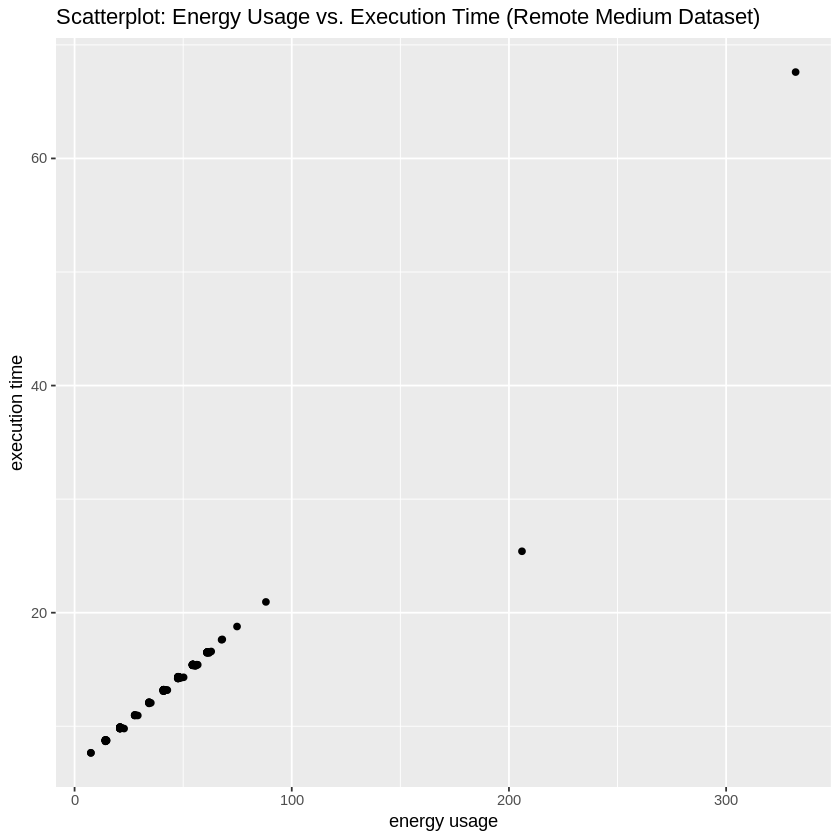

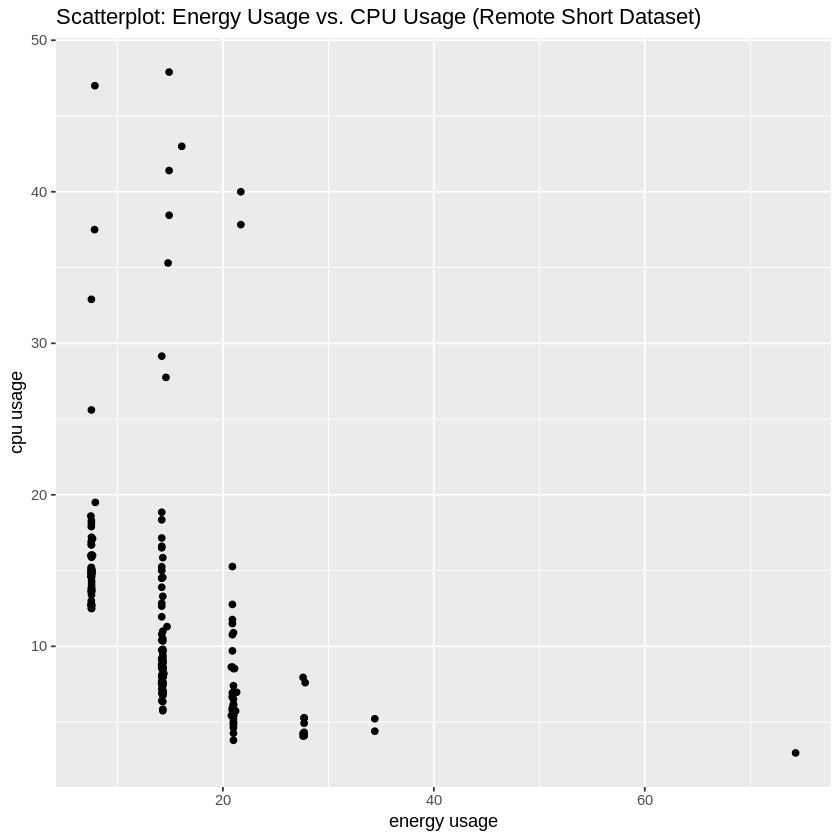

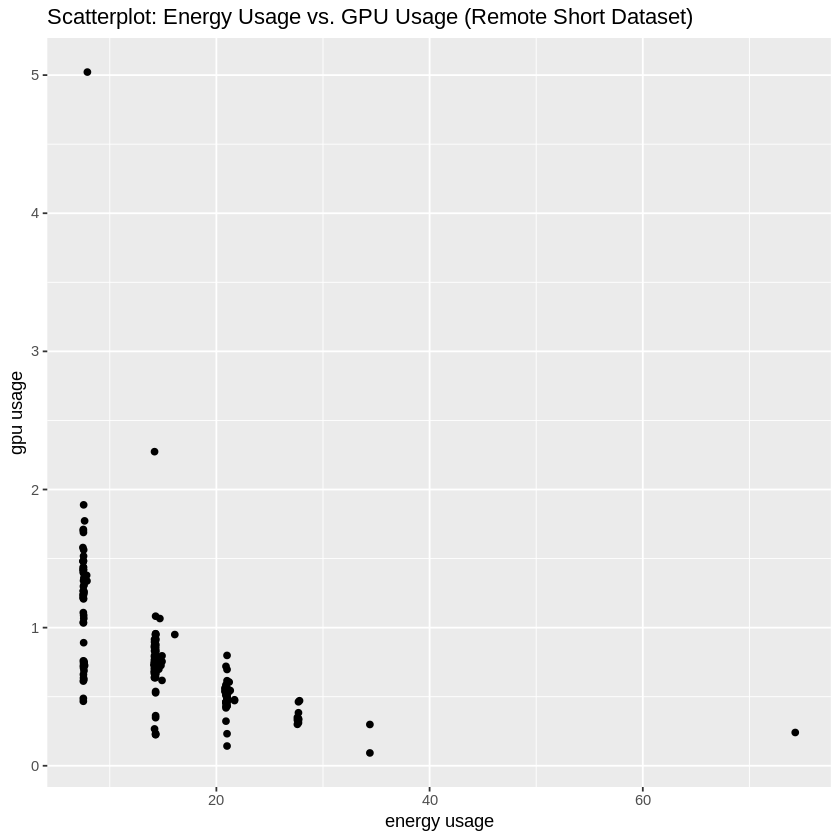

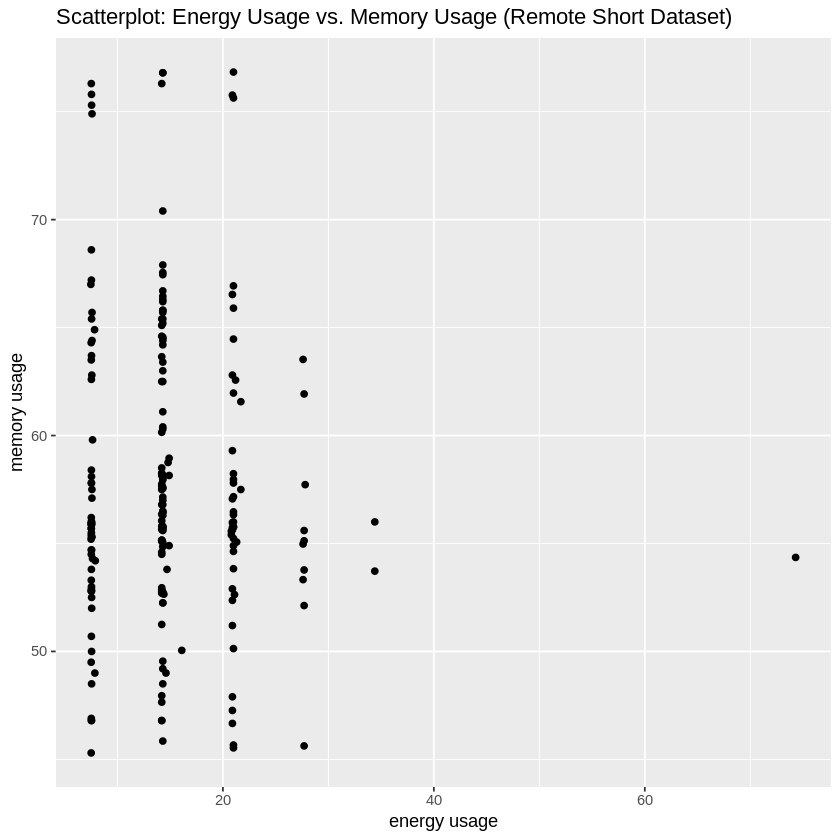

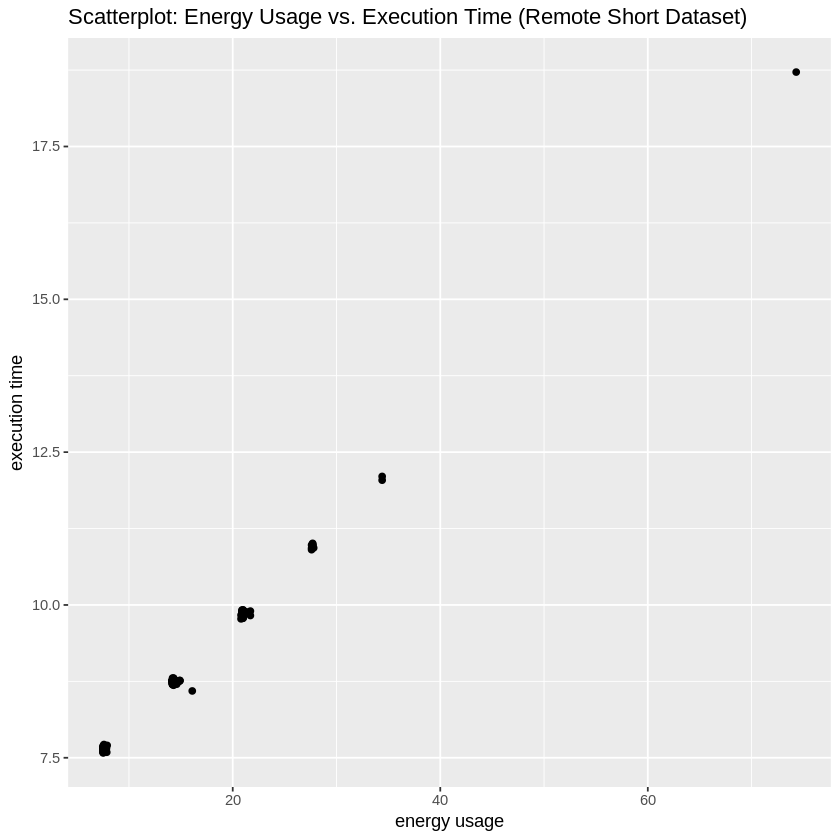

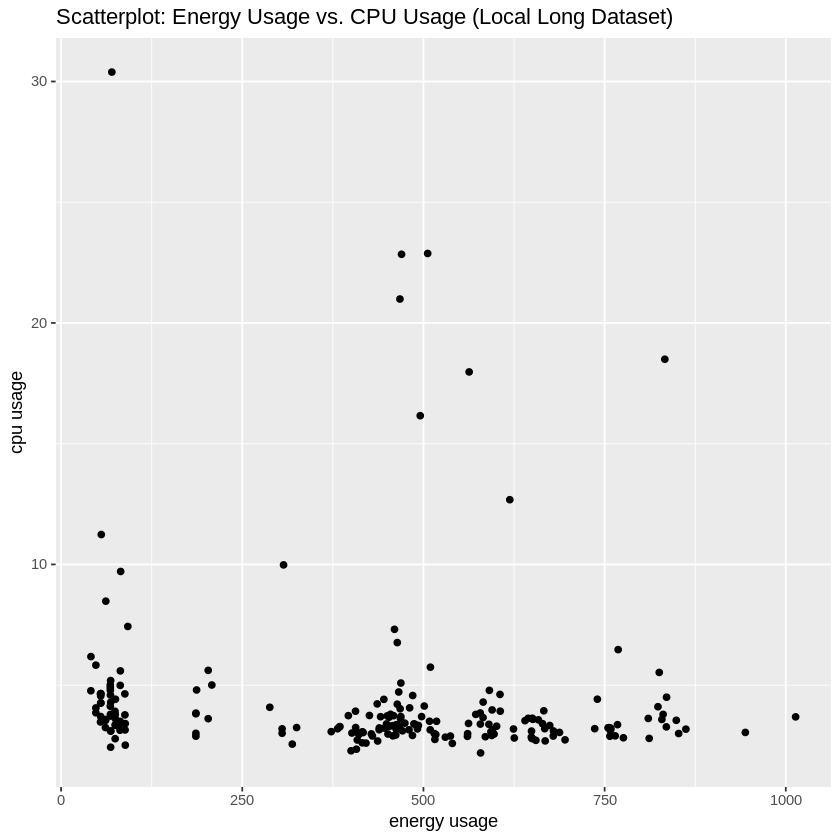

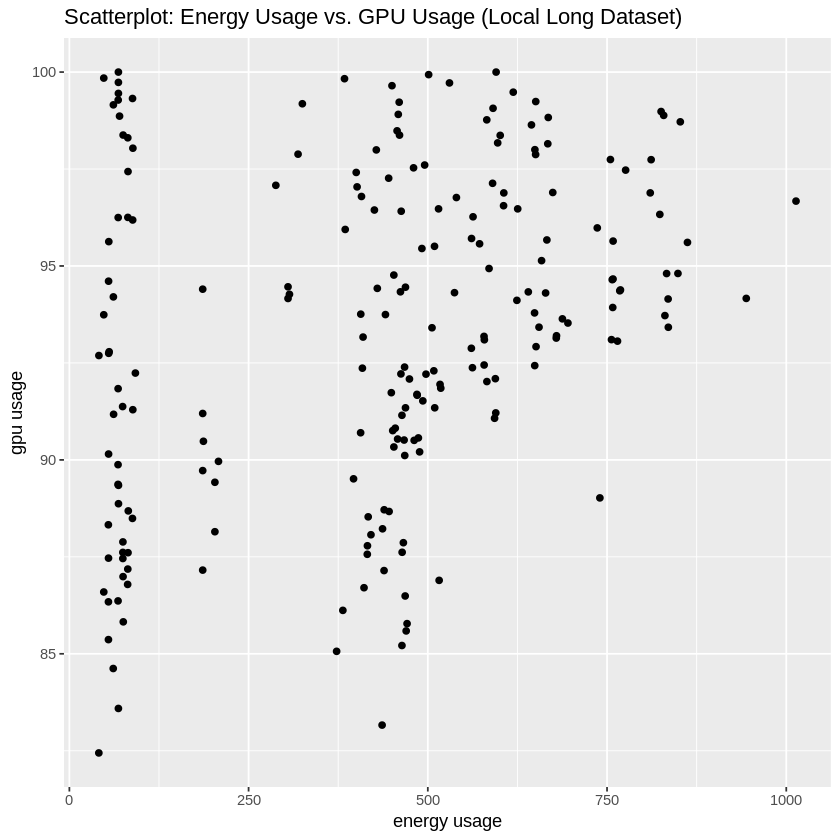

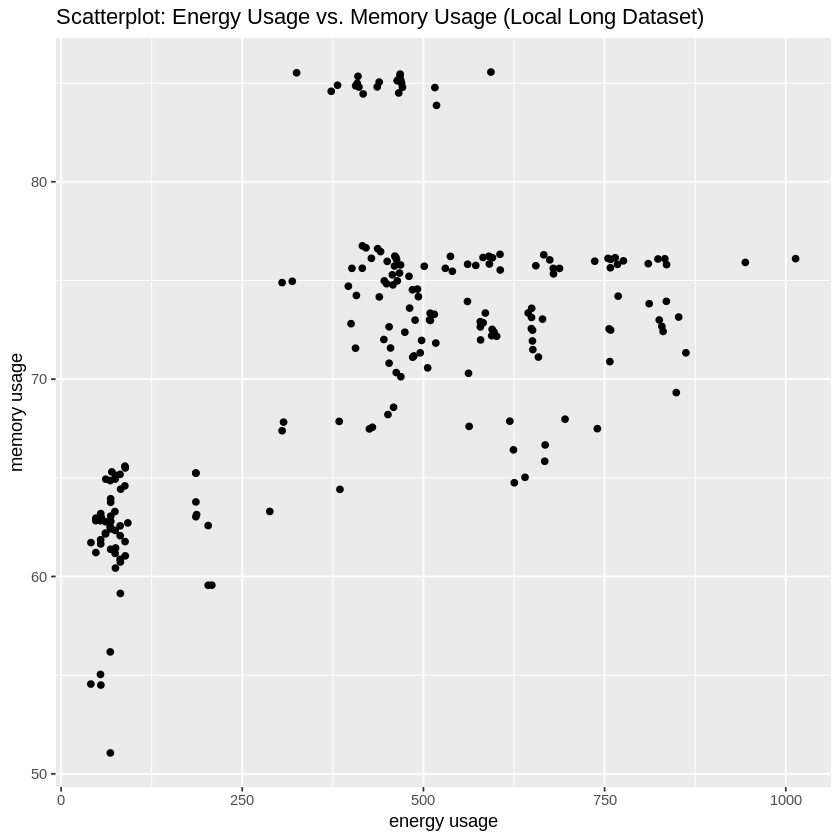

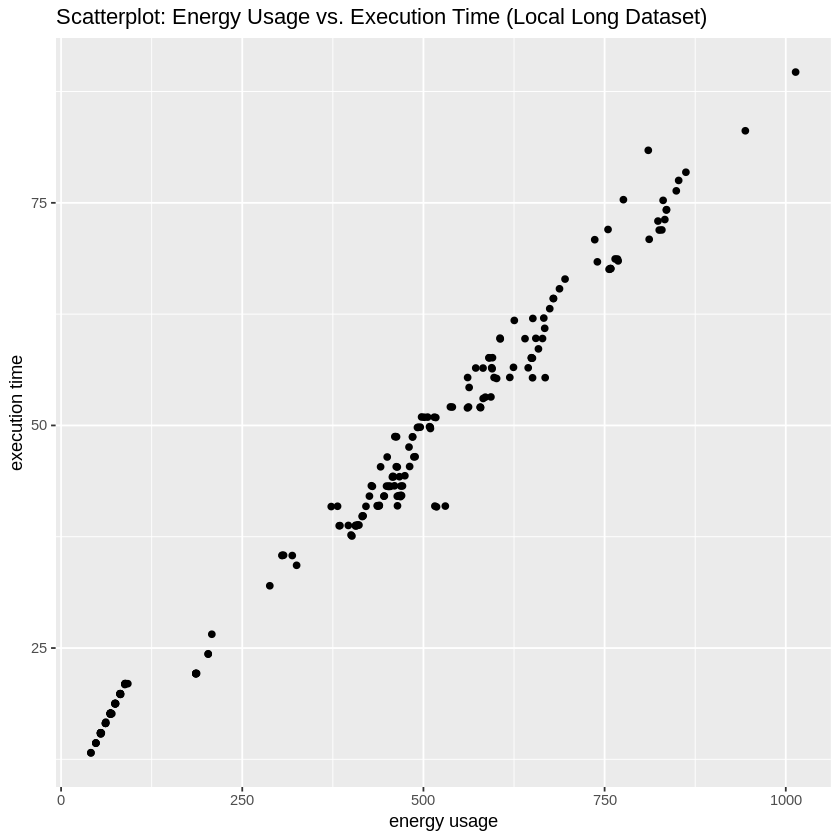

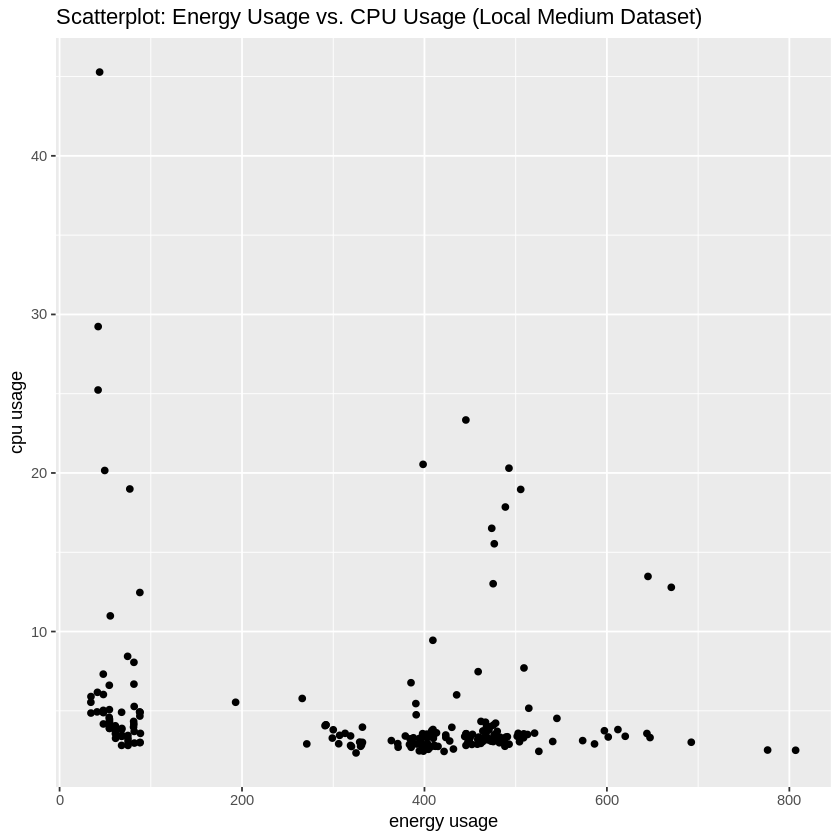

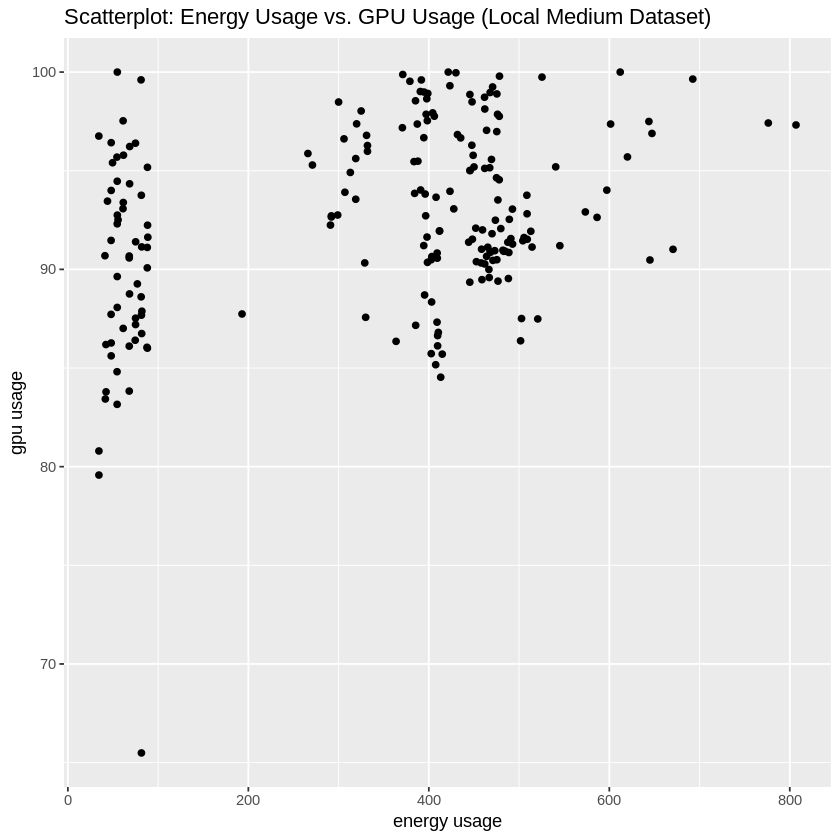

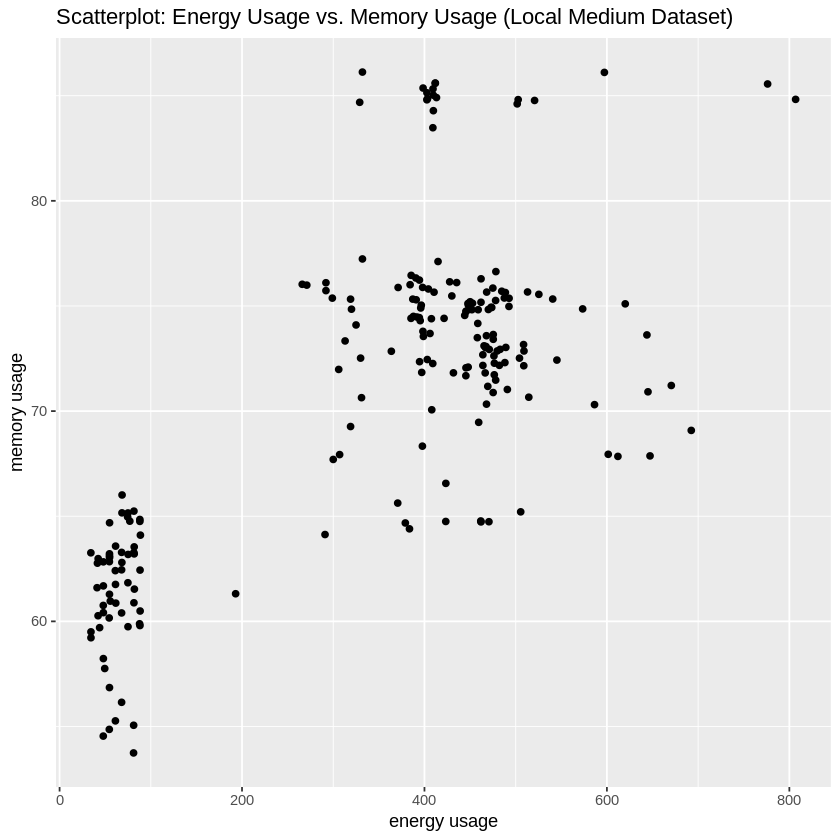

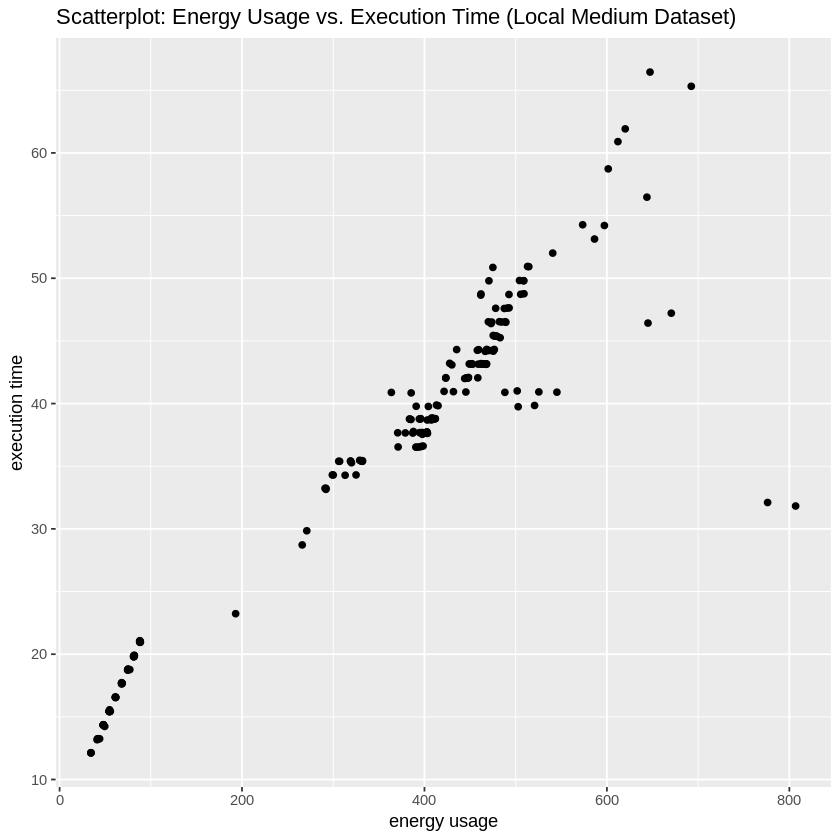

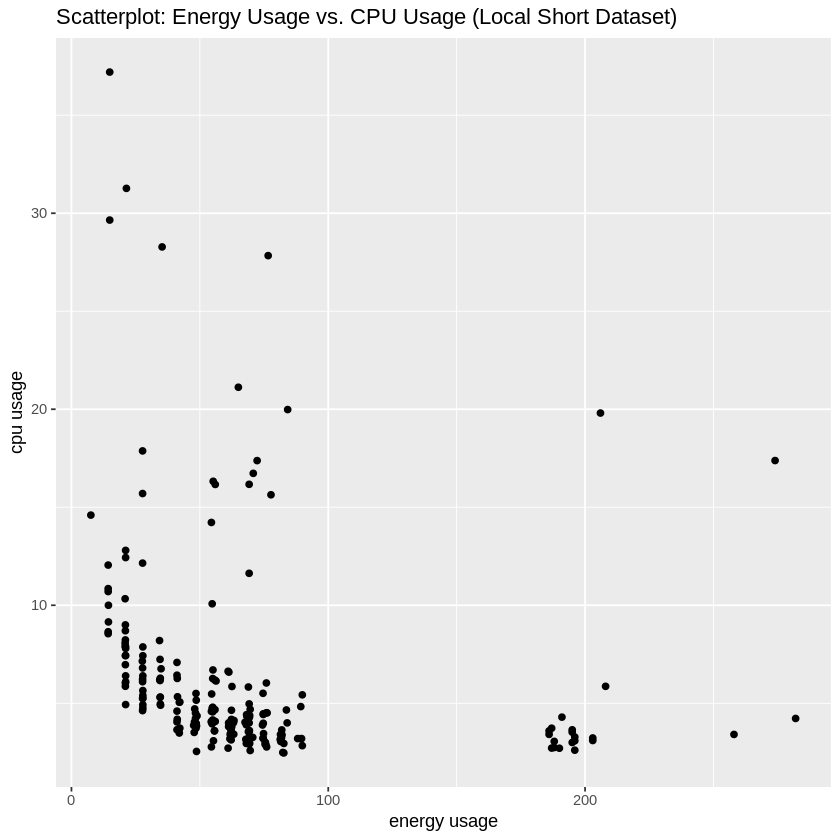

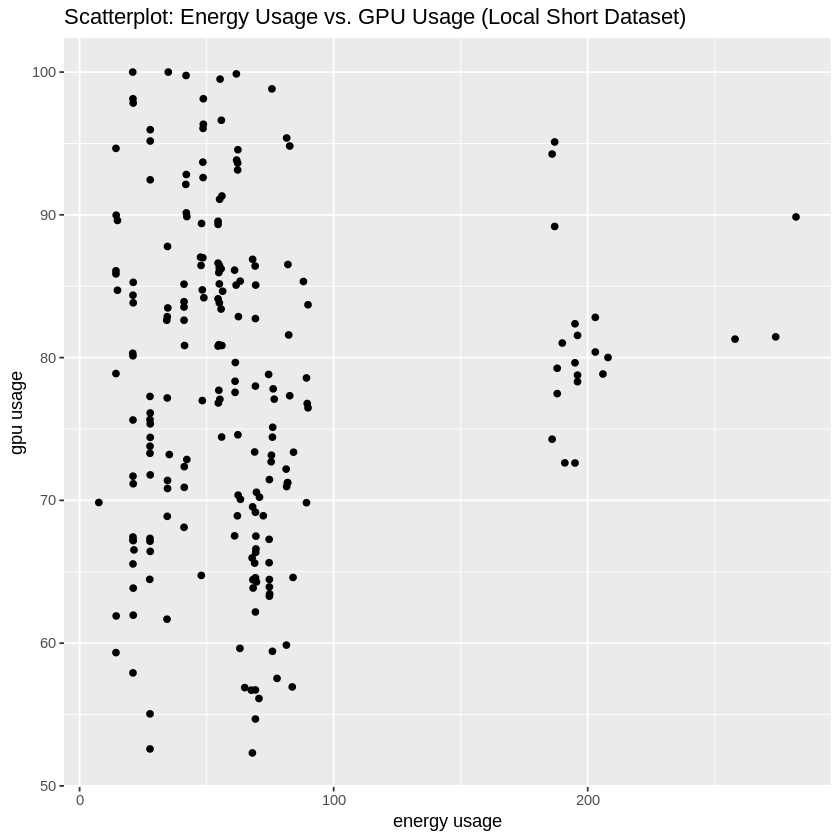

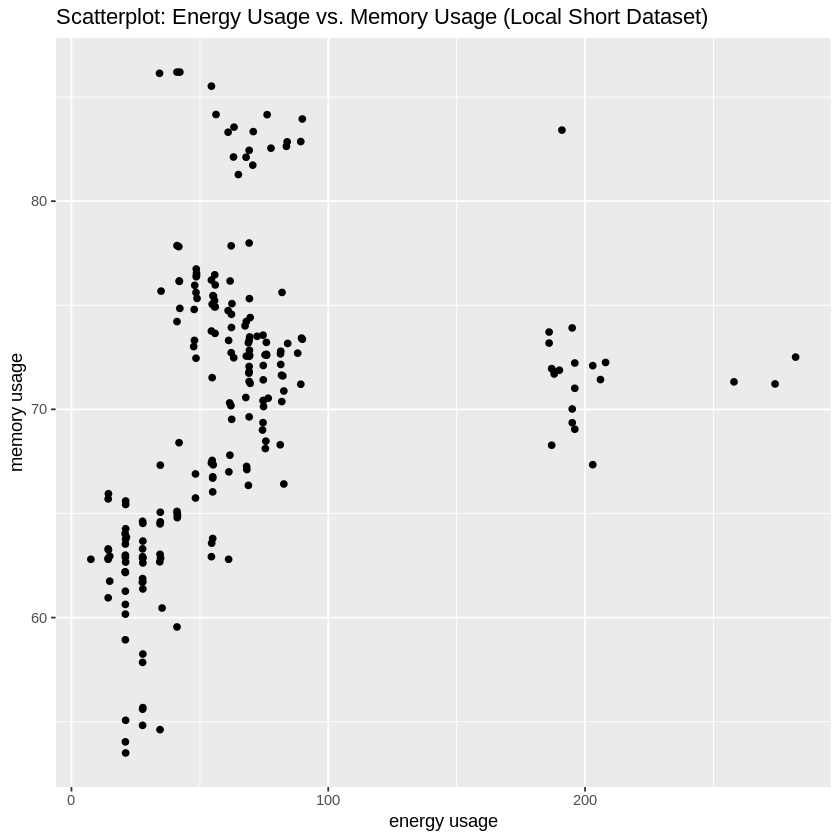

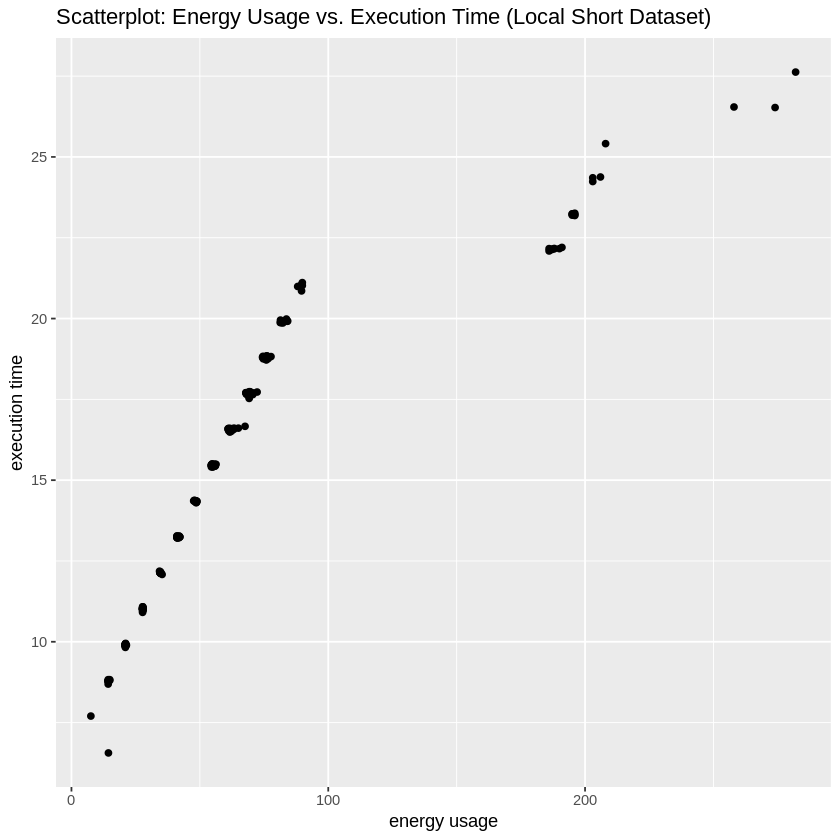

In [50]:
#Scatter plot Local and Remote
make_scatter_plot_cpu <- function(dataset, title){
  ggplot(dataset, aes(x = energy_consumed.J., y = X.cpu_usage)) +
  geom_point() +
  labs(
    title = title,
    x = "energy usage",
    y = "cpu usage"
  )
}

make_scatter_plot_gpu <- function(dataset, title){
  ggplot(dataset, aes(x = energy_consumed.J., y = X.gpu_usage)) +
  geom_point() +
  labs(
    title = title,
    x = "energy usage",
    y = "gpu usage"
  )
}

make_scatter_plot_mem <- function(dataset, title){
  ggplot(dataset, aes(x = energy_consumed.J., y = X.memory_usage)) +
  geom_point() +
  labs(
    title = title,
    x = "energy usage",
    y = "memory usage"
  )
}

make_scatter_plot_exe <- function(dataset, title){
  ggplot(dataset, aes(x = energy_consumed.J., y = execution_time)) +
  geom_point() +
  labs(
    title = title,
    x = "energy usage",
    y = "execution time"
  )
}

scatter_plot_cpu_Remote_Long <- make_scatter_plot_cpu(remote_data_long,  "Scatterplot: Energy Usage vs. CPU Usage (Remote Long Dataset)")
scatter_plot_gpu_Remote_Long <- make_scatter_plot_gpu(remote_data_long,  "Scatterplot: Energy Usage vs. GPU Usage (Remote Long Dataset)")
scatter_plot_mem_Remote_Long <- make_scatter_plot_mem(remote_data_long,  "Scatterplot: Energy Usage vs. Memory Usage (Remote Long Dataset)")
scatter_plot_exe_Remote_Long <- make_scatter_plot_exe(remote_data_long,  "Scatterplot: Energy Usage vs. Execution Time (Remote Long Dataset)")

scatter_plot_cpu_Remote_Medium <- make_scatter_plot_cpu(remote_data_medium,  "Scatterplot: Energy Usage vs. CPU Usage (Remote Medium Dataset)")
scatter_plot_gpu_Remote_Medium <- make_scatter_plot_gpu(remote_data_medium,  "Scatterplot: Energy Usage vs. GPU Usage (Remote Medium Dataset)")
scatter_plot_mem_Remote_Medium <- make_scatter_plot_mem(remote_data_medium,  "Scatterplot: Energy Usage vs. Memory Usage (Remote Medium Dataset)")
scatter_plot_exe_Remote_Medium <- make_scatter_plot_exe(remote_data_medium,  "Scatterplot: Energy Usage vs. Execution Time (Remote Medium Dataset)")

scatter_plot_cpu_Remote_Short <- make_scatter_plot_cpu(remote_data_short,  "Scatterplot: Energy Usage vs. CPU Usage (Remote Short Dataset)")
scatter_plot_gpu_Remote_Short <- make_scatter_plot_gpu(remote_data_short,  "Scatterplot: Energy Usage vs. GPU Usage (Remote Short Dataset)")
scatter_plot_mem_Remote_Short <- make_scatter_plot_mem(remote_data_short,  "Scatterplot: Energy Usage vs. Memory Usage (Remote Short Dataset)")
scatter_plot_exe_Remote_Short <- make_scatter_plot_exe(remote_data_short,  "Scatterplot: Energy Usage vs. Execution Time (Remote Short Dataset)")

scatter_plot_cpu_Local_Long <- make_scatter_plot_cpu(local_data_long,  "Scatterplot: Energy Usage vs. CPU Usage (Local Long Dataset)")
scatter_plot_gpu_Local_Long <- make_scatter_plot_gpu(local_data_long,  "Scatterplot: Energy Usage vs. GPU Usage (Local Long Dataset)")
scatter_plot_mem_Local_Long <- make_scatter_plot_mem(local_data_long,  "Scatterplot: Energy Usage vs. Memory Usage (Local Long Dataset)")
scatter_plot_exe_Local_Long <- make_scatter_plot_exe(local_data_long,  "Scatterplot: Energy Usage vs. Execution Time (Local Long Dataset)")

scatter_plot_cpu_Local_Medium <- make_scatter_plot_cpu(local_data_medium,  "Scatterplot: Energy Usage vs. CPU Usage (Local Medium Dataset)")
scatter_plot_gpu_Local_Medium <- make_scatter_plot_gpu(local_data_medium,  "Scatterplot: Energy Usage vs. GPU Usage (Local Medium Dataset)")
scatter_plot_mem_Local_Medium <- make_scatter_plot_mem(local_data_medium,  "Scatterplot: Energy Usage vs. Memory Usage (Local Medium Dataset)")
scatter_plot_exe_Local_Medium <- make_scatter_plot_exe(local_data_medium,  "Scatterplot: Energy Usage vs. Execution Time (Local Medium Dataset)")

scatter_plot_cpu_Local_Short <- make_scatter_plot_cpu(local_data_short,  "Scatterplot: Energy Usage vs. CPU Usage (Local Short Dataset)")
scatter_plot_gpu_Local_Short <- make_scatter_plot_gpu(local_data_short,  "Scatterplot: Energy Usage vs. GPU Usage (Local Short Dataset)")
scatter_plot_mem_Local_Short <- make_scatter_plot_mem(local_data_short,  "Scatterplot: Energy Usage vs. Memory Usage (Local Short Dataset)")
scatter_plot_exe_Local_Short <- make_scatter_plot_exe(local_data_short,  "Scatterplot: Energy Usage vs. Execution Time (Local Short Dataset)")

grid_CPU <- plot_grid(scatter_plot_cpu_Remote_Long , scatter_plot_cpu_Remote_Medium , scatter_plot_cpu_Remote_Short, scatter_plot_cpu_Local_Long, scatter_plot_cpu_Local_Medium, scatter_plot_cpu_Local_Short, nrow = 2, labels = "AUTO")
grid_GPU <- plot_grid(scatter_plot_gpu_Remote_Long , scatter_plot_gpu_Remote_Medium , scatter_plot_gpu_Remote_Short, scatter_plot_gpu_Local_Long, scatter_plot_gpu_Local_Medium, scatter_plot_gpu_Local_Short, nrow = 2, labels = "AUTO")
grid_EXE <- plot_grid(scatter_plot_exe_Remote_Long , scatter_plot_exe_Remote_Medium , scatter_plot_exe_Remote_Short, scatter_plot_exe_Local_Long, scatter_plot_exe_Local_Medium, scatter_plot_exe_Local_Short, nrow = 2, labels = "AUTO")
grid_MEM <- plot_grid(scatter_plot_mem_Remote_Long , scatter_plot_mem_Remote_Medium , scatter_plot_mem_Remote_Short, scatter_plot_mem_Local_Long, scatter_plot_mem_Local_Medium, scatter_plot_mem_Local_Short, nrow = 2, labels = "AUTO")


ggsave(filename = "./scatter_plots_cpu_usage.png", plot = grid_CPU, width = 10, height = 8, units = "in")
ggsave(filename = "./scatter_plots_gpu_usage.png", plot = grid_GPU, width = 10, height = 8, units = "in")
ggsave(filename = "./scatter_plots_execution_time.png", plot = grid_EXE, width = 10, height = 8, units = "in")
ggsave(filename = "./scatter_plots_memory_usage.png", plot = grid_MEM, width = 10, height = 8, units = "in")



scatter_plot_cpu_Remote_Long
scatter_plot_gpu_Remote_Long
scatter_plot_mem_Remote_Long
scatter_plot_exe_Remote_Long

scatter_plot_cpu_Remote_Medium
scatter_plot_gpu_Remote_Medium
scatter_plot_mem_Remote_Medium
scatter_plot_exe_Remote_Medium

scatter_plot_cpu_Remote_Short
scatter_plot_gpu_Remote_Short
scatter_plot_mem_Remote_Short
scatter_plot_exe_Remote_Short

scatter_plot_cpu_Local_Long
scatter_plot_gpu_Local_Long
scatter_plot_mem_Local_Long
scatter_plot_exe_Local_Long

scatter_plot_cpu_Local_Medium
scatter_plot_gpu_Local_Medium
scatter_plot_mem_Local_Medium
scatter_plot_exe_Local_Medium

scatter_plot_cpu_Local_Short
scatter_plot_gpu_Local_Short
scatter_plot_mem_Local_Short
scatter_plot_exe_Local_Short


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


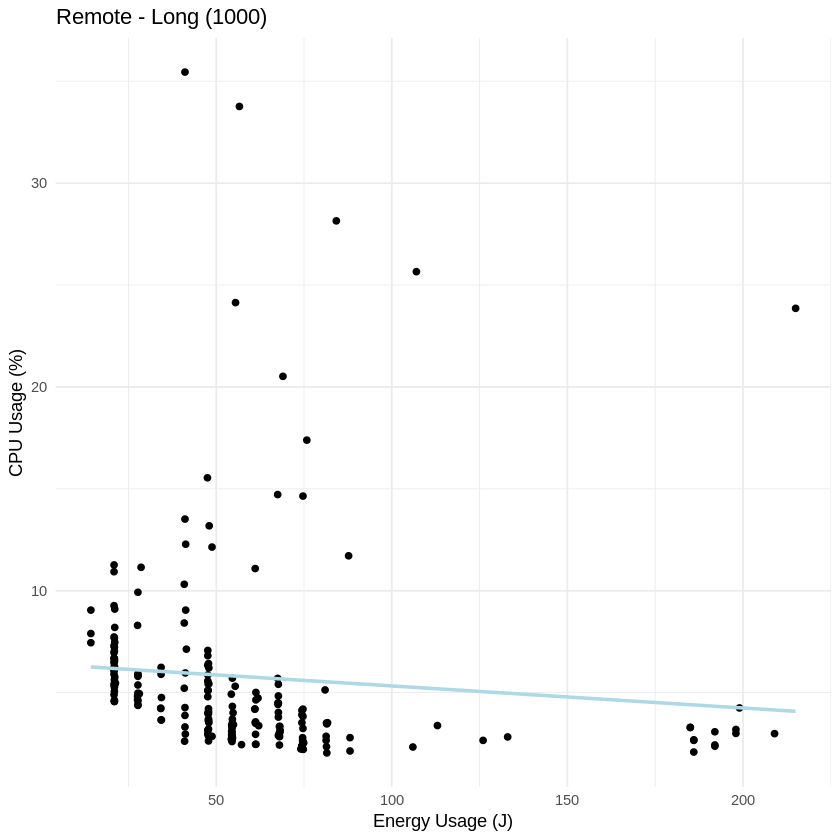

`geom_smooth()` using formula = 'y ~ x'


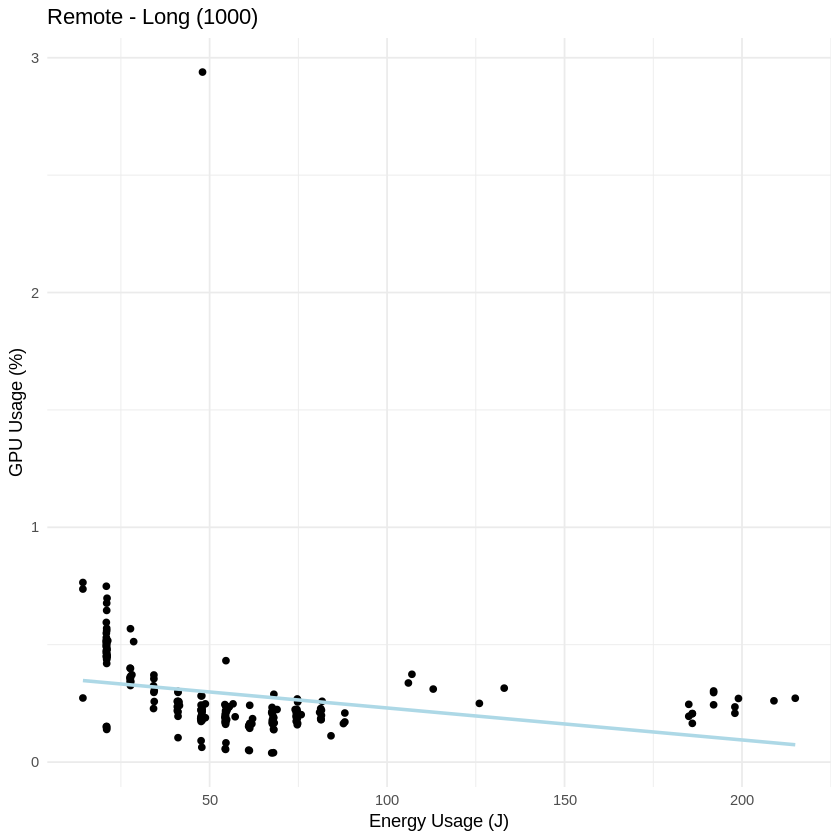

`geom_smooth()` using formula = 'y ~ x'


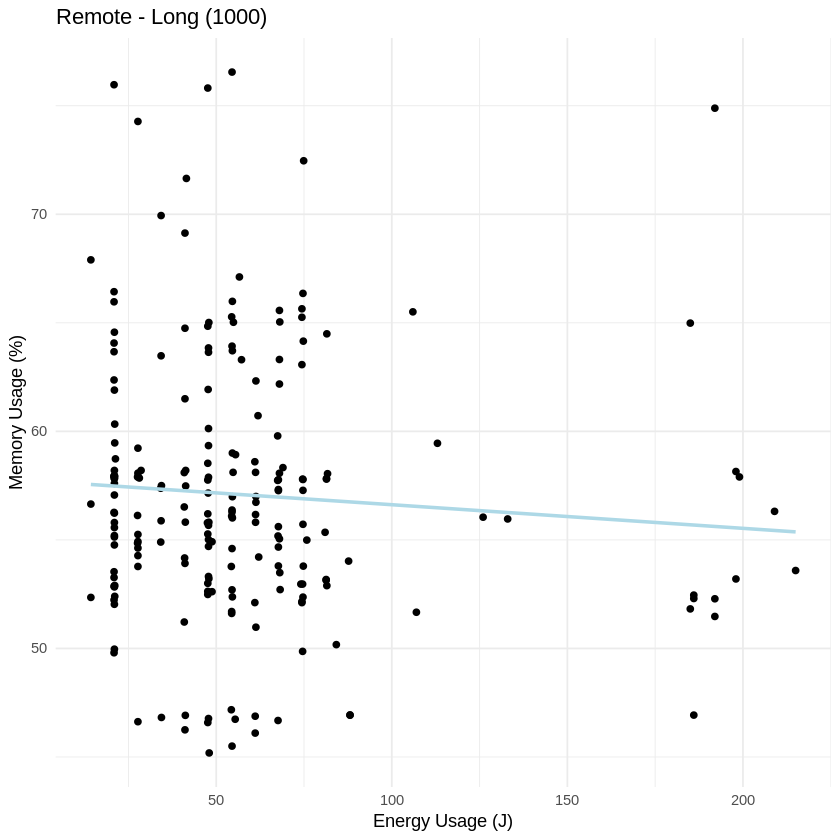

`geom_smooth()` using formula = 'y ~ x'


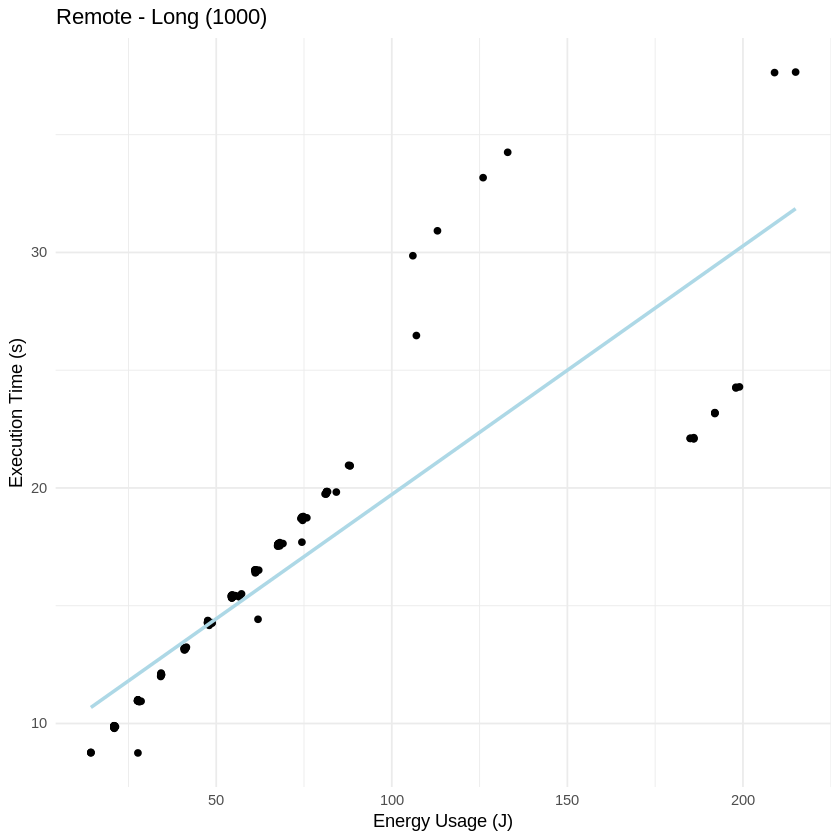

`geom_smooth()` using formula = 'y ~ x'


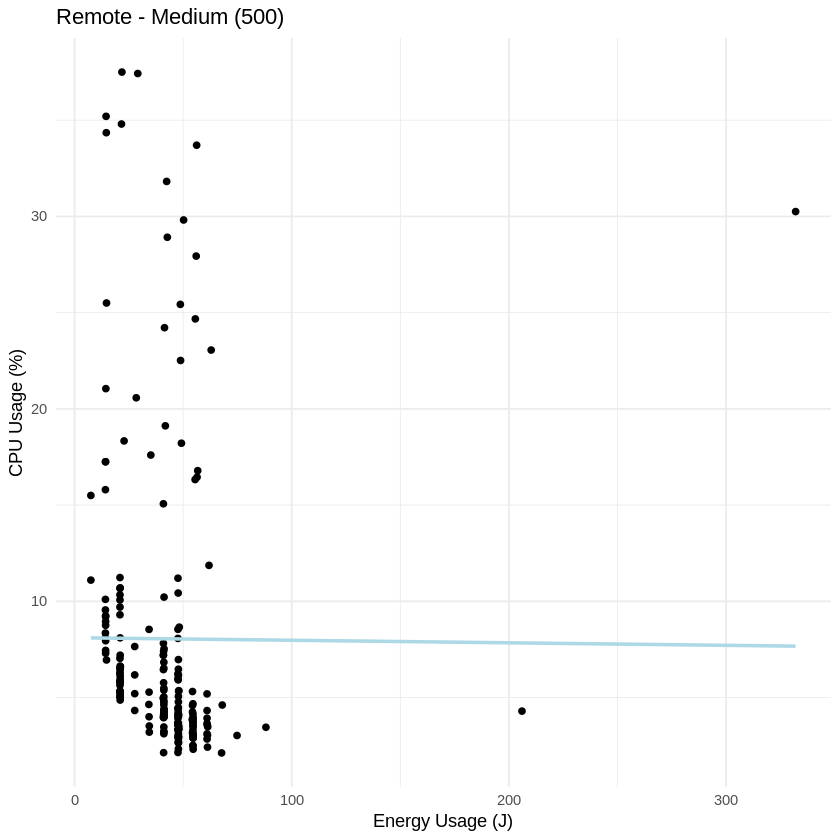

`geom_smooth()` using formula = 'y ~ x'


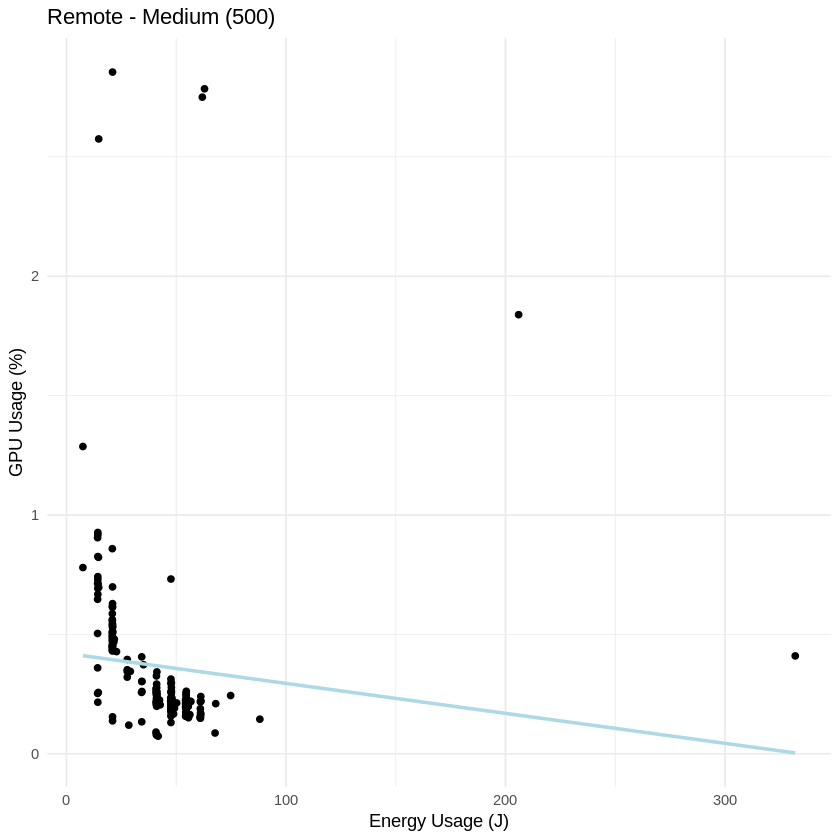

`geom_smooth()` using formula = 'y ~ x'


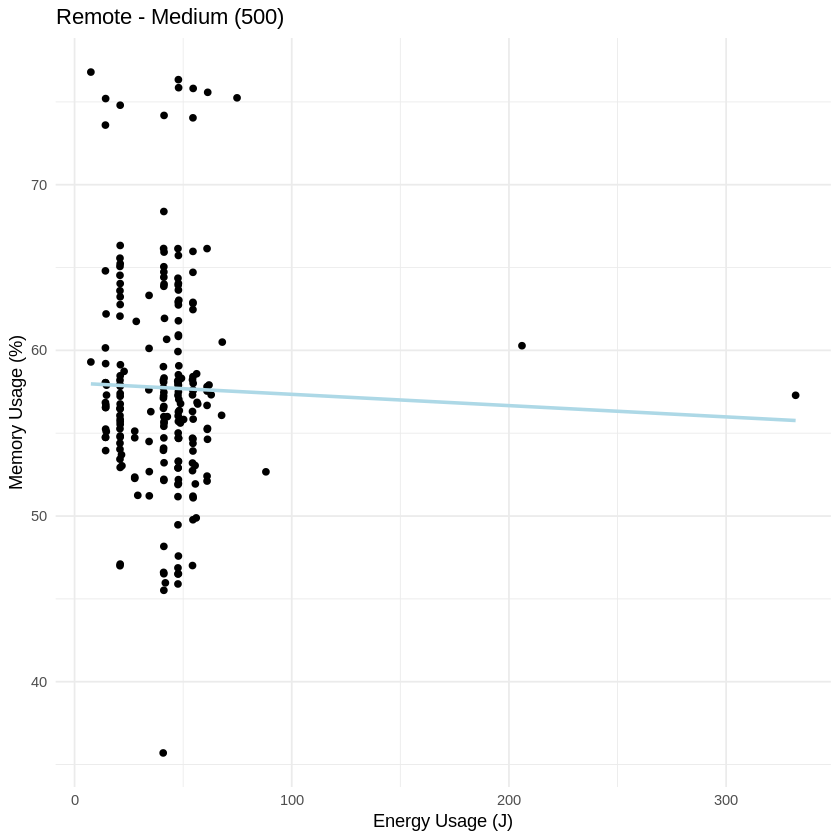

`geom_smooth()` using formula = 'y ~ x'


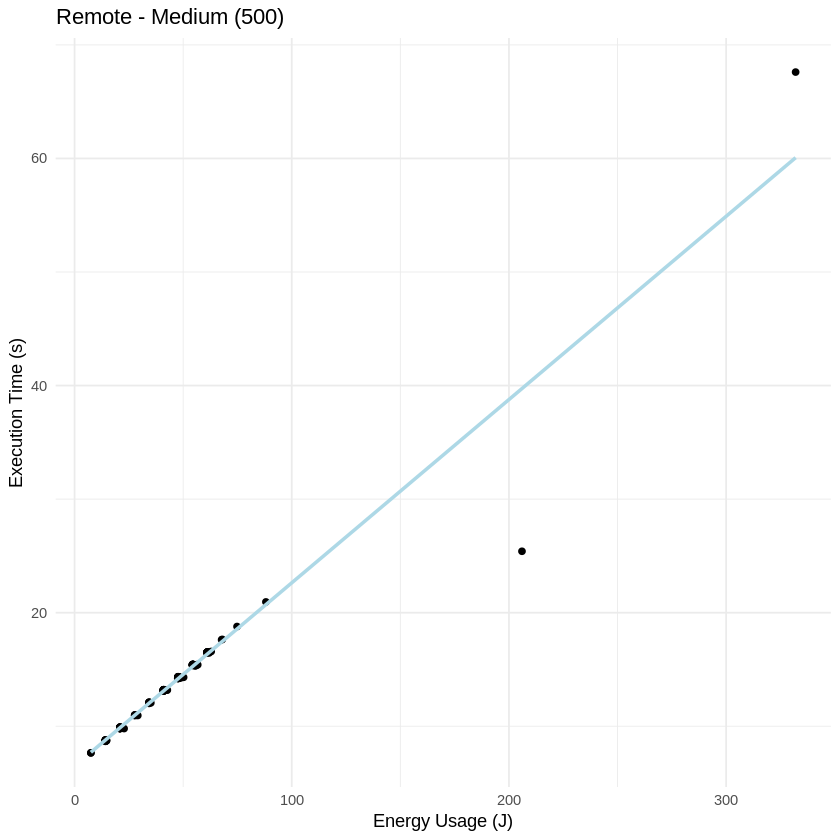

`geom_smooth()` using formula = 'y ~ x'


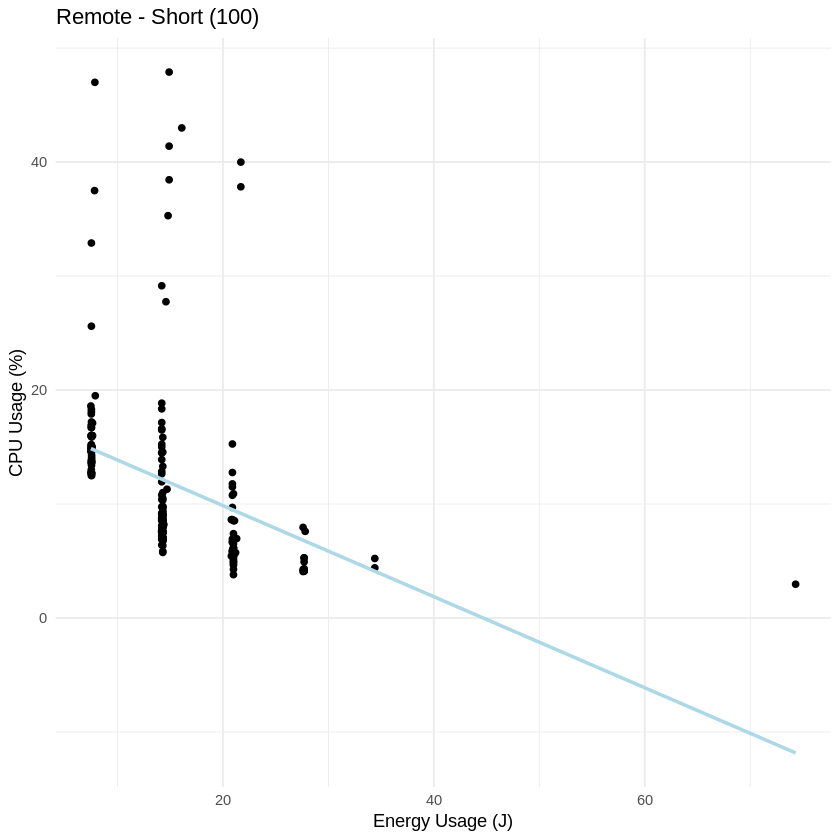

`geom_smooth()` using formula = 'y ~ x'


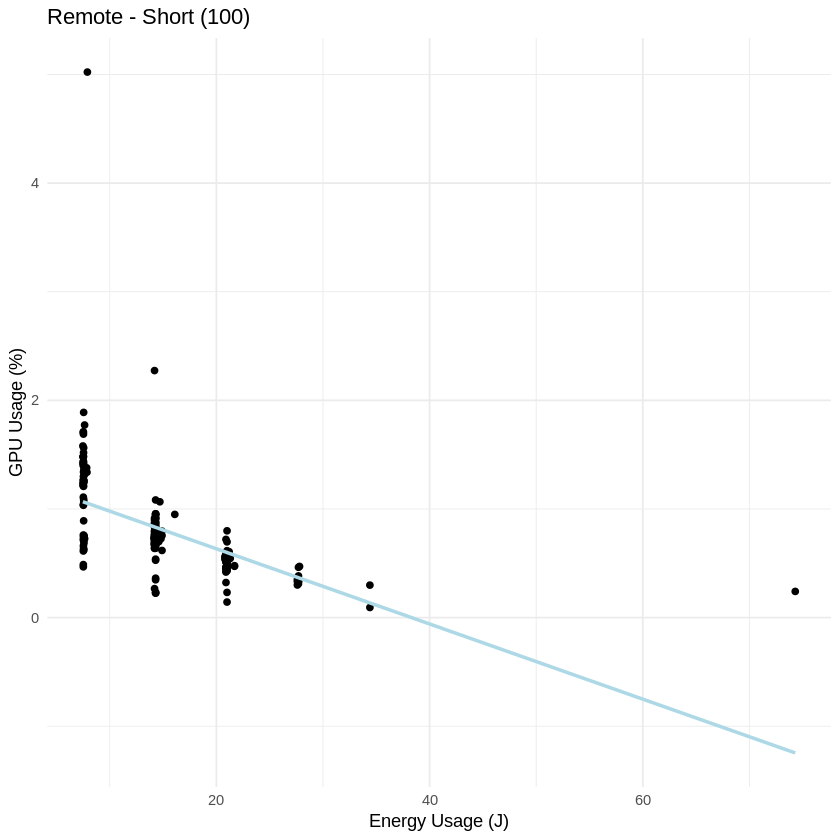

`geom_smooth()` using formula = 'y ~ x'


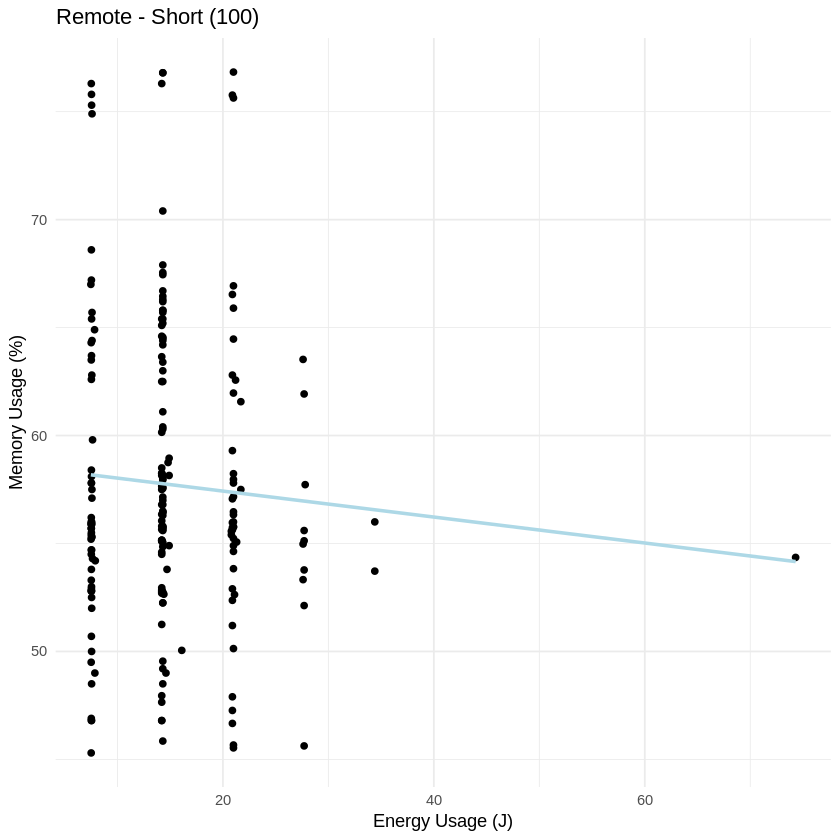

`geom_smooth()` using formula = 'y ~ x'


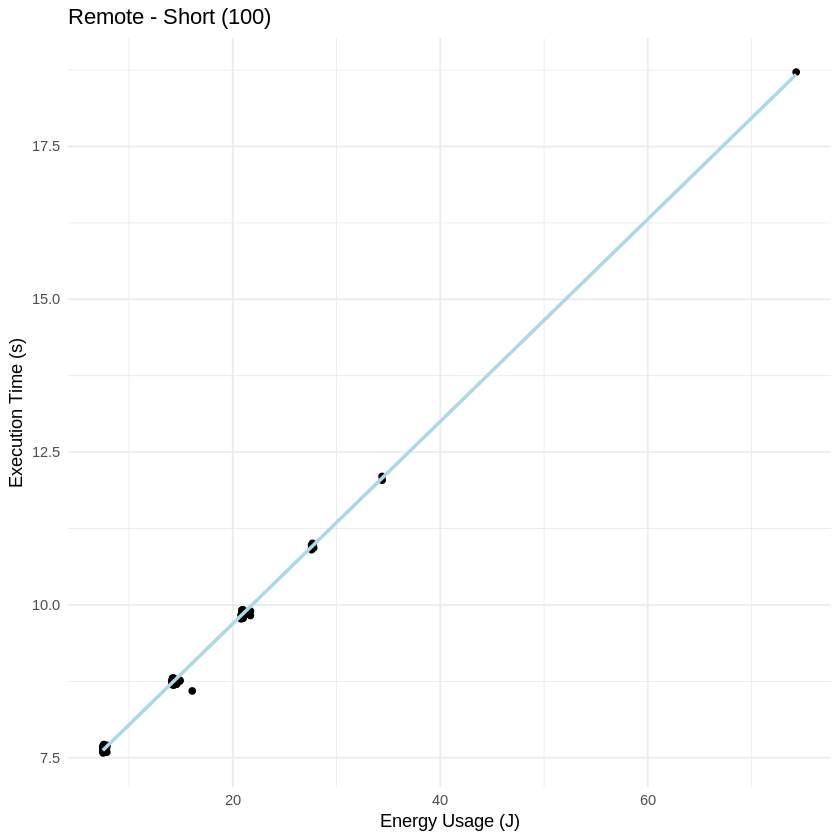

`geom_smooth()` using formula = 'y ~ x'


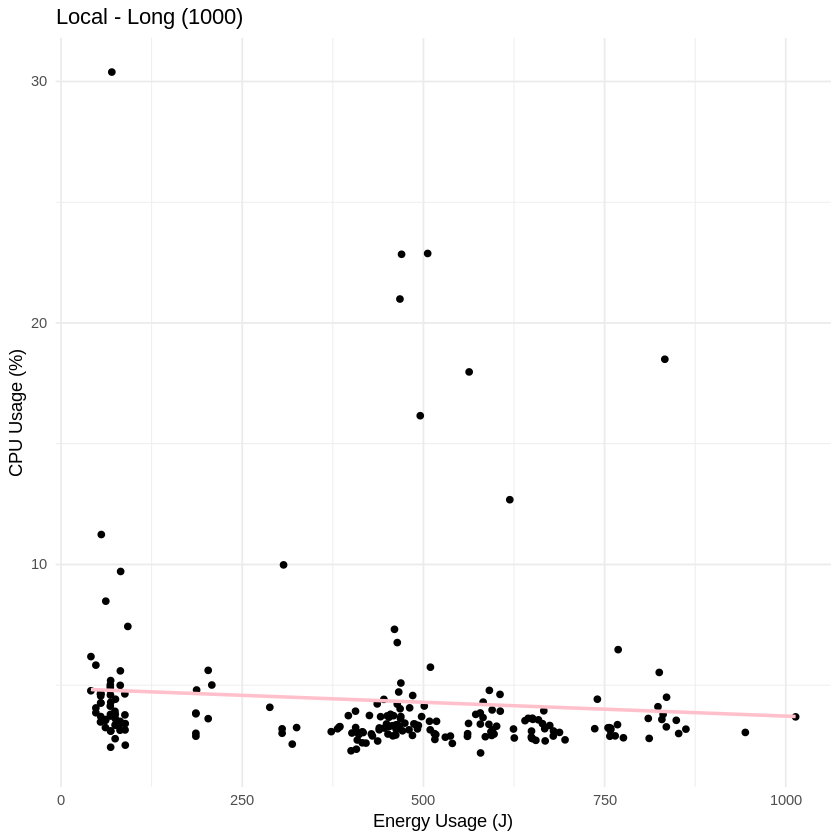

`geom_smooth()` using formula = 'y ~ x'


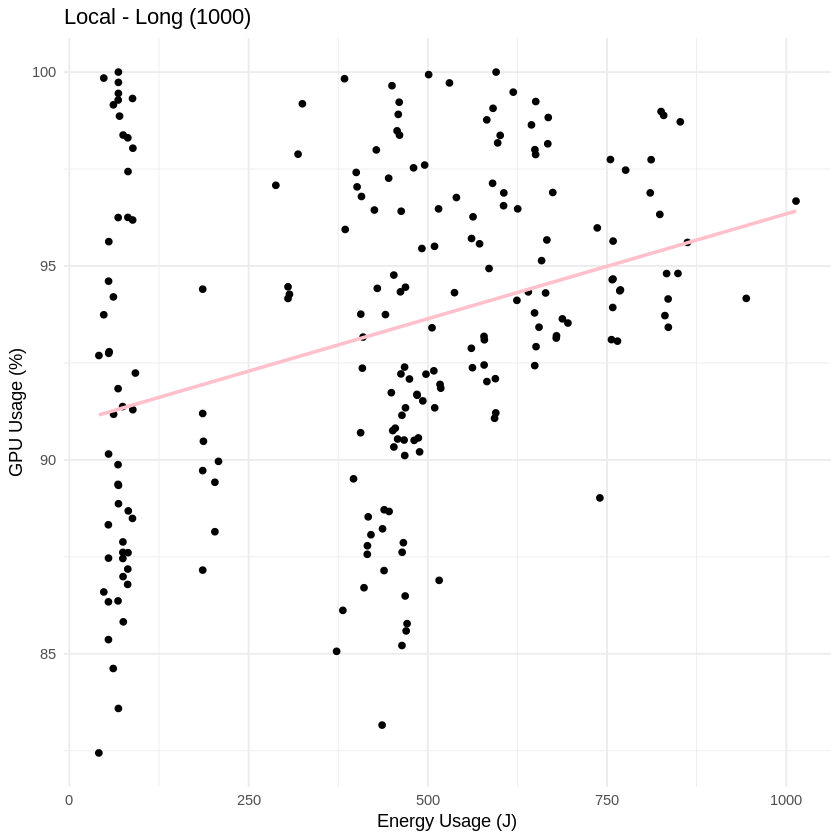

`geom_smooth()` using formula = 'y ~ x'


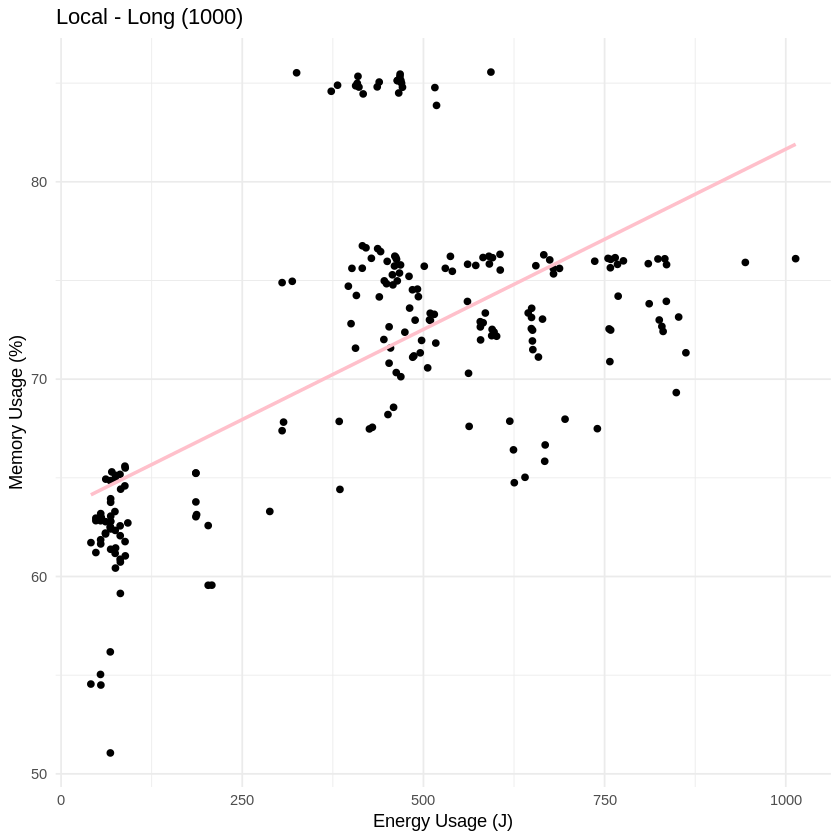

`geom_smooth()` using formula = 'y ~ x'


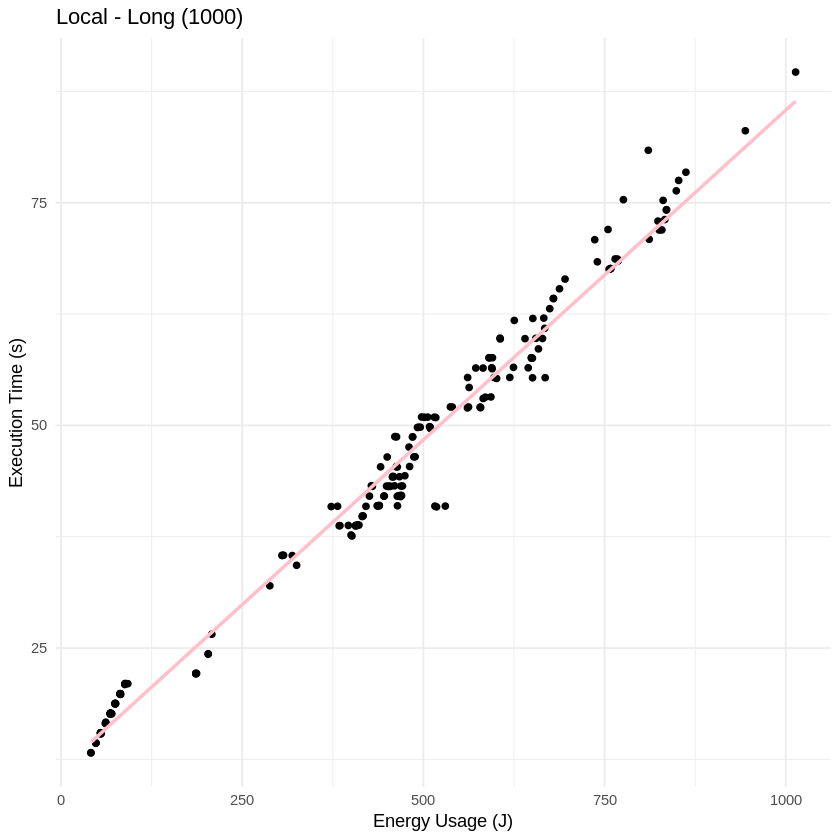

`geom_smooth()` using formula = 'y ~ x'


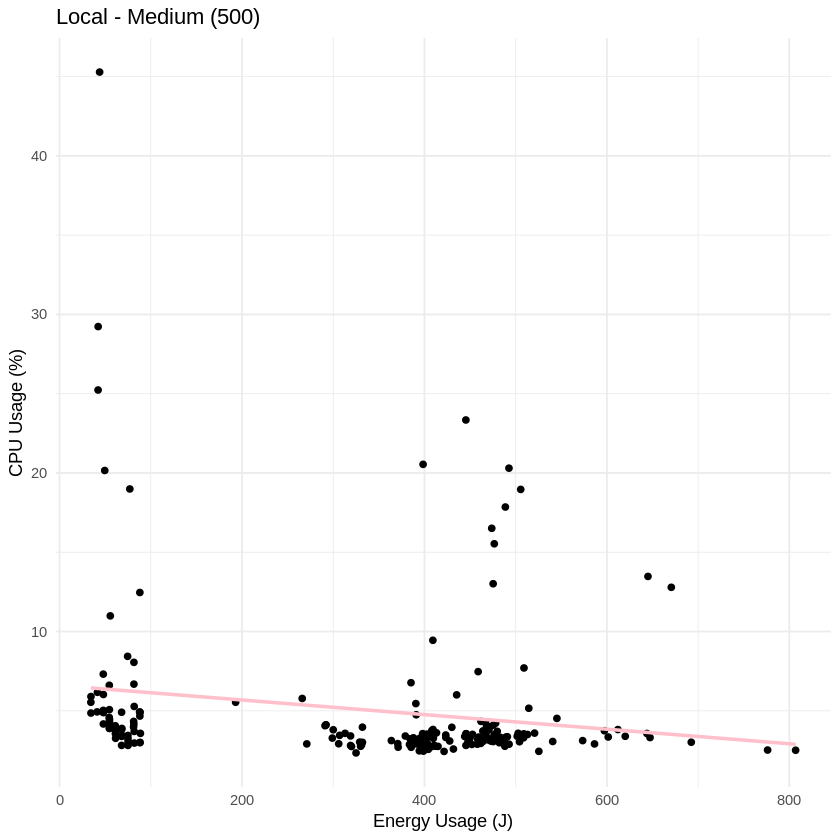

`geom_smooth()` using formula = 'y ~ x'


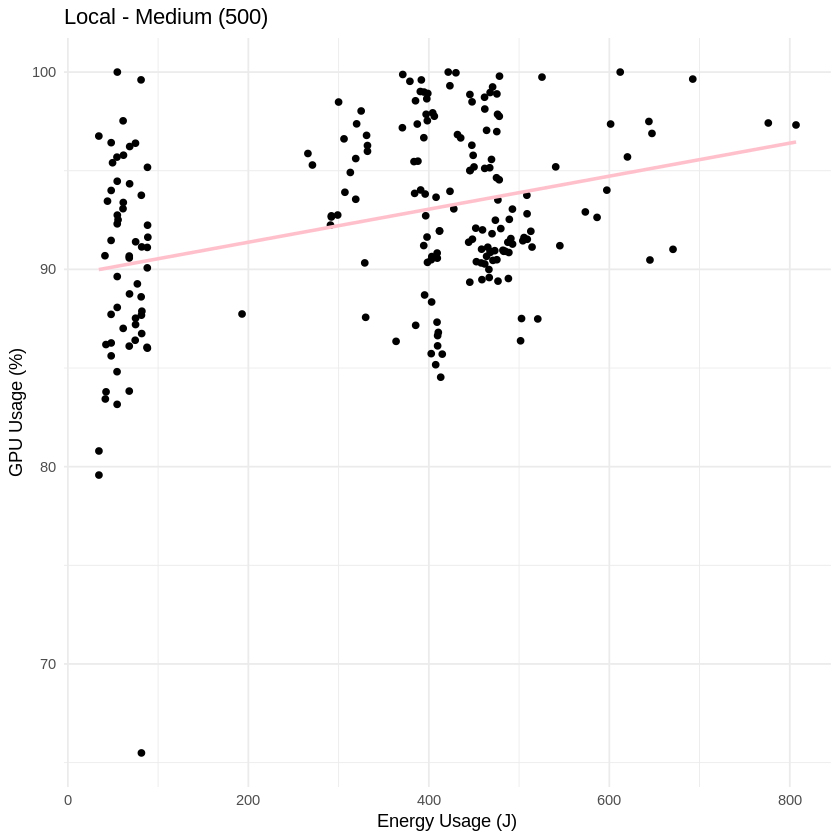

`geom_smooth()` using formula = 'y ~ x'


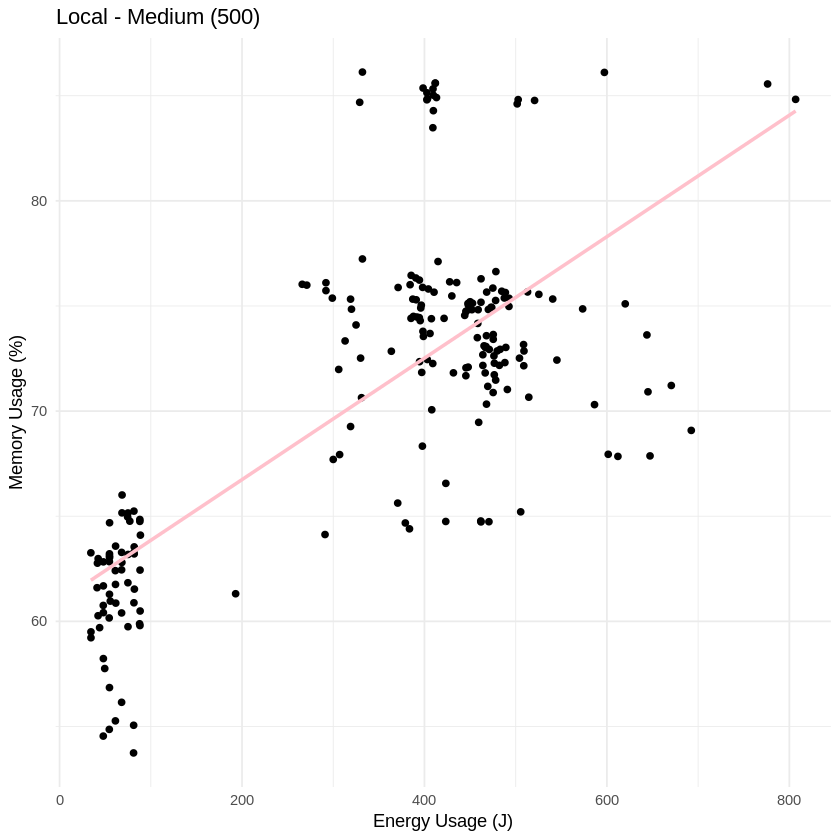

`geom_smooth()` using formula = 'y ~ x'


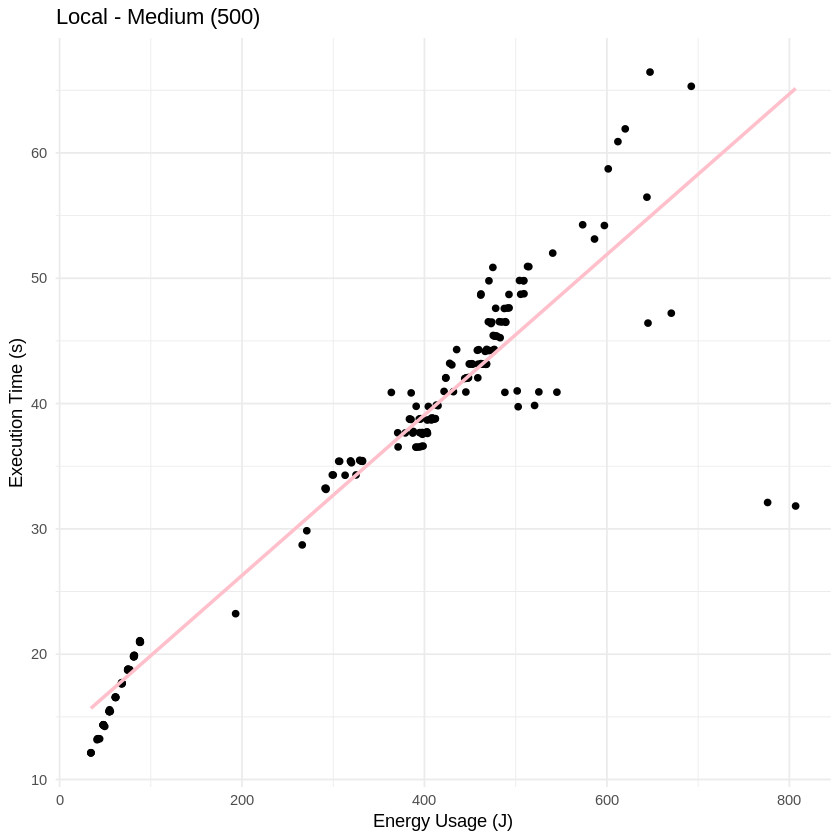

`geom_smooth()` using formula = 'y ~ x'


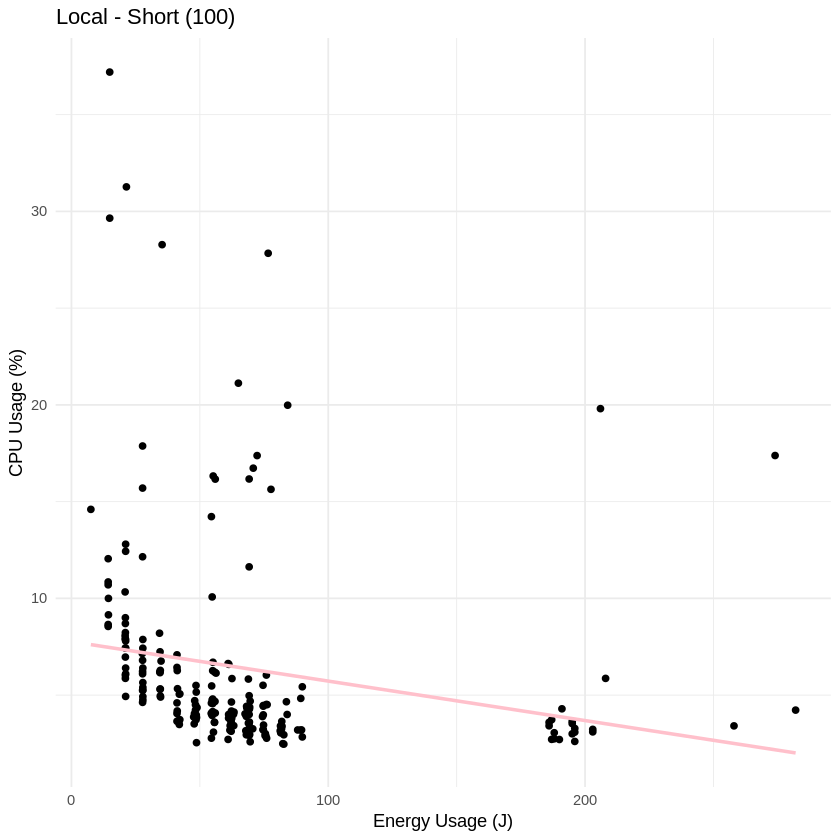

`geom_smooth()` using formula = 'y ~ x'


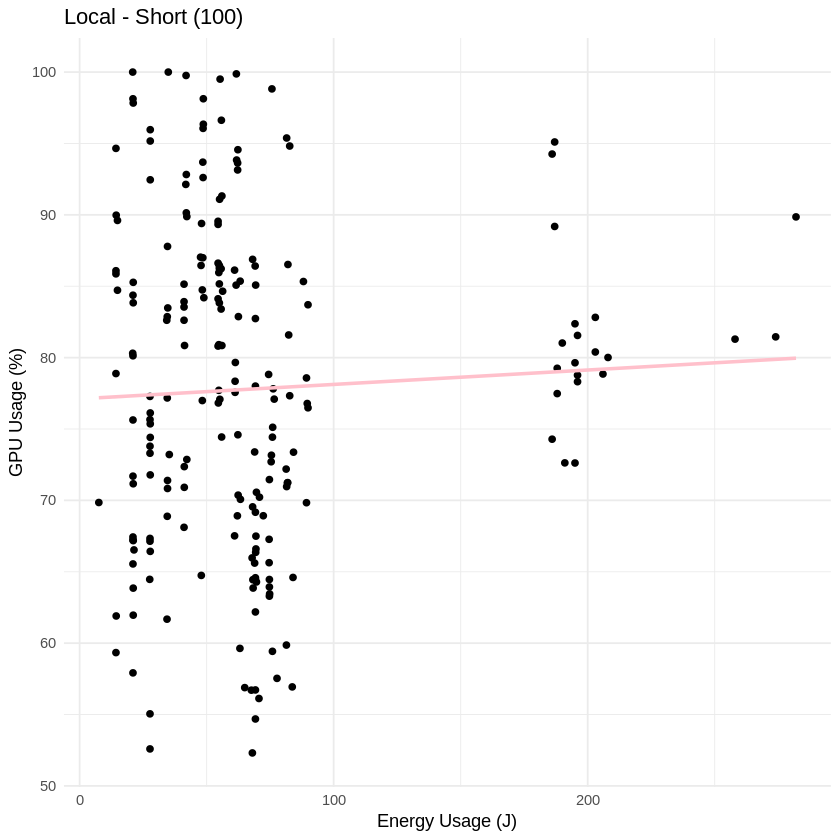

`geom_smooth()` using formula = 'y ~ x'


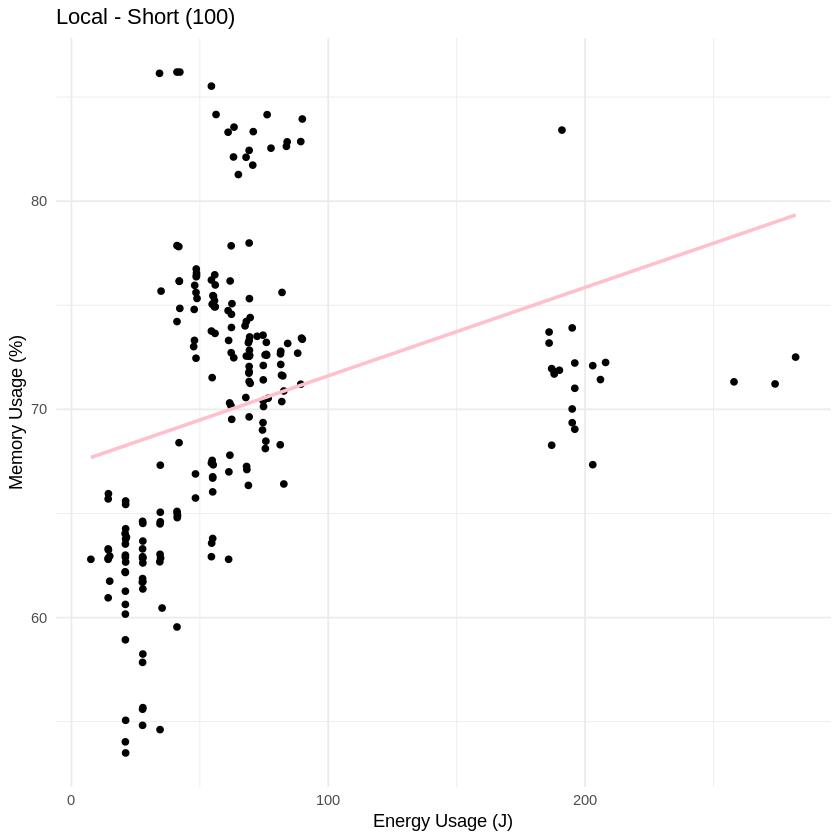

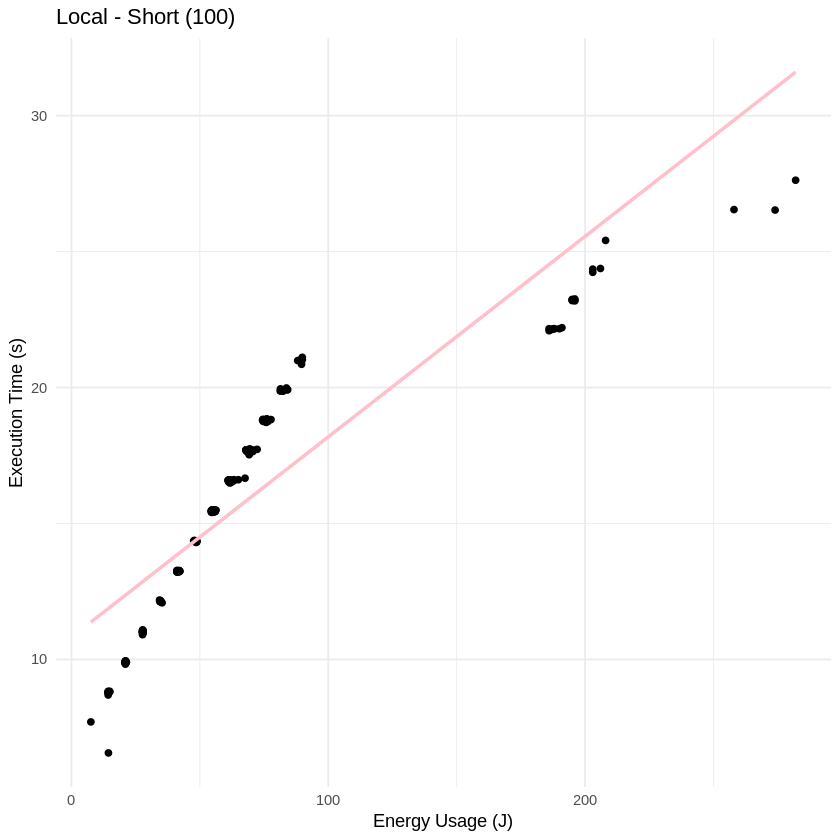

In [51]:
# Function to create scatter plot with correlation line
make_scatter_plot_with_correlation <- function(dataset, x_var, y_var, title, x_title, y_title){
  ggplot(dataset, aes(x = !!sym(x_var), y = !!sym(y_var))) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "pink") +  # Add correlation line
    theme_minimal() +  # Make the background white
    labs(
      title = title,
      x = x_title,
      y = y_title
    )
}

make_scatter_plot_with_correlation_blue <- function(dataset, x_var, y_var, title, x_title, y_title){
  ggplot(dataset, aes(x = !!sym(x_var), y = !!sym(y_var))) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "lightblue") +  # Add correlation line
    theme_minimal() +  # Make the background white
    labs(
      title = title,
      x = x_title,
      y = y_title
    )
}

# Function to create scatter plot without correlation line
make_scatter_plot <- function(dataset, x_var, y_var, title, x_title, y_title){
  ggplot(dataset, aes(x = !!sym(x_var), y = !!sym(y_var))) +
    geom_point() +
    theme_minimal() +  # Make the background white
    labs(
      title = title,
      x = x_title,
      y = y_title
    )
}

# Create scatter plots with correlation line and blue color
scatter_plot_cpu_Remote_Short <- make_scatter_plot_with_correlation_blue(remote_data_short, "energy_consumed.J.", "X.cpu_usage", "Remote - Short (100)", "Energy Usage (J)", "CPU Usage (%)")
scatter_plot_gpu_Remote_Short <- make_scatter_plot_with_correlation_blue(remote_data_short, "energy_consumed.J.", "X.gpu_usage", "Remote - Short (100)", "Energy Usage (J)", "GPU Usage (%)")
scatter_plot_mem_Remote_Short <- make_scatter_plot_with_correlation_blue(remote_data_short, "energy_consumed.J.", "X.memory_usage", "Remote - Short (100)", "Energy Usage (J)", "Memory Usage (%)")
scatter_plot_exe_Remote_Short <- make_scatter_plot_with_correlation_blue(remote_data_short, "energy_consumed.J.", "execution_time", "Remote - Short (100)", "Energy Usage (J)", "Execution Time (s)")

scatter_plot_cpu_Remote_Medium <- make_scatter_plot_with_correlation_blue(remote_data_medium, "energy_consumed.J.", "X.cpu_usage", "Remote - Medium (500)","Energy Usage (J)", "CPU Usage (%)")
scatter_plot_gpu_Remote_Medium <- make_scatter_plot_with_correlation_blue(remote_data_medium, "energy_consumed.J.", "X.gpu_usage", "Remote - Medium (500)", "Energy Usage (J)", "GPU Usage (%)")
scatter_plot_mem_Remote_Medium <- make_scatter_plot_with_correlation_blue(remote_data_medium, "energy_consumed.J.", "X.memory_usage", "Remote - Medium (500)", "Energy Usage (J)", "Memory Usage (%)")
scatter_plot_exe_Remote_Medium <- make_scatter_plot_with_correlation_blue(remote_data_medium, "energy_consumed.J.", "execution_time", "Remote - Medium (500)", "Energy Usage (J)", "Execution Time (s)")

scatter_plot_cpu_Remote_Long <- make_scatter_plot_with_correlation_blue(remote_data_long, "energy_consumed.J.", "X.cpu_usage", "Remote - Long (1000)", "Energy Usage (J)", "CPU Usage (%)")
scatter_plot_gpu_Remote_Long <- make_scatter_plot_with_correlation_blue(remote_data_long, "energy_consumed.J.", "X.gpu_usage", "Remote - Long (1000)", "Energy Usage (J)", "GPU Usage (%)")
scatter_plot_mem_Remote_Long <- make_scatter_plot_with_correlation_blue(remote_data_long, "energy_consumed.J.", "X.memory_usage", "Remote - Long (1000)", "Energy Usage (J)", "Memory Usage (%)")
scatter_plot_exe_Remote_Long <- make_scatter_plot_with_correlation_blue(remote_data_long, "energy_consumed.J.", "execution_time", "Remote - Long (1000)", "Energy Usage (J)", "Execution Time (s)")

# Create scatter plots with correlation line and blue color
scatter_plot_cpu_Local_Long <- make_scatter_plot_with_correlation(local_data_long, "energy_consumed.J.", "X.cpu_usage", "Local - Long (1000)", "Energy Usage (J)", "CPU Usage (%)")
scatter_plot_gpu_Local_Long <- make_scatter_plot_with_correlation(local_data_long, "energy_consumed.J.", "X.gpu_usage", "Local - Long (1000)", "Energy Usage (J)", "GPU Usage (%)")
scatter_plot_mem_Local_Long <- make_scatter_plot_with_correlation(local_data_long, "energy_consumed.J.", "X.memory_usage", "Local - Long (1000)", "Energy Usage (J)", "Memory Usage (%)")
scatter_plot_exe_Local_Long <- make_scatter_plot_with_correlation(local_data_long, "energy_consumed.J.", "execution_time", "Local - Long (1000)", "Energy Usage (J)", "Execution Time (s)")

# Create scatter plots with correlation line and blue color
scatter_plot_cpu_Local_Medium <- make_scatter_plot_with_correlation(local_data_medium, "energy_consumed.J.", "X.cpu_usage", "Local - Medium (500)", "Energy Usage (J)", "CPU Usage (%)")
scatter_plot_gpu_Local_Medium <- make_scatter_plot_with_correlation(local_data_medium, "energy_consumed.J.", "X.gpu_usage", "Local - Medium (500)", "Energy Usage (J)", "GPU Usage (%)")
scatter_plot_mem_Local_Medium <- make_scatter_plot_with_correlation(local_data_medium, "energy_consumed.J.", "X.memory_usage", "Local - Medium (500)", "Energy Usage (J)", "Memory Usage (%)")
scatter_plot_exe_Local_Medium <- make_scatter_plot_with_correlation(local_data_medium, "energy_consumed.J.", "execution_time", "Local - Medium (500)", "Energy Usage (J)", "Execution Time (s)")

# Create scatter plots with correlation line and blue color
scatter_plot_cpu_Local_Short <- make_scatter_plot_with_correlation(local_data_short, "energy_consumed.J.", "X.cpu_usage", "Local - Short (100)", "Energy Usage (J)", "CPU Usage (%)")
scatter_plot_gpu_Local_Short <- make_scatter_plot_with_correlation(local_data_short, "energy_consumed.J.", "X.gpu_usage", "Local - Short (100)", "Energy Usage (J)", "GPU Usage (%)")
scatter_plot_mem_Local_Short <- make_scatter_plot_with_correlation(local_data_short, "energy_consumed.J.", "X.memory_usage", "Local - Short (100)", "Energy Usage (J)", "Memory Usage (%)")
scatter_plot_exe_Local_Short <- make_scatter_plot_with_correlation(local_data_short, "energy_consumed.J.", "execution_time", "Local - Short (100)", "Energy Usage (J)", "Execution Time (s)")

# Save the plots

grid_CPU <- plot_grid(scatter_plot_cpu_Remote_Short , scatter_plot_cpu_Remote_Medium, scatter_plot_cpu_Remote_Long, scatter_plot_cpu_Local_Short, scatter_plot_cpu_Local_Medium, scatter_plot_cpu_Local_Long, nrow = 2, labels = "AUTO")
grid_GPU <- plot_grid(scatter_plot_gpu_Remote_Short , scatter_plot_gpu_Remote_Medium, scatter_plot_gpu_Remote_Long, scatter_plot_gpu_Local_Short, scatter_plot_gpu_Local_Medium, scatter_plot_gpu_Local_Long, nrow = 2, labels = "AUTO")
grid_EXE <- plot_grid(scatter_plot_exe_Remote_Short , scatter_plot_exe_Remote_Medium, scatter_plot_exe_Remote_Long, scatter_plot_exe_Local_Short, scatter_plot_exe_Local_Medium, scatter_plot_exe_Local_Long, nrow = 2, labels = "AUTO")
grid_MEM <- plot_grid(scatter_plot_mem_Remote_Short , scatter_plot_mem_Remote_Medium, scatter_plot_mem_Remote_Long, scatter_plot_mem_Local_Short, scatter_plot_mem_Local_Medium, scatter_plot_mem_Local_Long, nrow = 2, labels = "AUTO")


ggsave(filename = "./scatter_plots_cpu_usage.png", plot = grid_CPU, width = 12, height = 8, units = "in")
ggsave(filename = "./scatter_plots_gpu_usage.png", plot = grid_GPU, width = 12, height = 8, units = "in")
ggsave(filename = "./scatter_plots_execution_time.png", plot = grid_EXE, width = 12, height = 8, units = "in")
ggsave(filename = "./scatter_plots_memory_usage.png", plot = grid_MEM, width = 12, height = 8, units = "in")




scatter_plot_cpu_Remote_Long
scatter_plot_gpu_Remote_Long
scatter_plot_mem_Remote_Long
scatter_plot_exe_Remote_Long

scatter_plot_cpu_Remote_Medium
scatter_plot_gpu_Remote_Medium
scatter_plot_mem_Remote_Medium
scatter_plot_exe_Remote_Medium

scatter_plot_cpu_Remote_Short
scatter_plot_gpu_Remote_Short
scatter_plot_mem_Remote_Short
scatter_plot_exe_Remote_Short

scatter_plot_cpu_Local_Long
scatter_plot_gpu_Local_Long
scatter_plot_mem_Local_Long
scatter_plot_exe_Local_Long

scatter_plot_cpu_Local_Medium
scatter_plot_gpu_Local_Medium
scatter_plot_mem_Local_Medium
scatter_plot_exe_Local_Medium

scatter_plot_cpu_Local_Short
scatter_plot_gpu_Local_Short
scatter_plot_mem_Local_Short
scatter_plot_exe_Local_Short





#Hypothesis Testing - non parametric test spearman rank

In [52]:
correlation_cpu_Local_Long <- cor.test(local_data_long$energy_consumed.J., local_data_long$X.cpu_usage, method = "spearman",conf.level = 0.95)
correlation_gpu_Local_Long <- cor.test(local_data_long$energy_consumed.J., local_data_long$X.gpu_usage, method = "spearman",conf.level = 0.95)
correlation_mem_Local_Long <- cor.test(local_data_long$energy_consumed.J., local_data_long$X.memory_usage, method = "spearman",conf.level = 0.95)
correlation_exe_Local_Long <- cor.test(local_data_long$energy_consumed.J., local_data_long$execution_time, method = "spearman",conf.level = 0.95)
correlation_cpu_Local_Medium <- cor.test(local_data_medium$energy_consumed.J., local_data_medium$X.cpu_usage, method = "spearman",conf.level = 0.95)
correlation_gpu_Local_Medium <- cor.test(local_data_medium$energy_consumed.J., local_data_medium$X.gpu_usage, method = "spearman",conf.level = 0.95)
correlation_mem_Local_Medium <- cor.test(local_data_medium$energy_consumed.J., local_data_medium$X.memory_usage, method = "spearman",conf.level = 0.95)
correlation_exe_Local_Medium <- cor.test(local_data_medium$energy_consumed.J., local_data_medium$execution_time, method = "spearman",conf.level = 0.95)
correlation_cpu_Local_Short <- cor.test(local_data_short$energy_consumed.J., local_data_short$X.cpu_usage, method = "spearman",conf.level = 0.95)
correlation_gpu_Local_Short <- cor.test(local_data_short$energy_consumed.J., local_data_short$X.gpu_usage, method = "spearman",conf.level = 0.95)
correlation_mem_Local_Short <- cor.test(local_data_short$energy_consumed.J., local_data_short$X.memory_usage, method = "spearman",conf.level = 0.95)
correlation_exe_Local_Short <- cor.test(local_data_short$energy_consumed.J., local_data_short$execution_time, method = "spearman",conf.level = 0.95)
correlation_cpu_Remote_Medium <- cor.test(remote_data_medium$energy_consumed.J., remote_data_medium$X.cpu_usage, method = "spearman",conf.level = 0.95)
correlation_gpu_Remote_Medium <- cor.test(remote_data_medium$energy_consumed.J., remote_data_medium$X.gpu_usage, method = "spearman",conf.level = 0.95)
correlation_mem_Remote_Medium <- cor.test(remote_data_medium$energy_consumed.J., remote_data_medium$X.memory_usage, method = "spearman",conf.level = 0.95)
correlation_exe_Remote_Medium <- cor.test(remote_data_medium$energy_consumed.J., remote_data_medium$execution_time, method = "spearman",conf.level = 0.95)
correlation_cpu_Remote_Long <- cor.test(remote_data_long$energy_consumed.J., remote_data_long$X.cpu_usage, method = "spearman",conf.level = 0.95)
correlation_gpu_Remote_Long <- cor.test(remote_data_long$energy_consumed.J., remote_data_long$X.gpu_usage, method = "spearman",conf.level = 0.95)
correlation_mem_Remote_Long <- cor.test(remote_data_long$energy_consumed.J., remote_data_long$X.memory_usage, method = "spearman",conf.level = 0.95)
correlation_exe_Remote_Long <- cor.test(remote_data_long$energy_consumed.J., remote_data_long$execution_time, method = "spearman",conf.level = 0.95)
correlation_cpu_Remote_Short <- cor.test(remote_data_short$energy_consumed.J., remote_data_short$X.cpu_usage, method = "spearman",conf.level = 0.95)
correlation_gpu_Remote_Short <- cor.test(remote_data_short$energy_consumed.J., remote_data_short$X.gpu_usage, method = "spearman",conf.level = 0.95)
correlation_mem_Remote_Short <- cor.test(remote_data_short$energy_consumed.J., remote_data_short$X.memory_usage, method = "spearman",conf.level = 0.95)
correlation_exe_Remote_Short <- cor.test(remote_data_short$energy_consumed.J., remote_data_short$execution_time, method = "spearman",conf.level = 0.95)

check_significance <- function(correlation, name){
  # Compare p-value with the significance level (e.g., 0.05) for hypothesis testing
if (correlation$p.value <= 0.05) {
  cat("\n", name, "Reject the null hypothesis: There is a significant correlation.","\n", "p_value: ", correlation$p.value, ", correlation: ", correlation$estimate)
} else {
  cat("\n", name, "Fail to reject the null hypothesis: There is no significant correlation.","\n", "p_value: ", correlation$p.value, ", correlation: ", correlation$estimate)
}
}

check_significance(correlation_cpu_Local_Short, "cpu_Local_Short")
check_significance(correlation_gpu_Local_Short, "gpu_Local_Short")
check_significance(correlation_mem_Local_Short, "mem_Local_Short")
check_significance(correlation_exe_Local_Short, "exe_Local_Short")

check_significance(correlation_cpu_Local_Medium, "cpu_Local_Medium")
check_significance(correlation_gpu_Local_Medium, "gpu_Local_Medium")
check_significance(correlation_mem_Local_Medium, "mem_Local_Medium")
check_significance(correlation_exe_Local_Medium, "exe_Local_Medium")

check_significance(correlation_cpu_Local_Long, "cpu_Local_Long")
check_significance(correlation_gpu_Local_Long, "gpu_Local_Long")
check_significance(correlation_mem_Local_Long, "mem_Local_Long")
check_significance(correlation_exe_Local_Long, "exe_Local_Long")

check_significance(correlation_cpu_Remote_Short, "cpu_Remote_Short")
check_significance(correlation_gpu_Remote_Short, "gpu_Remote_Short")
check_significance(correlation_mem_Remote_Short, "mem_Remote_Short")
check_significance(correlation_exe_Remote_Short, "exe_Remote_Short")

check_significance(correlation_cpu_Remote_Medium, "cpu_Remote_Medium")
check_significance(correlation_gpu_Remote_Medium, "gpu_Remote_Medium")
check_significance(correlation_mem_Remote_Medium, "mem_Remote_Medium")
check_significance(correlation_exe_Remote_Medium, "exe_Remote_Medium")

check_significance(correlation_cpu_Remote_Long, "cpu_Remote_Long")
check_significance(correlation_gpu_Remote_Long, "gpu_Remote_Long")
check_significance(correlation_mem_Remote_Long, "mem_Remote_Long")
check_significance(correlation_exe_Remote_Long, "exe_Remote_Long")




Warning message in cor.test.default(local_data_long$energy_consumed.J., local_data_long$X.cpu_usage, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(local_data_long$energy_consumed.J., local_data_long$X.gpu_usage, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(local_data_long$energy_consumed.J., local_data_long$X.memory_usage, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(local_data_long$energy_consumed.J., local_data_long$execution_time, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(local_data_medium$energy_consumed.J., local_data_medium$X.cpu_usage, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(local_data_medium$energy_consumed.J., local_data_medium$X.gpu_usage, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(local_data_medium$energy_consumed.J., local_data_medium$X.memory_usage, :
“Cannot comp


 cpu_Local_Short Reject the null hypothesis: There is a significant correlation. 
 p_value:  3.538631e-21 , correlation:  -0.5911343
 gpu_Local_Short Fail to reject the null hypothesis: There is no significant correlation. 
 p_value:  0.1871857 , correlation:  -0.09137109
 mem_Local_Short Reject the null hypothesis: There is a significant correlation. 
 p_value:  6.37064e-16 , correlation:  0.5196563
 exe_Local_Short Reject the null hypothesis: There is a significant correlation. 
 p_value:  2.326546e-202 , correlation:  0.9940633
 cpu_Local_Medium Reject the null hypothesis: There is a significant correlation. 
 p_value:  0.0001693735 , correlation:  -0.2566899
 gpu_Local_Medium Reject the null hypothesis: There is a significant correlation. 
 p_value:  0.003080828 , correlation:  0.203305
 mem_Local_Medium Reject the null hypothesis: There is a significant correlation. 
 p_value:  8.797233e-19 , correlation:  0.5606638
 exe_Local_Medium Reject the null hypothesis: There is a signifi

In [53]:
# results of correlation - alternative presentation

library(knitr)

# Create a data frame to store the results
results_df <- data.frame(
  Name = c(
    "Energy Usage vs CPU Usage for Local Short ",
    "Energy Usage vs GPU Usage for Local Short ",
    "Energy Usage vs Memory Usage for Local Short ",
    "Energy Usage vs Execution Time for Local Short",
    "Energy Usage vs CPU Usage for Local Medium ",
    "Energy Usage vs GPU Usage for Local Medium ",
    "Energy Usage vs Memory Usage for Local Medium ",
    "Energy Usage vs Execution Time for Local Medium",
    "Energy Usage vs CPU Usage for Local Long",
    "Energy Usage vs GPU Usage for Local Long",
    "Energy Usage vs Memory Usage for Local Long",
    "Energy Usage vs Execution Time for Local Long  ",
    "Energy Usage vs CPU Usage for Remote Short ",
    "Energy Usage vs GPU Usage for Remote Short ",
    "Energy Usage vs Memory Usage for Remote Short",
    "Energy Usage vs Execution Time for Remote Short",
    "Energy Usage vs CPU Usage for Remote Medium ",
    "Energy Usage vs GPU Usage for Remote Medium ",
    "Energy Usage vs Memory Usage for Remote Medium",
    "Energy Usage vs Execution Time for Remote Medium",
    "Energy Usage vs CPU Usage for Remote Long ",
    "Energy Usage vs GPU Usage for Remote Long ",
    "Energy Usage vs Memory Usage for Remote Long ",
    "Energy Usage vs Execution Time for Remote Long"
  ),
  CorrelationEstimate = c(
    correlation_cpu_Local_Short$estimate,
    correlation_gpu_Local_Short$estimate,
    correlation_mem_Local_Short$estimate,
    correlation_exe_Local_Short$estimate,
    correlation_cpu_Local_Medium$estimate,
    correlation_gpu_Local_Medium$estimate,
    correlation_mem_Local_Medium$estimate,
    correlation_exe_Local_Medium$estimate,
    correlation_cpu_Local_Long$estimate,
    correlation_gpu_Local_Long$estimate,
    correlation_mem_Local_Long$estimate,
    correlation_exe_Local_Long$estimate,
    correlation_cpu_Remote_Short$estimate,
    correlation_gpu_Remote_Short$estimate,
    correlation_mem_Remote_Short$estimate,
    correlation_exe_Remote_Short$estimate,
    correlation_cpu_Remote_Medium$estimate,
    correlation_gpu_Remote_Medium$estimate,
    correlation_mem_Remote_Medium$estimate,
    correlation_exe_Remote_Medium$estimate,
    correlation_cpu_Remote_Long$estimate,
    correlation_gpu_Remote_Long$estimate,
    correlation_mem_Remote_Long$estimate,
    correlation_exe_Remote_Long$estimate
  ),
  PValue = c(
    correlation_cpu_Local_Short$p.value,
    correlation_gpu_Local_Short$p.value,
    correlation_mem_Local_Short$p.value,
    correlation_exe_Local_Short$p.value,
    correlation_cpu_Local_Medium$p.value,
    correlation_gpu_Local_Medium$p.value,
    correlation_mem_Local_Medium$p.value,
    correlation_exe_Local_Medium$p.value,
    correlation_cpu_Local_Long$p.value,
    correlation_gpu_Local_Long$p.value,
    correlation_mem_Local_Long$p.value,
    correlation_exe_Local_Long$p.value,
    correlation_cpu_Remote_Short$p.value,
    correlation_gpu_Remote_Short$p.value,
    correlation_mem_Remote_Short$p.value,
    correlation_exe_Remote_Short$p.value,
    correlation_cpu_Remote_Medium$p.value,
    correlation_gpu_Remote_Medium$p.value,
    correlation_mem_Remote_Medium$p.value,
    correlation_exe_Remote_Medium$p.value,
    correlation_cpu_Remote_Long$p.value,
    correlation_gpu_Remote_Long$p.value,
    correlation_mem_Remote_Long$p.value,
    correlation_exe_Remote_Long$p.value
  ),
  RSquared = c(
    (correlation_cpu_Local_Short$estimate)^2,
    (correlation_gpu_Local_Short$estimate)^2,
    (correlation_mem_Local_Short$estimate)^2,
    (correlation_exe_Local_Short$estimate)^2,
    (correlation_cpu_Local_Medium$estimate)^2,
    (correlation_gpu_Local_Medium$estimate)^2,
    (correlation_mem_Local_Medium$estimate)^2,
    (correlation_exe_Local_Medium$estimate)^2,
    (correlation_cpu_Local_Long$estimate)^2,
    (correlation_gpu_Local_Long$estimate)^2,
    (correlation_mem_Local_Long$estimate)^2,
    (correlation_exe_Local_Long$estimate)^2,
    (correlation_cpu_Remote_Short$estimate)^2,
    (correlation_gpu_Remote_Short$estimate)^2,
    (correlation_mem_Remote_Short$estimate)^2,
    (correlation_exe_Remote_Short$estimate)^2,
    (correlation_cpu_Remote_Medium$estimate)^2,
    (correlation_gpu_Remote_Medium$estimate)^2,
    (correlation_mem_Remote_Medium$estimate)^2,
    (correlation_exe_Remote_Medium$estimate)^2,
    (correlation_cpu_Remote_Long$estimate)^2,
    (correlation_gpu_Remote_Long$estimate)^2,
    (correlation_mem_Remote_Long$estimate)^2,
    (correlation_exe_Remote_Long$estimate)^2
  )
)

formatted_results <- results_df
formatted_results$PValue <- format(results_df$PValue, digits = 3)
table <- kable(formatted_results, caption = "Correlation Test Results", escape=FALSE)


table




Table: Correlation Test Results

|Name                                             | CorrelationEstimate|PValue    |  RSquared|
|:------------------------------------------------|-------------------:|:---------|---------:|
|Energy Usage vs CPU Usage for Local Short        |          -0.5911343|3.54e-21  | 0.3494397|
|Energy Usage vs GPU Usage for Local Short        |          -0.0913711|1.87e-01  | 0.0083487|
|Energy Usage vs Memory Usage for Local Short     |           0.5196563|6.37e-16  | 0.2700427|
|Energy Usage vs Execution Time for Local Short   |           0.9940633|2.33e-202 | 0.9881618|
|Energy Usage vs CPU Usage for Local Medium       |          -0.2566899|1.69e-04  | 0.0658897|
|Energy Usage vs GPU Usage for Local Medium       |           0.2033050|3.08e-03  | 0.0413329|
|Energy Usage vs Memory Usage for Local Medium    |           0.5606638|8.80e-19  | 0.3143439|
|Energy Usage vs Execution Time for Local Medium  |           0.9395987|8.32e-99  | 0.8828457|
|Energy Usage v